# Customer Profiling
Based on West Side Market Survey Instrument

## 0. System Setup & Cleaning

In [34]:
#QUESTION BANK
Q3 = "Are you familiar with the West Side Market?"
Q4 = "What is your Zip Code?"
Q5 = "What is your age group?"
Q6 = "West Side Market background information (shown if respondent is unfamiliar)"
Q7 = "How do you typically travel to the market?"
Q8 = "How often do you visit the West Side Market?"
Q9 = "When was the last time you visited the West Side Market?"
Q10 = "What is your impression of the West Side Market given what you have heard about it?"
Q11 = "On average, how much do you spend per visit?"
Q12 = "When shopping at the West Side Market, do you typically explore different stalls or go directly to specific vendors?"
Q13 = "How satisfied are you with the following?"
Q14 = "Elaborate on reasons for dissatisfaction"
Q15 = "Have you visited other public markets in Cleveland or elsewhere? And if so, which ones?"
Q16 = "What makes you want to shop at a public market? Select all that apply."
Q17 = "What do you like or dislike about the other public markets you have been to?"
Q18 = "What brings you to the West Side Market? What motivates you to come back? Select all that apply."
Q19 = "What are the reasons you do not visit the West Side Market more often or at all?"
Q22 = "How interested would you be in the following at the West Side Market?"
Q23 = "Is there anything else you would like to see at the market?"
Q24 = "Which days of the week are best for you to visit the West Side Market?"
Q25 = "Would you be interested in volunteer or donor opportunities with the West Side Market?"
Q26 = "Notable positive or negative interactions with vendors"
Q27 = "Notable positive or negative experiences with products"
Q28 = "Anything else you would like to share relating to the West Side Market?"
Q29 = "How often do you use grocery delivery services? (Instacart, Amazon, etc.)"
Q30 = "Where do you shop for groceries?"
Q31 = "Where do you get prepared foods?"
Q32 = "How do you hear about local products, events, or news?"
Q33 = "What is your household size?"
Q34 = "What is your household income?"
Q35 = "What is your gender?"
Q36 = "What is your race?"
Q37 = "Enter your email to be entered into the $50 Visa Gift Card drawing"
Q38 = "Are you willing to be contacted if we have questions about the responses?"


In [35]:
# Keys
q3_key = {1: "I've been there", 2:"I've heard of it but have not  been there", 3:"I've never heard of it and have not been there"}
q5_key={1:"Under 18",2:"18-20",3:"21-24",4:"25-40",5:"41-59",6:"60+"}
q7_key={1:"Driving",2:"Public transit",3:"Walking",4:"Shuttle/Tours",5:"Bike/Scooter"}
q8_key={1:"Once a year or less", 2:"A few times a year", 3:"Monthly",4:"Weekly or more"}
q9_key={1:"Within the last week",2:"Within the last month",3:"Within the last year",4:"More than a year ago"}
q11_key={1:'Less than $20',2:"$20-50",3:"$50-100",4:"More than $100"}
q12_key={1:"Explore different stalls",2:"Specific Vendors only",3:"Both"}
q19_key={1:"Too hard to park",2:"I don't live in Cleveland",3:"Market hours don't fit my schedule", 4:"Prices are too high",5:"Inconvenient location",6:"I don't always know what's available at the West Side Market",7:"Prefer supermarkets or other markets",8:"Not enough prepared food",9:"Not enough seating option",10:"Market feels too crowded or hectic",11:"Other"}
q13_key={1:"Extremely dissatisfied",2:"Somewhat dissatisfied",3:"Neither satisfied nor dissatisfied",4:"Somewhat satisfied",5:"Extremely satisfied"}
q15_18_key={1:"Product Variety",2:"Tradition and trust in vendors",3:"Value for money",4:"Availability of fresh or specialty itens I cannot find elsewhere",5:"Supporting local or independent businesses",6:"Unique Atmosphere",7:"Prepared food",8:"Attending an event or tour",9:"Other"}
q22_key={1:"Litte Interest",2:"Medium Interest",3:"High Interest"}
q24_key={1:"Sunday",2:"Monday",3:"Tuesday",4:"Wednesday",5:"Thursday",6:"Friday",7:"Saturday",8:"I have no preference"}
q29_30_31_key={1:"Usually",2:"Sometimes",3:"Rarely",4:"Never"}
q32_key={1:"Facebook",2:"Instagram",3:"Tiktok",4:"Newspaper",5:"Eventbrite",6:"Meetup",7:"Google listings",8:"Word of mouth",9:"Physical advertising",10:"Others"}
q33_key={1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7+',8:"Prefer not to say"}
q34_key={
    1:"Less than $25,000",
    2:"$25,000-$49,999",
    3:"$50,000-$99,999",
    4:"$100,000-$149,999",
    5:"$150,000-$199,999",
    6:"$200,000-$249,999",
    7:"$250,000+",
    8:"Prefer not to say"
}
q39_key={1:"Male",2:"Female",3:"Other",4:"Prefer not to say"}
q36_key={1:"African American",2:"White/Caucasian",3:"Hispanic",4:"Asian",5:"Pacific Islander",6:"Other",7:"Prefer not to say"}
#q13 can be split into: Product Variety, Cleanliness, Vendor Interactions, Parking/Accessibility, Value for Money

numeric_cols=['']

In [36]:
#Imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9

def wrap_labels(labels, width=14):
    return ['\n'.join(textwrap.wrap(l, width)) for l in labels]

In [37]:
# Cleaning
df_0 = pd.read_csv("survey.csv")

#Make supposed numeric data as numeric
# Note: Q16, Q18, Q19, Q24, Q32 are multi-select questions with comma-separated values (e.g., "1,3,4,5,6")
# These should NOT be converted to numeric directly
non_numeric_cols = ["ResponseId","DistributionChannel","Q10","Q14","Q15_2_TEXT","Q16","Q16_9_TEXT","Q17","Q18","Q18_9_TEXT","Q19","Q19_10_TEXT","Q23","Q24","Q26","Q27","Q28","Q32","Q32_12_TEXT","Q21_9_TEXT","Q37","channel"]
numeric_cols = [col for col in df_0.columns if col not in non_numeric_cols]
df = df_0.copy()
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#Drop first 2 rows; these contain only descriptions of the column and not the actual data.
df = df.iloc[2:].reset_index(drop=True)

#Parse multi-select columns (Q16, Q18, Q19, Q24, Q32) to create indicator columns
def parse_multiselect(df, col_name, max_options=20):
    """Parse comma-separated multi-select values and create indicator columns"""
    if col_name not in df.columns:
        return
    
    # Create indicator columns for each possible option (as integers)
    for i in range(1, max_options + 1):
        indicator_col = f"{col_name}_{i}"
        if indicator_col not in df.columns:
            df[indicator_col] = 0
        # Ensure it's integer type
        df[indicator_col] = df[indicator_col].astype(int)
    
    # Parse the comma-separated values
    for idx, value in df[col_name].items():
        if pd.notna(value) and str(value).strip():
            try:
                # Split by comma and convert to integers
                # Handle values that might be in quotes or have extra spaces
                value_str = str(value).strip().strip('"').strip("'")
                selections = [int(x.strip()) for x in value_str.split(',') if x.strip().isdigit()]
                for sel in selections:
                    indicator_col = f"{col_name}_{sel}"
                    if indicator_col in df.columns:
                        df.at[idx, indicator_col] = 1
            except (ValueError, AttributeError):
                continue

# Parse multi-select columns
parse_multiselect(df, 'Q16', max_options=10)  # Q16: What makes you want to shop at a public market?
parse_multiselect(df, 'Q18', max_options=10)  # Q18: What brings you to the West Side Market?
parse_multiselect(df, 'Q19', max_options=12)  # Q19: Reasons for not visiting more often
parse_multiselect(df, 'Q24', max_options=8)   # Q24: Best days of the week
parse_multiselect(df, 'Q32', max_options=12)  # Q32: How do you hear about local products/events/news?

#Drop unncessary columns
df = df.drop(columns=["Progress","IPAddress","Duration (in seconds)","Finished","ResponseId"])
df.rename(columns={'Q3_1':'Q3_Product Variety','Q3_2':'Q3_Cleanliness','Q3_3':'Q3_Vendor Interactions','Q3_4':'Q3_Parking/Accessibility','Q3_5':'Q3_Value for Money'},inplace=True)
df.rename(columns={
    'Q22_1': "Q22_Live Music",
    'Q22_2': "Q22_Seasonal food festivals",
    'Q22_3': "Q22_Cooking/Nutrition classes & demos",
    'Q22_4': "Q22_Family-friendly events",
    'Q22_5': "Q22_Evening happy hours",
    'Q22_6': "Q22_Cultural celebrations",
    'Q22_7': "Q22_Loyalty/Rewards Program",
    'Q22_8': "Q22_Meal/grocery delivery service"
}, inplace=True)
df.rename(columns={'Q30_1':"Q30_Walmart",'Q30_2':"Q30_Aldi",'Q30_3':"Q30_Giant Eagle",'Q30_4':"Q30_Heinen's",'Q30_5':"Q30_Dave's",'Q30_6':"Q30_Farmers' markets",'Q30_7':"Q30_West Side Market",'Q30_8':"Q30_Fairfax Market"},inplace=True)
df.rename(columns={
    'Q31_1':"Q31_Restaurants/takeout",
    'Q31_2':"Q31_Meal Delivery Services",
    'Q31_3':"Q31_Preferred grocery store",
    'Q31_4':"Q31_West Side Market",
    'Q31_5':"Q31_Meal prep services"
}, inplace=True)



# A. Demographic Based

**Age Groups**
- Under 18
- 18–20
- 21–24
- 25–40
- 41–59
- 60+

**Zip Code Segments**
- Near Market (within ~5 miles)
- Greater Cleveland residents
- Suburban residents
- Out-of-town visitors / tourists

**Income Segments**
- Less than $25,000
- $25,000–$49,999
- $50,000–$99,999
- $100,000–$149,999
- $150,000–$199,999
- $200,000–$249,999
- $250,000+

**Household Size**
- 1-person household
- 2-person household
- 3-person household
- 4-person household
- 5-person household
- 6-person household
- 7+ household

**Gender Segments**
- Male
- Female
- Other / Nonbinary
- Prefer not to say

**Race/Ethnicity Segments**
- African American
- White / Caucasian
- Hispanic
- Asian
- Pacific Islander
- Multiracial/Other


SECTION A: DEMOGRAPHIC-BASED SEGMENTATION

Total respondents: 684
Missing values per demographic variable:
Q5       0
Q4      27
Q34    186
Q33    180
Q35    186
Q36    182
dtype: int64


--------------------------------------------------------------------------------
1. AGE GROUPS DISTRIBUTION
--------------------------------------------------------------------------------

Counts:
Age_Group
18-20        41
21-24        94
25-40       162
41-59       145
60+         173
Under 18     69
Name: count, dtype: int64

Percentages:
Age_Group
18-20        6.0
21-24       13.7
25-40       23.7
41-59       21.2
60+         25.3
Under 18    10.1
Name: count, dtype: float64


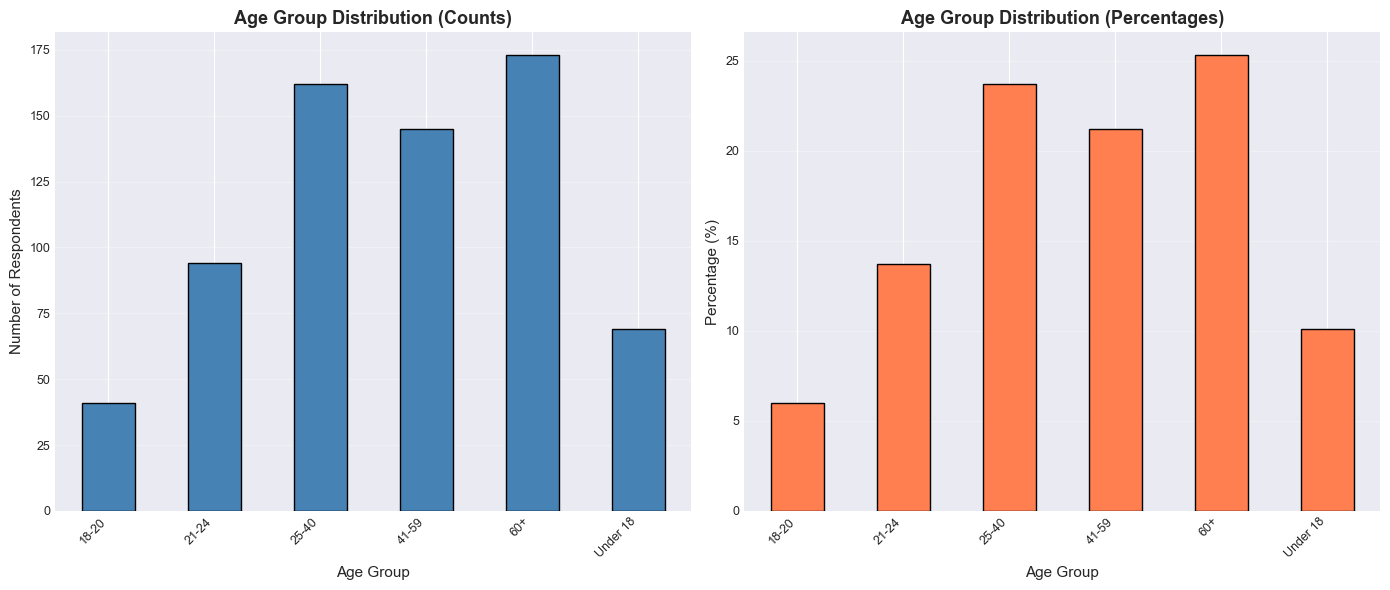


--------------------------------------------------------------------------------
2. ZIP CODE SEGMENTS
--------------------------------------------------------------------------------

Counts:
Zip_Segment
Greater Cleveland         275
Suburban Cleveland        247
Near Market (~5 miles)    103
Out-of-town/Other          32
Missing/Unknown            27
Name: count, dtype: int64

Percentages:
Zip_Segment
Greater Cleveland         40.2
Suburban Cleveland        36.1
Near Market (~5 miles)    15.1
Out-of-town/Other          4.7
Missing/Unknown            3.9
Name: count, dtype: float64


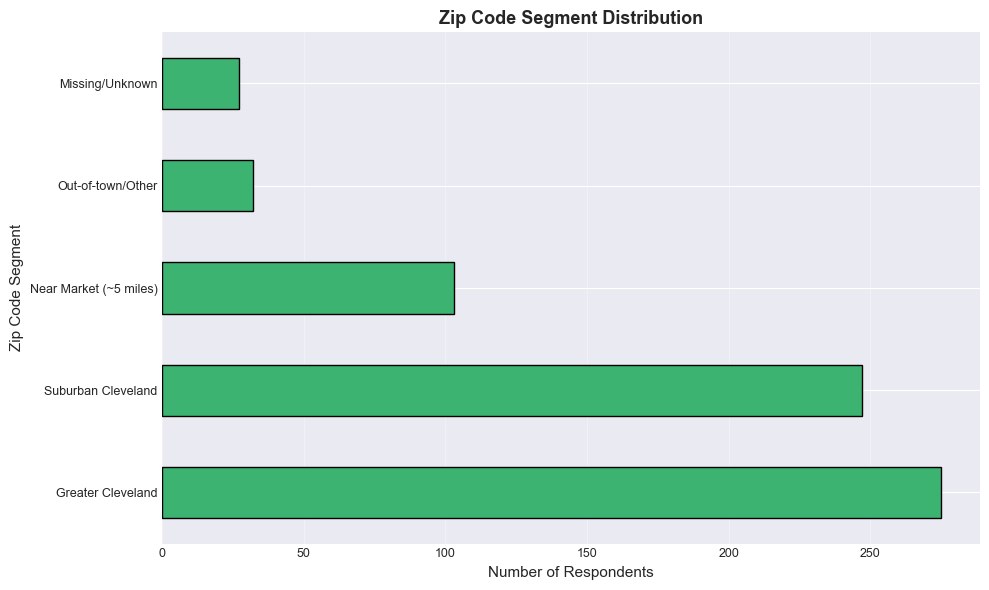


--------------------------------------------------------------------------------
3. INCOME SEGMENTS
--------------------------------------------------------------------------------

Counts:
Income_Segment
Less than $25,000     39
$25,000-$49,999       41
$50,000-$99,999       82
$100,000-$149,999     73
$150,000-$199,999     54
$200,000-$249,999     32
$250,000+             46
Prefer not to say    131
Name: count, dtype: int64

Percentages:
Income_Segment
Less than $25,000     5.7
$25,000-$49,999       6.0
$50,000-$99,999      12.0
$100,000-$149,999    10.7
$150,000-$199,999     7.9
$200,000-$249,999     4.7
$250,000+             6.7
Prefer not to say    19.2
Name: count, dtype: float64


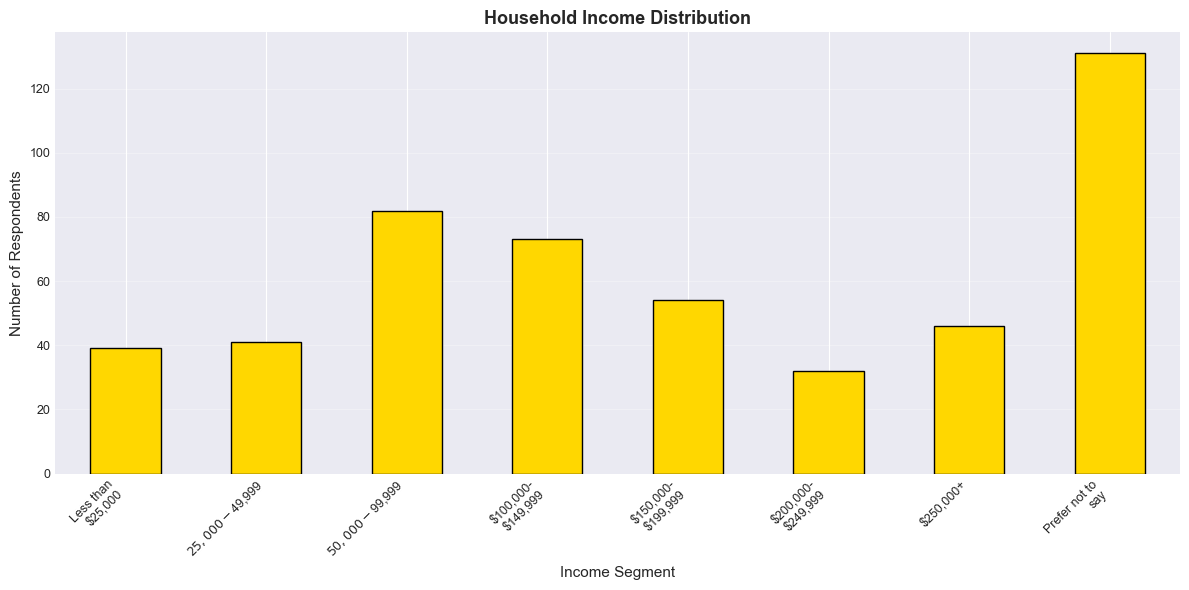


--------------------------------------------------------------------------------
4. HOUSEHOLD SIZE
--------------------------------------------------------------------------------

Counts:
Household_Size
1                     92
2                    158
3                     64
4                    104
5                     45
6                     13
7+                     9
Prefer not to say     19
Name: count, dtype: int64

Percentages:
Household_Size
1                    13.5
2                    23.1
3                     9.4
4                    15.2
5                     6.6
6                     1.9
7+                    1.3
Prefer not to say     2.8
Name: count, dtype: float64


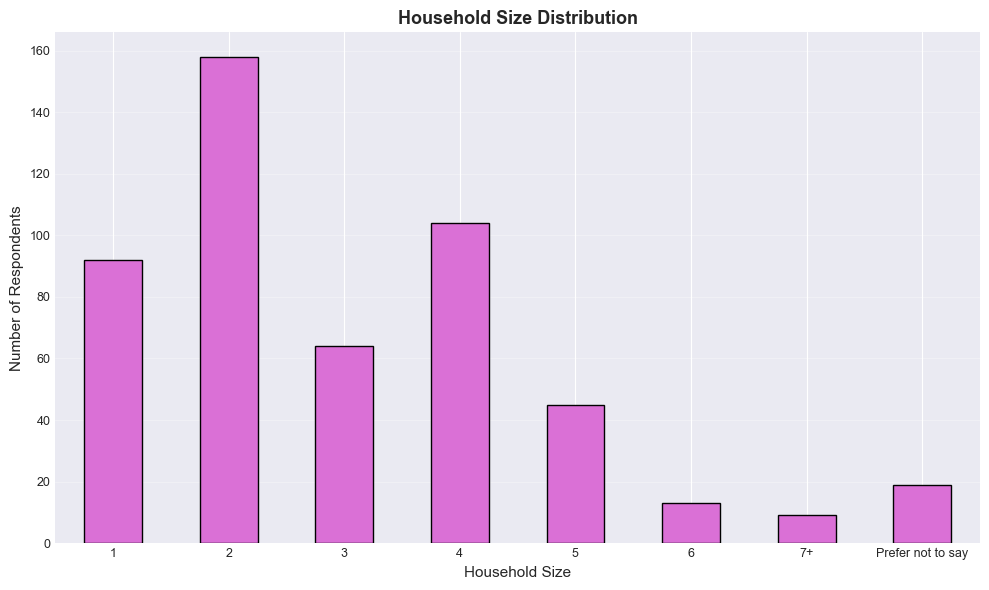


--------------------------------------------------------------------------------
5. GENDER SEGMENTS
--------------------------------------------------------------------------------

Counts:
Gender
Female               271
Male                 210
Missing/Unknown      186
Prefer not to say     12
Other                  5
Name: count, dtype: int64

Percentages:
Gender
Female               39.6
Male                 30.7
Missing/Unknown      27.2
Prefer not to say     1.8
Other                 0.7
Name: count, dtype: float64


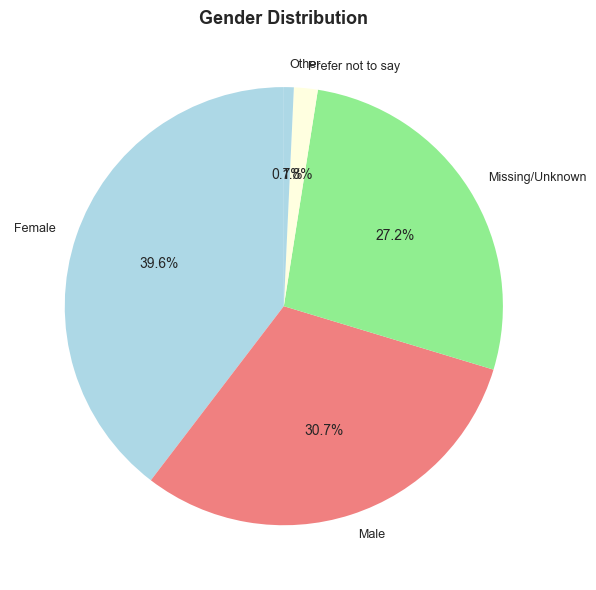


--------------------------------------------------------------------------------
6. RACE/ETHNICITY SEGMENTS
--------------------------------------------------------------------------------

Counts:
Race_Ethnicity
White/Caucasian      406
Missing/Unknown      182
Prefer not to say     29
Asian                 28
African American      15
Other                 12
Hispanic               9
Pacific Islander       3
Name: count, dtype: int64

Percentages:
Race_Ethnicity
White/Caucasian      59.4
Missing/Unknown      26.6
Prefer not to say     4.2
Asian                 4.1
African American      2.2
Other                 1.8
Hispanic              1.3
Pacific Islander      0.4
Name: count, dtype: float64


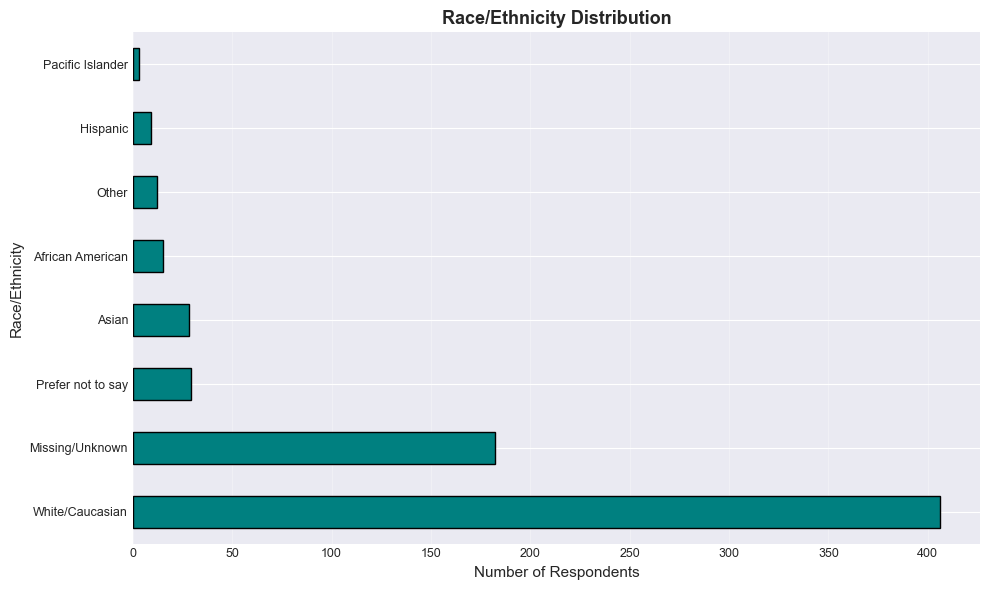


DEMOGRAPHIC SUMMARY STATISTICS
        Variable  Missing Values  Total Responses  Response Rate (%)
       Age Group               0              684              100.0
Zip Code Segment              27              657               96.1
  Income Segment             186              498               72.8
  Household Size             180              504               73.7
          Gender             186              498               72.8
  Race/Ethnicity             182              502               73.4


In [38]:
# A. DEMOGRAPHIC-BASED SEGMENTATION ANALYSIS

print("="*80)
print("SECTION A: DEMOGRAPHIC-BASED SEGMENTATION")
print("="*80)
print(f"\nTotal respondents: {len(df)}")
print(f"Missing values per demographic variable:\n{df[['Q5', 'Q4', 'Q34', 'Q33', 'Q35', 'Q36']].isnull().sum()}\n")

# Helper function to map codes to labels
def map_values(series, mapping_dict):
    """Map numeric codes to labels, handling missing values"""
    return series.map(mapping_dict).fillna('Missing/Unknown')

# 1. AGE GROUPS
print("\n" + "-"*80)
print("1. AGE GROUPS DISTRIBUTION")
print("-"*80)
df['Age_Group'] = map_values(df['Q5'], q5_key)
age_counts = df['Age_Group'].value_counts().sort_index()
age_pct = (age_counts / len(df) * 100).round(1)

print("\nCounts:")
print(age_counts)
print("\nPercentages:")
print(age_pct)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
age_counts.plot(kind='bar', ax=ax1, color='steelblue', edgecolor='black')
ax1.set_title('Age Group Distribution (Counts)', fontsize=13, fontweight='bold')
ax1.set_xlabel('Age Group', fontsize=11)
ax1.set_ylabel('Number of Respondents', fontsize=11)
ax1.set_xticklabels(wrap_labels(age_counts.index, width=12), rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

age_pct.plot(kind='bar', ax=ax2, color='coral', edgecolor='black')
ax2.set_title('Age Group Distribution (Percentages)', fontsize=13, fontweight='bold')
ax2.set_xlabel('Age Group', fontsize=11)
ax2.set_ylabel('Percentage (%)', fontsize=11)
ax2.set_xticklabels(wrap_labels(age_pct.index, width=12), rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 2. ZIP CODE SEGMENTS
print("\n" + "-"*80)
print("2. ZIP CODE SEGMENTS")
print("-"*80)
# Define zip code segments (Cleveland area zip codes)
cleveland_zips = ['44102', '44103', '44104', '44105', '44106', '44107', '44108', '44109', 
                   '44110', '44111', '44112', '44113', '44114', '44115', '44119', '44120',
                   '44125', '44126', '44127', '44128', '44129', '44130', '44131', '44134',
                   '44135', '44137', '44138', '44139', '44140', '44141', '44142', '44143',
                   '44144', '44145', '44146', '44147']

def categorize_zip(zip_code):
    """Categorize zip codes into segments"""
    if pd.isna(zip_code):
        return 'Missing/Unknown'
    zip_str = str(int(zip_code)) if not pd.isna(zip_code) else ''
    if zip_str in cleveland_zips:
        # Check if within ~5 miles of West Side Market (44113)
        if zip_str == '44113' or zip_str in ['44102', '44103', '44109', '44110', '44111']:
            return 'Near Market (~5 miles)'
        else:
            return 'Greater Cleveland'
    elif zip_str.startswith('44'):
        return 'Suburban Cleveland'
    else:
        return 'Out-of-town/Other'

df['Zip_Segment'] = df['Q4'].apply(categorize_zip)
zip_counts = df['Zip_Segment'].value_counts()
zip_pct = (zip_counts / len(df) * 100).round(1)

print("\nCounts:")
print(zip_counts)
print("\nPercentages:")
print(zip_pct)

fig, ax = plt.subplots(figsize=(10, 6))
zip_counts.plot(kind='barh', ax=ax, color='mediumseagreen', edgecolor='black')
ax.set_title('Zip Code Segment Distribution', fontsize=13, fontweight='bold')
ax.set_xlabel('Number of Respondents', fontsize=11)
ax.set_ylabel('Zip Code Segment', fontsize=11)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# 3. INCOME SEGMENTS
print("\n" + "-"*80)
print("3. INCOME SEGMENTS")
print("-"*80)
df['Income_Segment'] = map_values(df['Q34'], q34_key)
income_counts = df['Income_Segment'].value_counts()
# Reorder by income level
income_order = list(q34_key.values())
income_counts = income_counts.reindex([x for x in income_order if x in income_counts.index])
income_pct = (income_counts / len(df) * 100).round(1)

print("\nCounts:")
print(income_counts)
print("\nPercentages:")
print(income_pct)

fig, ax = plt.subplots(figsize=(12, 6))
income_counts.plot(kind='bar', ax=ax, color='gold', edgecolor='black')
ax.set_title('Household Income Distribution', fontsize=13, fontweight='bold')
ax.set_xlabel('Income Segment', fontsize=11)
ax.set_ylabel('Number of Respondents', fontsize=11)
ax.set_xticklabels(wrap_labels(income_counts.index, width=15), rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 4. HOUSEHOLD SIZE
print("\n" + "-"*80)
print("4. HOUSEHOLD SIZE")
print("-"*80)
df['Household_Size'] = map_values(df['Q33'], q33_key)
hh_counts = df['Household_Size'].value_counts()
hh_order = ['1', '2', '3', '4', '5', '6', '7+', 'Prefer not to say']
hh_counts = hh_counts.reindex([x for x in hh_order if x in hh_counts.index])
hh_pct = (hh_counts / len(df) * 100).round(1)

print("\nCounts:")
print(hh_counts)
print("\nPercentages:")
print(hh_pct)

fig, ax = plt.subplots(figsize=(10, 6))
hh_counts.plot(kind='bar', ax=ax, color='orchid', edgecolor='black')
ax.set_title('Household Size Distribution', fontsize=13, fontweight='bold')
ax.set_xlabel('Household Size', fontsize=11)
ax.set_ylabel('Number of Respondents', fontsize=11)
ax.set_xticklabels(hh_counts.index, rotation=0)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 5. GENDER SEGMENTS
print("\n" + "-"*80)
print("5. GENDER SEGMENTS")
print("-"*80)
df['Gender'] = map_values(df['Q35'], q39_key)
gender_counts = df['Gender'].value_counts()
gender_pct = (gender_counts / len(df) * 100).round(1)

print("\nCounts:")
print(gender_counts)
print("\nPercentages:")
print(gender_pct)

fig, ax = plt.subplots(figsize=(8, 6))
gender_counts.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, 
                   colors=['lightblue', 'lightcoral', 'lightgreen', 'lightyellow'])
ax.set_title('Gender Distribution', fontsize=13, fontweight='bold')
ax.set_ylabel('')
plt.tight_layout()
plt.show()

# 6. RACE/ETHNICITY SEGMENTS
print("\n" + "-"*80)
print("6. RACE/ETHNICITY SEGMENTS")
print("-"*80)
df['Race_Ethnicity'] = map_values(df['Q36'], q36_key)
race_counts = df['Race_Ethnicity'].value_counts()
race_pct = (race_counts / len(df) * 100).round(1)

print("\nCounts:")
print(race_counts)
print("\nPercentages:")
print(race_pct)

fig, ax = plt.subplots(figsize=(10, 6))
race_counts.plot(kind='barh', ax=ax, color='teal', edgecolor='black')
ax.set_title('Race/Ethnicity Distribution', fontsize=13, fontweight='bold')
ax.set_xlabel('Number of Respondents', fontsize=11)
ax.set_ylabel('Race/Ethnicity', fontsize=11)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# SUMMARY STATISTICS TABLE
print("\n" + "="*80)
print("DEMOGRAPHIC SUMMARY STATISTICS")
print("="*80)
demo_summary = pd.DataFrame({
    'Variable': ['Age Group', 'Zip Code Segment', 'Income Segment', 
                 'Household Size', 'Gender', 'Race/Ethnicity'],
    'Missing Values': [
        df['Q5'].isnull().sum(),
        df['Q4'].isnull().sum(),
        df['Q34'].isnull().sum(),
        df['Q33'].isnull().sum(),
        df['Q35'].isnull().sum(),
        df['Q36'].isnull().sum()
    ],
    'Total Responses': [
        df['Q5'].notna().sum(),
        df['Q4'].notna().sum(),
        df['Q34'].notna().sum(),
        df['Q33'].notna().sum(),
        df['Q35'].notna().sum(),
        df['Q36'].notna().sum()
    ]
})
demo_summary['Response Rate (%)'] = (demo_summary['Total Responses'] / len(df) * 100).round(1)
print(demo_summary.to_string(index=False))


SECTION B: AWARENESS & FAMILIARITY SEGMENTATION

Awareness Segment Distribution:

Counts:
Awareness_Segment
I've been there                                   621
I've heard of it but have not  been there          47
I've never heard of it and have not been there     16
Name: count, dtype: int64

Percentages:
Awareness_Segment
I've been there                                   90.8
I've heard of it but have not  been there          6.9
I've never heard of it and have not been there     2.3
Name: count, dtype: float64


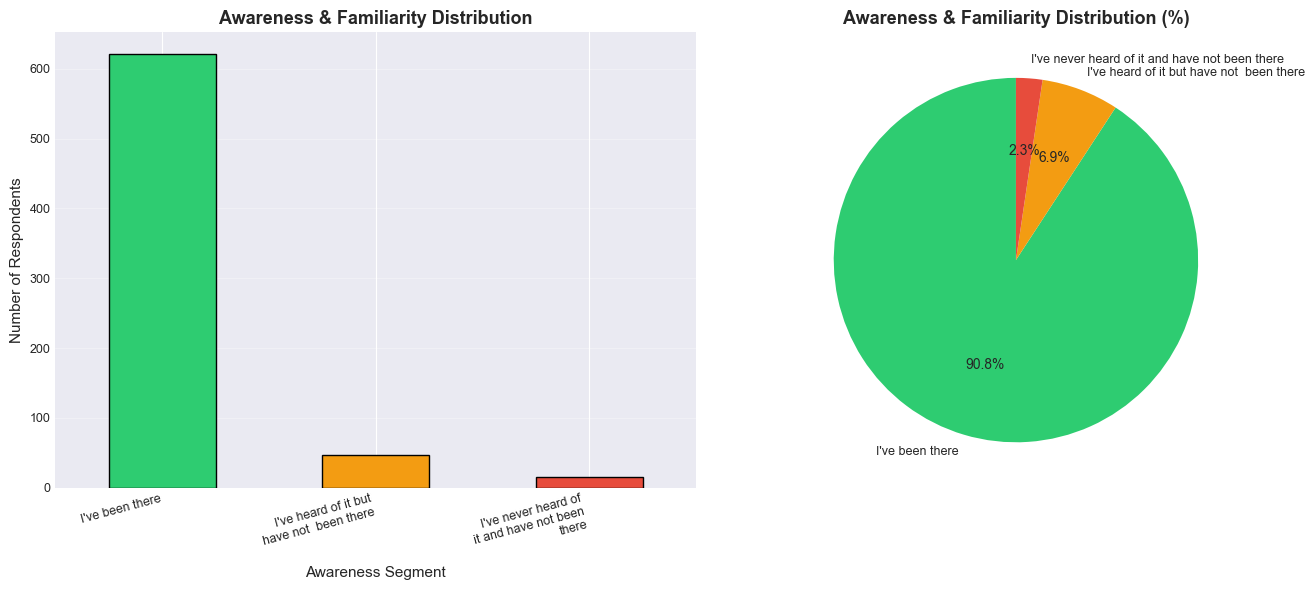


--------------------------------------------------------------------------------
IMPRESSIONS: 'Heard of it but never been' segment
--------------------------------------------------------------------------------

Number of respondents who heard of it but never been: 47

Number with impressions provided: 38

Sample impressions:
1. Very nice...
2. On must visit list!...
3. It seems like a fun place with lots of options to choose from....
4. A place that has a little bit of everything grocery wise....
5. Cool place to try fresh produce/artisanal goods, famous Cleveland spot...

--------------------------------------------------------------------------------
COMMUNICATION CHANNELS: 'Never heard of it' segment
--------------------------------------------------------------------------------

Number of respondents who never heard of it: 16

Communication channels used by 'Never heard' segment:
             Channel  Count
Physical advertising      8
           Instagram      6
              O

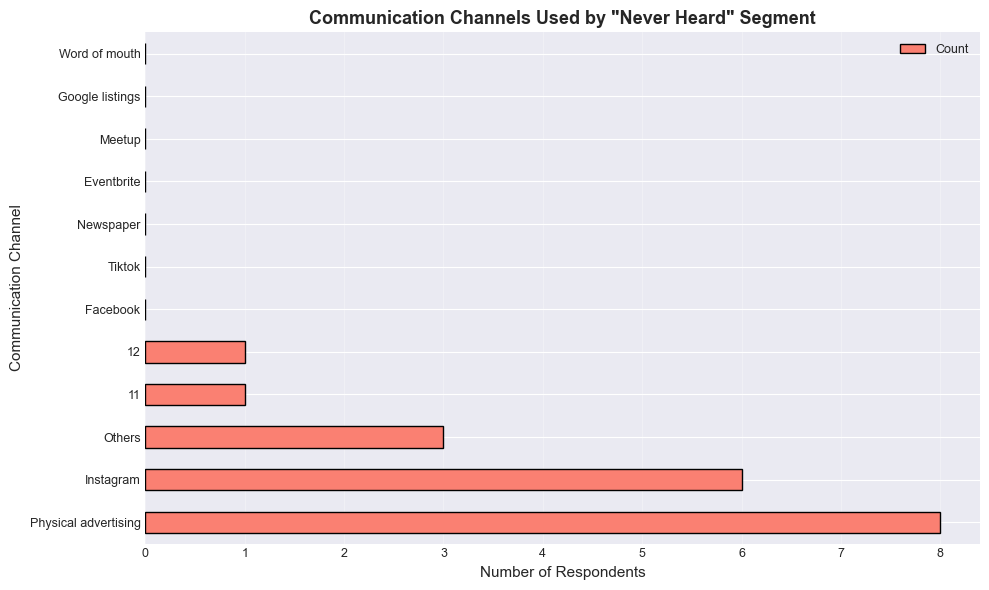


CROSS-TABULATION: Awareness × Age Group
Age_Group                                       18-20  21-24  25-40  41-59  \
Awareness_Segment                                                            
I've been there                                    33     83    160    143   
I've heard of it but have not  been there           8      9      1      2   
I've never heard of it and have not been there      0      2      1      0   
All                                                41     94    162    145   

Age_Group                                       60+  Under 18  All  
Awareness_Segment                                                   
I've been there                                 163        39  621  
I've heard of it but have not  been there         8        19   47  
I've never heard of it and have not been there    2        11   16  
All                                             173        69  684  

Row percentages (within each awareness segment):
Age_Group                 

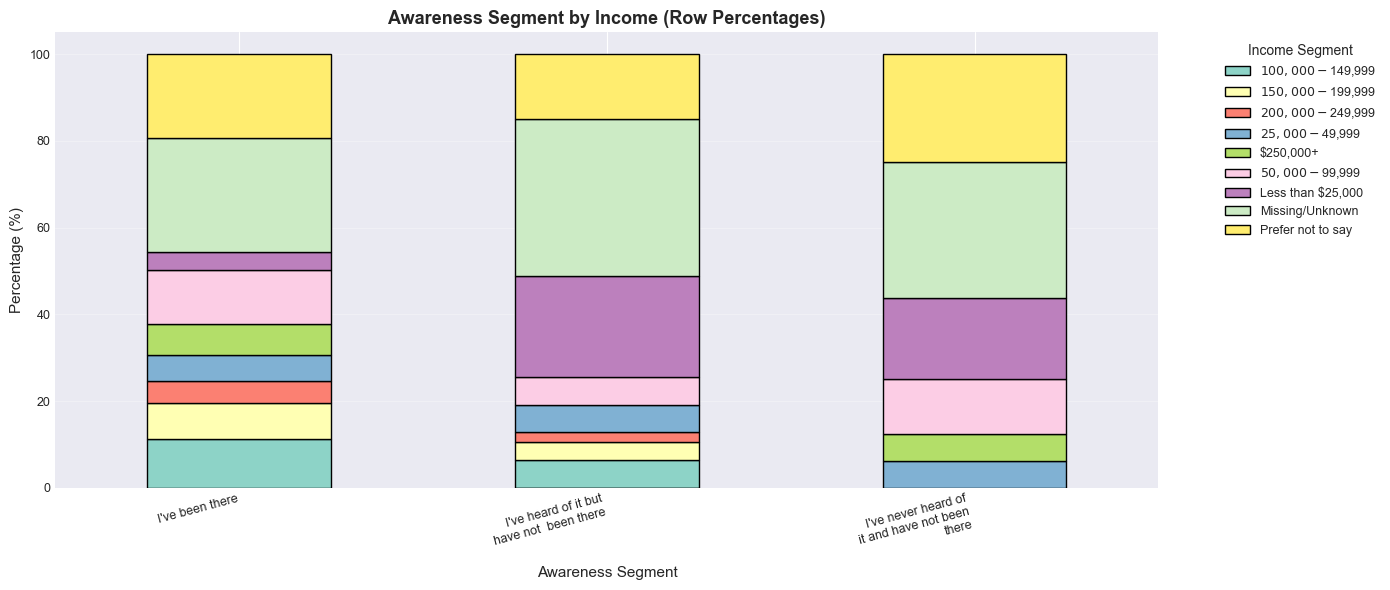

In [39]:
# B. AWARENESS & FAMILIARITY SEGMENTATION

print("="*80)
print("SECTION B: AWARENESS & FAMILIARITY SEGMENTATION")
print("="*80)

# Create awareness segments
df['Awareness_Segment'] = map_values(df['Q3'], q3_key)
awareness_counts = df['Awareness_Segment'].value_counts()
awareness_pct = (awareness_counts / len(df) * 100).round(1)

print("\nAwareness Segment Distribution:")
print("\nCounts:")
print(awareness_counts)
print("\nPercentages:")
print(awareness_pct)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart
awareness_counts.plot(kind='bar', ax=ax1, color=['#2ecc71', '#f39c12', '#e74c3c'], edgecolor='black')
ax1.set_title('Awareness & Familiarity Distribution', fontsize=13, fontweight='bold')
ax1.set_xlabel('Awareness Segment', fontsize=11)
ax1.set_ylabel('Number of Respondents', fontsize=11)
ax1.set_xticklabels(wrap_labels(awareness_counts.index, width=20), rotation=15, ha='right')
ax1.grid(axis='y', alpha=0.3)

# Pie chart
awareness_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90,
                      colors=['#2ecc71', '#f39c12', '#e74c3c'])
ax2.set_title('Awareness & Familiarity Distribution (%)', fontsize=13, fontweight='bold')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

# Analyze impressions for "Heard of it but never been" segment
print("\n" + "-"*80)
print("IMPRESSIONS: 'Heard of it but never been' segment")
print("-"*80)
heard_not_been = df[df['Q3'] == 2].copy()
print(f"\nNumber of respondents who heard of it but never been: {len(heard_not_been)}")
if len(heard_not_been) > 0:
    impressions = heard_not_been['Q10'].dropna()
    print(f"\nNumber with impressions provided: {len(impressions)}")
    if len(impressions) > 0:
        print("\nSample impressions:")
        for i, imp in enumerate(impressions.head(5), 1):
            print(f"{i}. {imp[:100]}...")

# Analyze communication channels for "Never heard of it" segment
print("\n" + "-"*80)
print("COMMUNICATION CHANNELS: 'Never heard of it' segment")
print("-"*80)
never_heard = df[df['Q3'] == 3].copy()
print(f"\nNumber of respondents who never heard of it: {len(never_heard)}")

if len(never_heard) > 0:
    # Analyze Q32 (communication channels) for this segment
    q32_cols = [col for col in df.columns if col.startswith('Q32_') and col != 'Q32_12_TEXT']
    channel_usage = {}
    for col in q32_cols:
        channel_name = col.replace('Q32_', '')
        if channel_name.isdigit():
            channel_name = q32_key.get(int(channel_name), channel_name)
        # Use == 1 for indicator columns (parsed from multi-select)
        channel_usage[channel_name] = (never_heard[col] == 1).sum() if col in never_heard.columns else 0
    
    if channel_usage:
        channel_df = pd.DataFrame(list(channel_usage.items()), columns=['Channel', 'Count'])
        channel_df = channel_df.sort_values('Count', ascending=False)
        print("\nCommunication channels used by 'Never heard' segment:")
        print(channel_df.to_string(index=False))
        
        fig, ax = plt.subplots(figsize=(10, 6))
        channel_df.plot(x='Channel', y='Count', kind='barh', ax=ax, color='salmon', edgecolor='black')
        ax.set_title('Communication Channels Used by "Never Heard" Segment', fontsize=13, fontweight='bold')
        ax.set_xlabel('Number of Respondents', fontsize=11)
        ax.set_ylabel('Communication Channel', fontsize=11)
        ax.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()

# Cross-tabulation: Awareness × Demographics
print("\n" + "="*80)
print("CROSS-TABULATION: Awareness × Age Group")
print("="*80)
if 'Age_Group' in df.columns:
    crosstab_age = pd.crosstab(df['Awareness_Segment'], df['Age_Group'], margins=True)
    print(crosstab_age)
    
    # Normalized crosstab (percentages)
    crosstab_age_pct = pd.crosstab(df['Awareness_Segment'], df['Age_Group'], normalize='index') * 100
    print("\nRow percentages (within each awareness segment):")
    print(crosstab_age_pct.round(1))

print("\n" + "="*80)
print("CROSS-TABULATION: Awareness × Income Segment")
print("="*80)
if 'Income_Segment' in df.columns:
    crosstab_income = pd.crosstab(df['Awareness_Segment'], df['Income_Segment'], margins=True)
    print(crosstab_income)
    
    # Visualize
    crosstab_income_pct = pd.crosstab(df['Awareness_Segment'], df['Income_Segment'], normalize='index') * 100
    fig, ax = plt.subplots(figsize=(14, 6))
    crosstab_income_pct.plot(kind='bar', ax=ax, stacked=True, colormap='Set3', edgecolor='black')
    ax.set_title('Awareness Segment by Income (Row Percentages)', fontsize=13, fontweight='bold')
    ax.set_xlabel('Awareness Segment', fontsize=11)
    ax.set_ylabel('Percentage (%)', fontsize=11)
    ax.set_xticklabels(wrap_labels(crosstab_income_pct.index, width=20), rotation=15, ha='right')
    ax.legend(title='Income Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()


# B. Awareness & Familiarity Segments

**Never Heard of the West Side Market**
- No previous awareness
- Analyze channels for outreach opportunities

**Heard of It but Never Been**
- Has impressions but no experience
- Identify barriers to first visit

**Has Been There**
- Full behavioral segmentation possible
- Compare frequency, spend, satisfaction


SECTION C: BEHAVIORAL SEGMENTATION (VISITORS ONLY)

Total visitors (have been to market): 621
Percentage of total respondents: 90.8%

--------------------------------------------------------------------------------
1. VISIT FREQUENCY
--------------------------------------------------------------------------------

Counts:
Visit_Frequency
Once a year or less     66
A few times a year     115
Monthly                296
Weekly or more         104
Name: count, dtype: int64

Percentages:
Visit_Frequency
Once a year or less    10.6
A few times a year     18.5
Monthly                47.7
Weekly or more         16.7
Name: count, dtype: float64


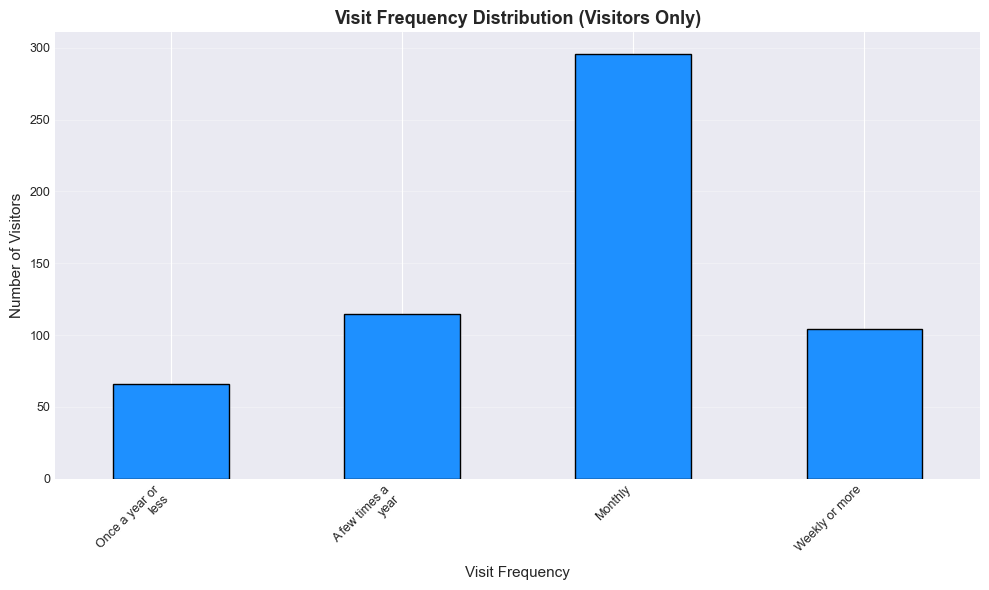


--------------------------------------------------------------------------------
2. SPENDING LEVELS
--------------------------------------------------------------------------------

Counts:
Spending_Level
Less than $20     121
$20-50            240
$50-100           148
More than $100     72
Name: count, dtype: int64

Percentages:
Spending_Level
Less than $20     19.5
$20-50            38.6
$50-100           23.8
More than $100    11.6
Name: count, dtype: float64


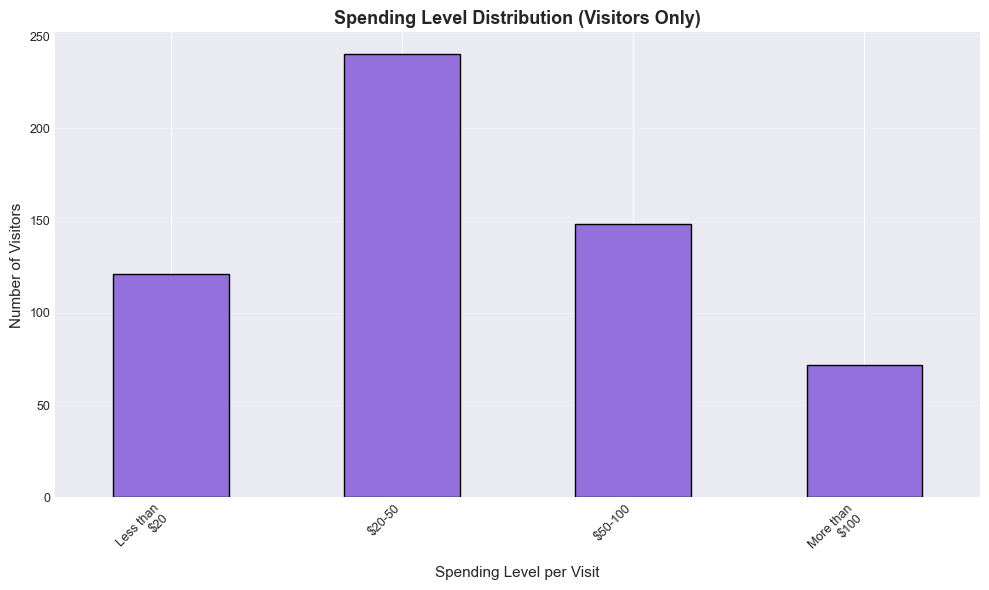


--------------------------------------------------------------------------------
3. SHOPPING STYLE
--------------------------------------------------------------------------------

Counts:
Shopping_Style
Both                        284
Explore different stalls    234
Specific Vendors only        63
Missing/Unknown              40
Name: count, dtype: int64

Percentages:
Shopping_Style
Both                        45.7
Explore different stalls    37.7
Specific Vendors only       10.1
Missing/Unknown              6.4
Name: count, dtype: float64


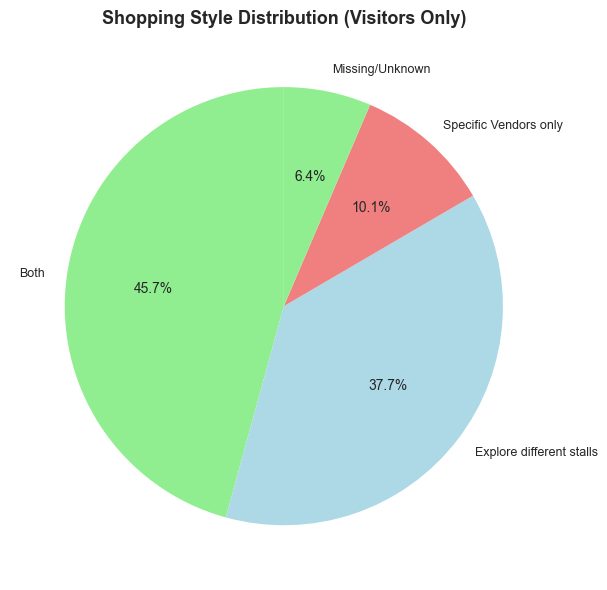


--------------------------------------------------------------------------------
4. TRAVEL MODE
--------------------------------------------------------------------------------

Counts:
Travel_Mode
Driving            425
Walking            111
Public transit      40
Missing/Unknown     40
Bike/Scooter         5
Name: count, dtype: int64

Percentages:
Travel_Mode
Driving            68.4
Walking            17.9
Public transit      6.4
Missing/Unknown     6.4
Bike/Scooter        0.8
Name: count, dtype: float64


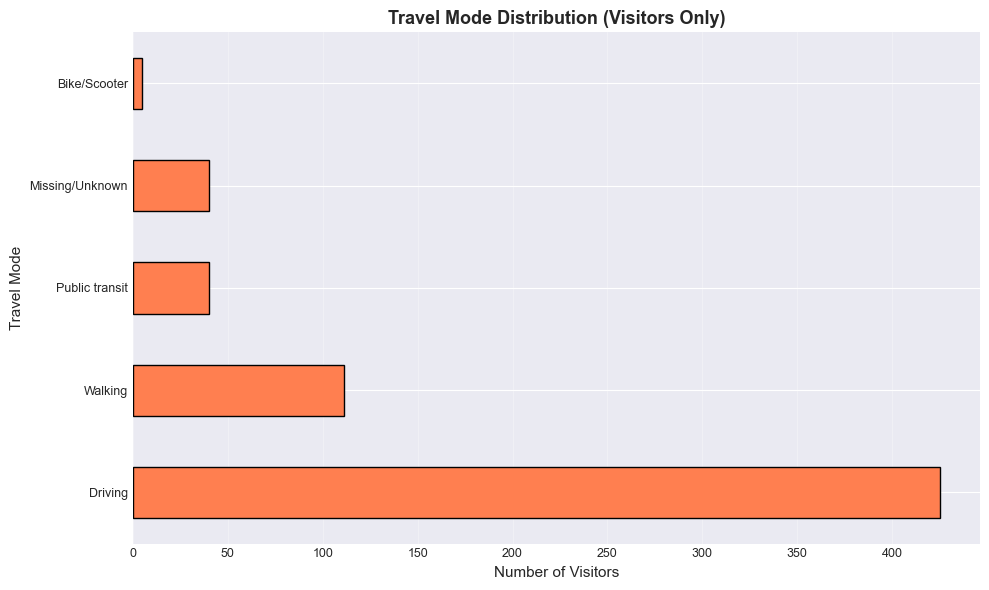


--------------------------------------------------------------------------------
5. TIME SINCE LAST VISIT
--------------------------------------------------------------------------------

Counts:
Last_Visit
Within the last week     107
Within the last month    186
Within the last year     239
More than a year ago      49
Name: count, dtype: int64

Percentages:
Last_Visit
Within the last week     17.2
Within the last month    30.0
Within the last year     38.5
More than a year ago      7.9
Name: count, dtype: float64

Lapsed visitors (last visit >1 year ago): 49 (7.9%)


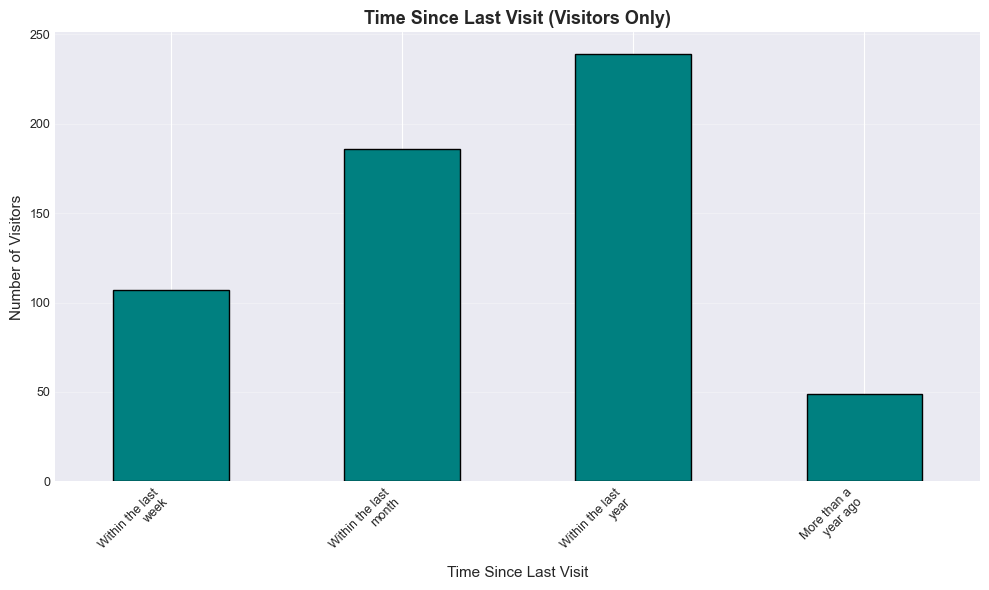


CROSS-TABULATION: Visit Frequency × Spending Level
Spending_Level       $20-50  $50-100  Less than $20  Missing/Unknown  \
Visit_Frequency                                                        
A few times a year       39       34             23                0   
Missing/Unknown           0        0              0               40   
Monthly                 130       75             59                0   
Once a year or less      26       19             10                0   
Weekly or more           45       20             29                0   
All                     240      148            121               40   

Spending_Level       More than $100  All  
Visit_Frequency                           
A few times a year               19  115  
Missing/Unknown                   0   40  
Monthly                          32  296  
Once a year or less              11   66  
Weekly or more                   10  104  
All                              72  621  


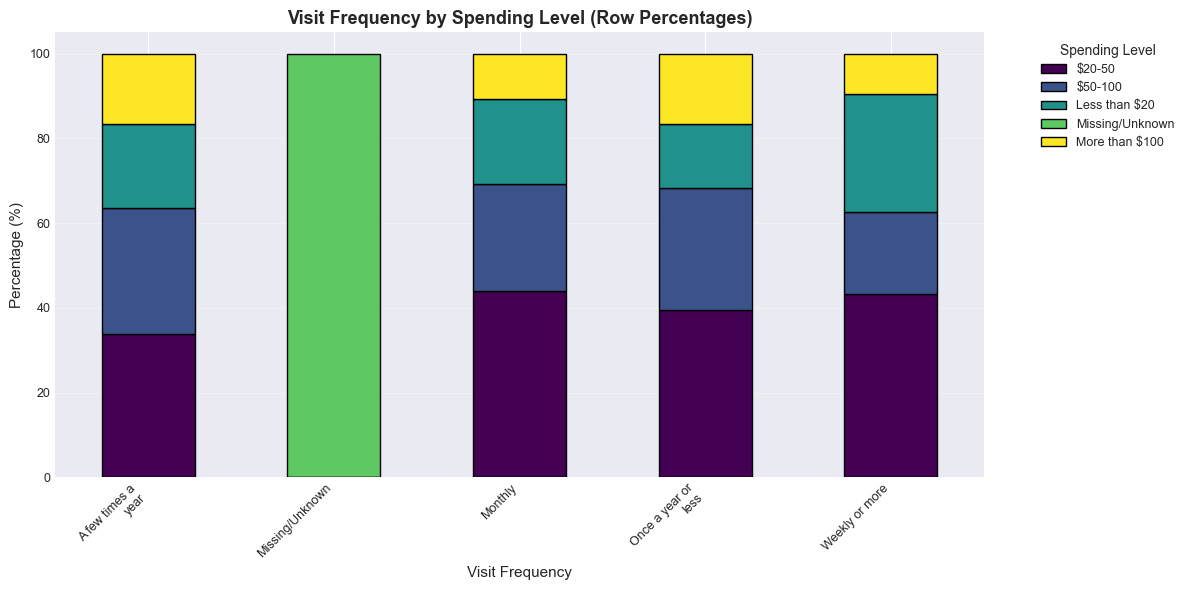


CROSS-TABULATION: Shopping Style × Travel Mode
Travel_Mode               Bike/Scooter  Driving  Missing/Unknown  \
Shopping_Style                                                     
Both                                 4      211                0   
Explore different stalls             0      168                0   
Missing/Unknown                      0        0               40   
Specific Vendors only                1       46                0   
All                                  5      425               40   

Travel_Mode               Public transit  Walking  All  
Shopping_Style                                          
Both                                  19       50  284  
Explore different stalls              19       47  234  
Missing/Unknown                        0        0   40  
Specific Vendors only                  2       14   63  
All                                   40      111  621  

BEHAVIORAL SEGMENTATION SUMMARY
  Behavioral Variable  Missing Values  Tota

In [40]:
# C. BEHAVIORAL SEGMENTS (VISITORS ONLY)

print("="*80)
print("SECTION C: BEHAVIORAL SEGMENTATION (VISITORS ONLY)")
print("="*80)

# Filter to only visitors (Q3 == 1)
visitors = df[df['Q3'] == 1].copy()
print(f"\nTotal visitors (have been to market): {len(visitors)}")
print(f"Percentage of total respondents: {len(visitors)/len(df)*100:.1f}%\n")

if len(visitors) == 0:
    print("No visitors found in dataset.")
else:
    # 1. VISIT FREQUENCY
    print("-"*80)
    print("1. VISIT FREQUENCY")
    print("-"*80)
    visitors['Visit_Frequency'] = map_values(visitors['Q8'], q8_key)
    freq_counts = visitors['Visit_Frequency'].value_counts()
    freq_order = list(q8_key.values())
    freq_counts = freq_counts.reindex([x for x in freq_order if x in freq_counts.index])
    freq_pct = (freq_counts / len(visitors) * 100).round(1)
    
    print("\nCounts:")
    print(freq_counts)
    print("\nPercentages:")
    print(freq_pct)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    freq_counts.plot(kind='bar', ax=ax, color='dodgerblue', edgecolor='black')
    ax.set_title('Visit Frequency Distribution (Visitors Only)', fontsize=13, fontweight='bold')
    ax.set_xlabel('Visit Frequency', fontsize=11)
    ax.set_ylabel('Number of Visitors', fontsize=11)
    ax.set_xticklabels(wrap_labels(freq_counts.index, width=15), rotation=45, ha='right')
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # 2. SPENDING LEVELS
    print("\n" + "-"*80)
    print("2. SPENDING LEVELS")
    print("-"*80)
    visitors['Spending_Level'] = map_values(visitors['Q11'], q11_key)
    spend_counts = visitors['Spending_Level'].value_counts()
    spend_order = list(q11_key.values())
    spend_counts = spend_counts.reindex([x for x in spend_order if x in spend_counts.index])
    spend_pct = (spend_counts / len(visitors) * 100).round(1)
    
    print("\nCounts:")
    print(spend_counts)
    print("\nPercentages:")
    print(spend_pct)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    spend_counts.plot(kind='bar', ax=ax, color='mediumpurple', edgecolor='black')
    ax.set_title('Spending Level Distribution (Visitors Only)', fontsize=13, fontweight='bold')
    ax.set_xlabel('Spending Level per Visit', fontsize=11)
    ax.set_ylabel('Number of Visitors', fontsize=11)
    ax.set_xticklabels(wrap_labels(spend_counts.index, width=12), rotation=45, ha='right')
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # 3. SHOPPING STYLE
    print("\n" + "-"*80)
    print("3. SHOPPING STYLE")
    print("-"*80)
    visitors['Shopping_Style'] = map_values(visitors['Q12'], q12_key)
    style_counts = visitors['Shopping_Style'].value_counts()
    style_pct = (style_counts / len(visitors) * 100).round(1)
    
    print("\nCounts:")
    print(style_counts)
    print("\nPercentages:")
    print(style_pct)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    style_counts.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90,
                      colors=['lightgreen', 'lightblue', 'lightcoral'])
    ax.set_title('Shopping Style Distribution (Visitors Only)', fontsize=13, fontweight='bold')
    ax.set_ylabel('')
    plt.tight_layout()
    plt.show()
    
    # 4. TRAVEL MODE
    print("\n" + "-"*80)
    print("4. TRAVEL MODE")
    print("-"*80)
    visitors['Travel_Mode'] = map_values(visitors['Q7'], q7_key)
    travel_counts = visitors['Travel_Mode'].value_counts()
    travel_pct = (travel_counts / len(visitors) * 100).round(1)
    
    print("\nCounts:")
    print(travel_counts)
    print("\nPercentages:")
    print(travel_pct)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    travel_counts.plot(kind='barh', ax=ax, color='coral', edgecolor='black')
    ax.set_title('Travel Mode Distribution (Visitors Only)', fontsize=13, fontweight='bold')
    ax.set_xlabel('Number of Visitors', fontsize=11)
    ax.set_ylabel('Travel Mode', fontsize=11)
    ax.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # 5. TIME SINCE LAST VISIT
    print("\n" + "-"*80)
    print("5. TIME SINCE LAST VISIT")
    print("-"*80)
    visitors['Last_Visit'] = map_values(visitors['Q9'], q9_key)
    last_visit_counts = visitors['Last_Visit'].value_counts()
    last_order = list(q9_key.values())
    last_visit_counts = last_visit_counts.reindex([x for x in last_order if x in last_visit_counts.index])
    last_pct = (last_visit_counts / len(visitors) * 100).round(1)
    
    print("\nCounts:")
    print(last_visit_counts)
    print("\nPercentages:")
    print(last_pct)
    
    # Identify lapsed visitors (last visit >1 year ago)
    lapsed = visitors[visitors['Q9'] == 4]
    print(f"\nLapsed visitors (last visit >1 year ago): {len(lapsed)} ({len(lapsed)/len(visitors)*100:.1f}%)")
    
    fig, ax = plt.subplots(figsize=(10, 6))
    last_visit_counts.plot(kind='bar', ax=ax, color='teal', edgecolor='black')
    ax.set_title('Time Since Last Visit (Visitors Only)', fontsize=13, fontweight='bold')
    ax.set_xlabel('Time Since Last Visit', fontsize=11)
    ax.set_ylabel('Number of Visitors', fontsize=11)
    ax.set_xticklabels(wrap_labels(last_visit_counts.index, width=15), rotation=45, ha='right')
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # CROSS-TABULATIONS
    print("\n" + "="*80)
    print("CROSS-TABULATION: Visit Frequency × Spending Level")
    print("="*80)
    crosstab_freq_spend = pd.crosstab(visitors['Visit_Frequency'], visitors['Spending_Level'], margins=True)
    print(crosstab_freq_spend)
    
    # Visualize
    crosstab_freq_spend_pct = pd.crosstab(visitors['Visit_Frequency'], visitors['Spending_Level'], normalize='index') * 100
    fig, ax = plt.subplots(figsize=(12, 6))
    crosstab_freq_spend_pct.plot(kind='bar', ax=ax, stacked=True, colormap='viridis', edgecolor='black')
    ax.set_title('Visit Frequency by Spending Level (Row Percentages)', fontsize=13, fontweight='bold')
    ax.set_xlabel('Visit Frequency', fontsize=11)
    ax.set_ylabel('Percentage (%)', fontsize=11)
    ax.set_xticklabels(wrap_labels(crosstab_freq_spend_pct.index, width=15), rotation=45, ha='right')
    ax.legend(title='Spending Level', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*80)
    print("CROSS-TABULATION: Shopping Style × Travel Mode")
    print("="*80)
    crosstab_style_travel = pd.crosstab(visitors['Shopping_Style'], visitors['Travel_Mode'], margins=True)
    print(crosstab_style_travel)
    
    # SUMMARY STATISTICS
    print("\n" + "="*80)
    print("BEHAVIORAL SEGMENTATION SUMMARY")
    print("="*80)
    behavior_summary = pd.DataFrame({
        'Behavioral Variable': ['Visit Frequency', 'Spending Level', 'Shopping Style', 
                               'Travel Mode', 'Time Since Last Visit'],
        'Missing Values': [
            visitors['Q8'].isnull().sum(),
            visitors['Q11'].isnull().sum(),
            visitors['Q12'].isnull().sum(),
            visitors['Q7'].isnull().sum(),
            visitors['Q9'].isnull().sum()
        ],
        'Total Responses': [
            visitors['Q8'].notna().sum(),
            visitors['Q11'].notna().sum(),
            visitors['Q12'].notna().sum(),
            visitors['Q7'].notna().sum(),
            visitors['Q9'].notna().sum()
        ]
    })
    behavior_summary['Response Rate (%)'] = (behavior_summary['Total Responses'] / len(visitors) * 100).round(1)
    print(behavior_summary.to_string(index=False))


SECTION D: MOTIVATION-BASED SEGMENTATION

--------------------------------------------------------------------------------
MOTIVATIONS FOR VISITING WEST SIDE MARKET (Q18)
--------------------------------------------------------------------------------

Motivations for visiting West Side Market:
                                                      Motivation  Count  Percentage
                      Supporting local or independent businesses    370        59.6
                                               Unique Atmosphere    348        56.0
Availability of fresh or specialty itens I cannot find elsewhere    320        51.5
                                                 Product Variety    300        48.3
                                  Tradition and trust in vendors    295        47.5
                                                 Value for money    176        28.3
                                                   Prepared food    153        24.6
                                

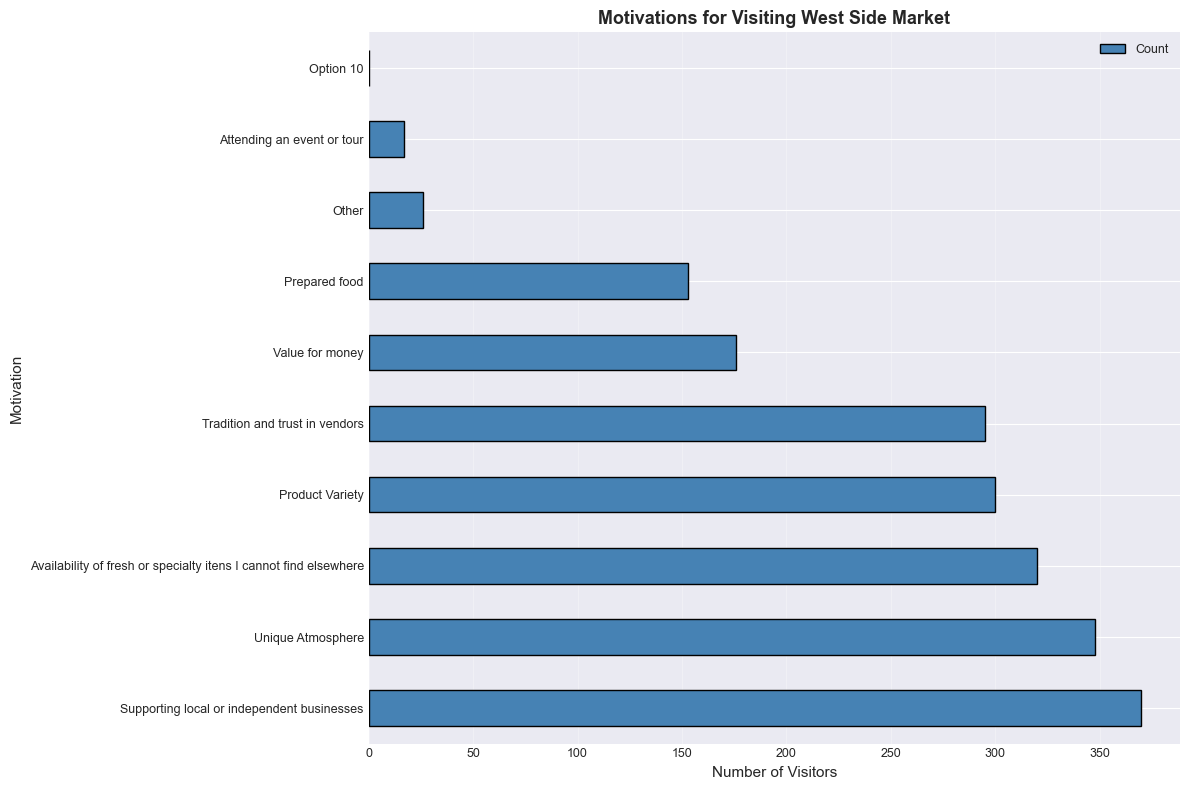


--------------------------------------------------------------------------------
MOTIVATION-BASED SEGMENT CREATION
--------------------------------------------------------------------------------

Motivation Segment Distribution:
Motivation_Segment
Multiple Segments    433
Other/Unspecified    128
Not a visitor         63
Local Loyalist        32
Food Adventurer       20
Specialty Shopper      8
Name: count, dtype: int64

Percentages:
Motivation_Segment
Multiple Segments    63.3
Other/Unspecified    18.7
Not a visitor         9.2
Local Loyalist        4.7
Food Adventurer       2.9
Specialty Shopper     1.2
Name: count, dtype: float64


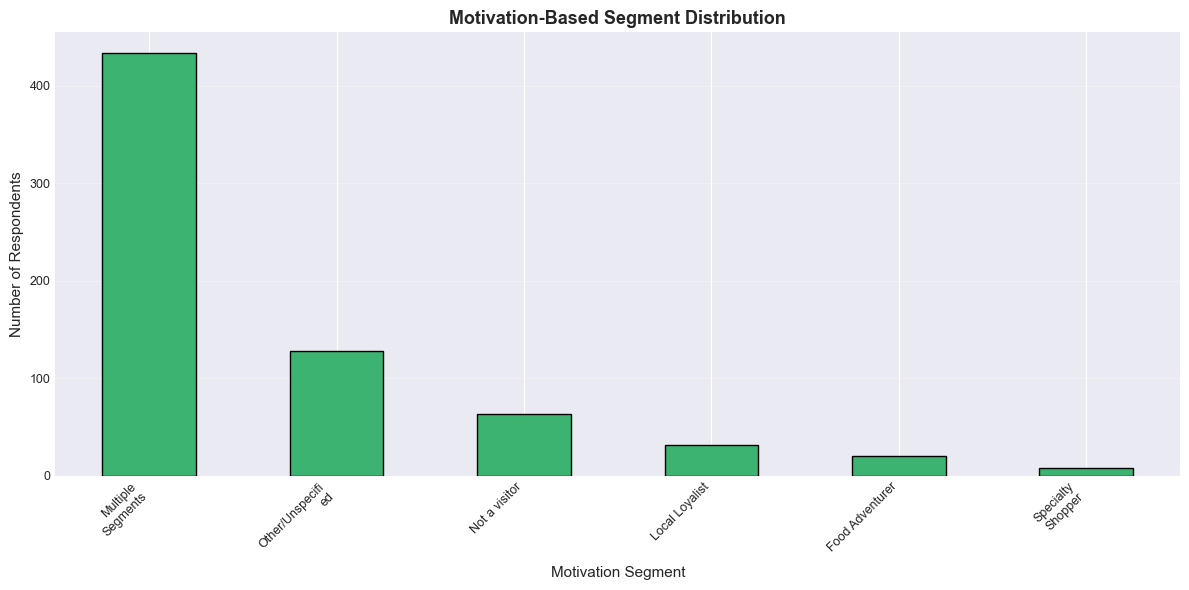


CROSS-TABULATION: Motivation Segment × Age Group
Age_Group           18-20  21-24  25-40  41-59  60+  Under 18  All
Motivation_Segment                                                
Food Adventurer         1      6      3      3    7         0   20
Local Loyalist          1     10      9      9    1         2   32
Multiple Segments      25     56    127    122   80        23  433
Not a visitor           8     11      2      2   10        30   63
Other/Unspecified       5     11     19      8   72        13  128
Specialty Shopper       1      0      2      1    3         1    8
All                    41     94    162    145  173        69  684


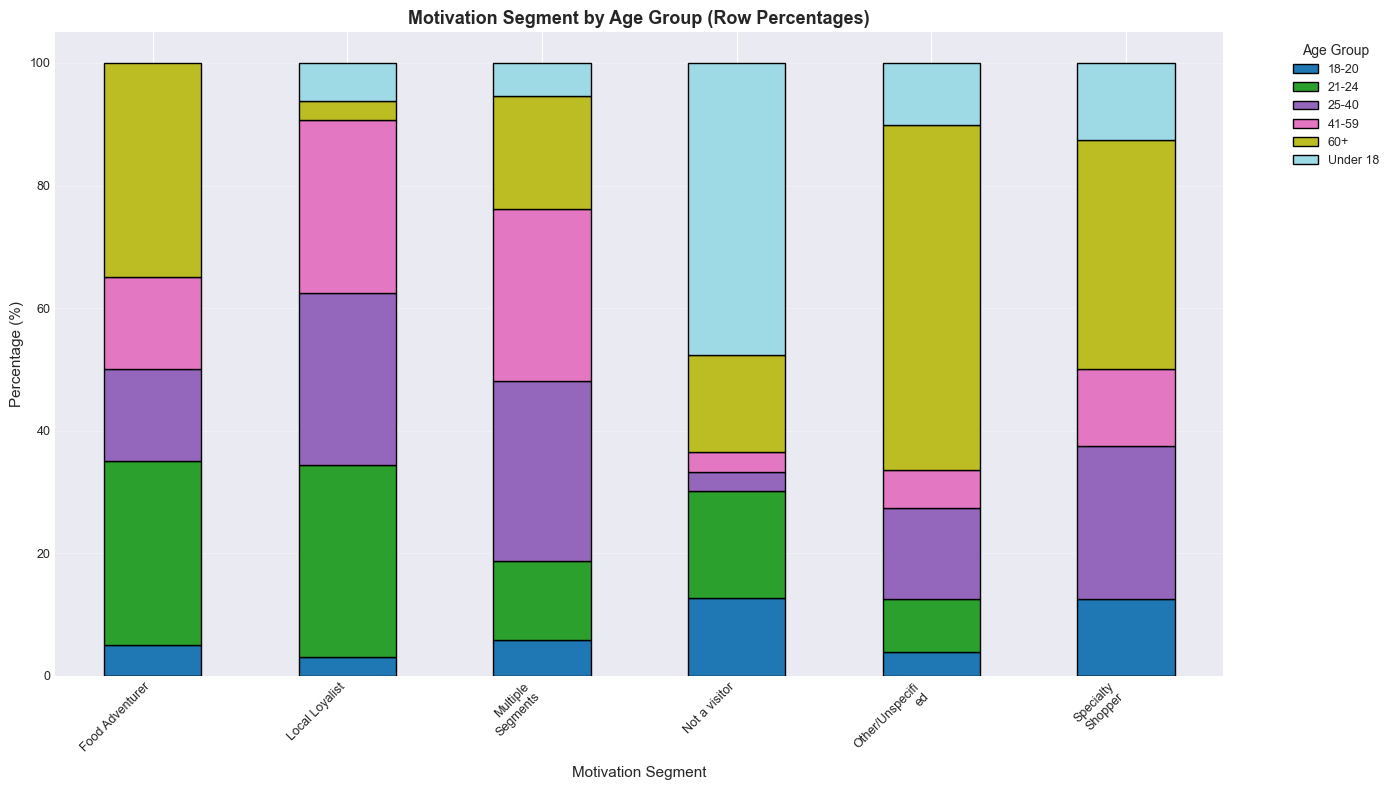


CROSS-TABULATION: Motivation Segment × Income Segment
Income_Segment      $100,000-$149,999  $150,000-$199,999  $200,000-$249,999  \
Motivation_Segment                                                            
Food Adventurer                     0                  2                  0   
Local Loyalist                      2                  0                  4   
Multiple Segments                  66                 48                 27   
Not a visitor                       3                  2                  1   
Other/Unspecified                   1                  2                  0   
Specialty Shopper                   1                  0                  0   
All                                73                 54                 32   

Income_Segment      $25,000-$49,999  $250,000+  $50,000-$99,999  \
Motivation_Segment                                                
Food Adventurer                   1          2                4   
Local Loyalist                  

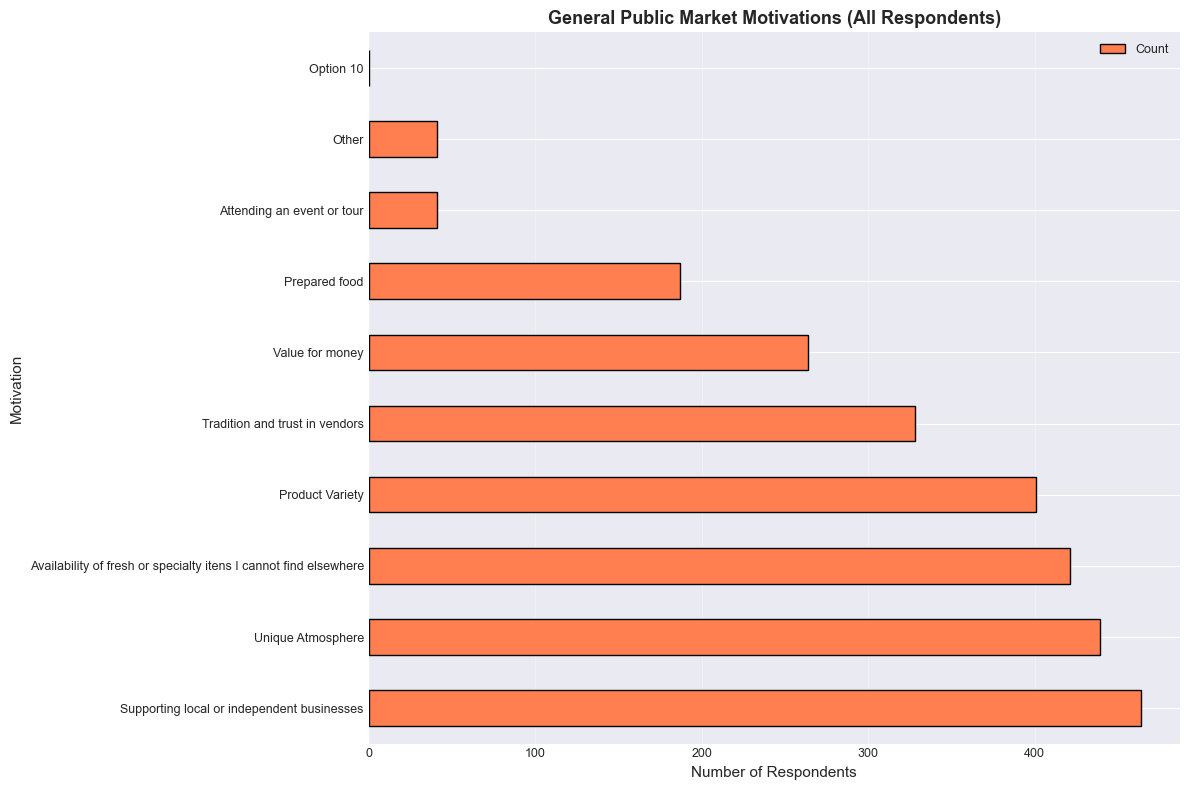

In [41]:
# D. MOTIVATION-BASED SEGMENTATION

print("="*80)
print("SECTION D: MOTIVATION-BASED SEGMENTATION")
print("="*80)

# Q18: What brings you to the West Side Market? (for visitors)
# Q16: What makes you want to shop at a public market? (general)

# Analyze Q18 for visitors
if 'visitors' in locals() and len(visitors) > 0:
    print("\n" + "-"*80)
    print("MOTIVATIONS FOR VISITING WEST SIDE MARKET (Q18)")
    print("-"*80)
    
    # Q18 is a multi-select question - check which columns exist
    q18_cols = [col for col in df.columns if col.startswith('Q18_') and col != 'Q18_9_TEXT']
    
    if q18_cols:
        motivation_counts = {}
        for col in q18_cols:
            # Extract the number from column name
            num = col.replace('Q18_', '')
            if num.isdigit():
                motivation_name = q15_18_key.get(int(num), f"Option {num}")
                # Use == 1 for indicator columns (parsed from multi-select)
                motivation_counts[motivation_name] = (visitors[col] == 1).sum() if col in visitors.columns else 0
        
        if motivation_counts:
            motivation_df = pd.DataFrame(list(motivation_counts.items()), 
                                        columns=['Motivation', 'Count'])
            motivation_df = motivation_df.sort_values('Count', ascending=False)
            motivation_df['Percentage'] = (motivation_df['Count'] / len(visitors) * 100).round(1)
            
            print("\nMotivations for visiting West Side Market:")
            print(motivation_df.to_string(index=False))
            
            fig, ax = plt.subplots(figsize=(12, 8))
            motivation_df.plot(x='Motivation', y='Count', kind='barh', ax=ax, 
                              color='steelblue', edgecolor='black')
            ax.set_title('Motivations for Visiting West Side Market', fontsize=13, fontweight='bold')
            ax.set_xlabel('Number of Visitors', fontsize=11)
            ax.set_ylabel('Motivation', fontsize=11)
            ax.grid(axis='x', alpha=0.3)
            plt.tight_layout()
            plt.show()

# Create motivation-based segments
print("\n" + "-"*80)
print("MOTIVATION-BASED SEGMENT CREATION")
print("-"*80)

def assign_motivation_segment(row):
    """Assign motivation segment based on Q18 responses"""
    if pd.isna(row.get('Q3')) or row['Q3'] != 1:
        return 'Not a visitor'
    
    segments = []
    
    # Food Adventurers / Experience Seekers
    if (row.get('Q18_6', 0) == 1 or  # Unique Atmosphere
        row.get('Q18_7', 0) == 1 or  # Prepared food
        row.get('Q18_8', 0) == 1):   # Attending an event or tour
        segments.append('Food Adventurer')
    
    # Value Seekers
    if row.get('Q18_3', 0) == 1:  # Value for money
        segments.append('Value Seeker')
    
    # Local Loyalists
    if (row.get('Q18_2', 0) == 1 or  # Tradition and trust in vendors
        row.get('Q18_5', 0) == 1):   # Supporting local or independent businesses
        segments.append('Local Loyalist')
    
    # Specialty Shoppers
    if row.get('Q18_4', 0) == 1:  # Availability of fresh or specialty items
        segments.append('Specialty Shopper')
    
    # Convenience Shoppers (inferred from other behaviors)
    if row.get('Q22_8', 0) in [2, 3]:  # High interest in meal/grocery delivery
        segments.append('Convenience Shopper')
    
    if not segments:
        return 'Other/Unspecified'
    elif len(segments) == 1:
        return segments[0]
    else:
        return 'Multiple Segments'

df['Motivation_Segment'] = df.apply(assign_motivation_segment, axis=1)

# Analyze segments
motivation_seg_counts = df['Motivation_Segment'].value_counts()
print("\nMotivation Segment Distribution:")
print(motivation_seg_counts)
print("\nPercentages:")
print((motivation_seg_counts / len(df) * 100).round(1))

fig, ax = plt.subplots(figsize=(12, 6))
motivation_seg_counts.plot(kind='bar', ax=ax, color='mediumseagreen', edgecolor='black')
ax.set_title('Motivation-Based Segment Distribution', fontsize=13, fontweight='bold')
ax.set_xlabel('Motivation Segment', fontsize=11)
ax.set_ylabel('Number of Respondents', fontsize=11)
ax.set_xticklabels(wrap_labels(motivation_seg_counts.index, width=15), rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Cross-tabulation: Motivation × Demographics
print("\n" + "="*80)
print("CROSS-TABULATION: Motivation Segment × Age Group")
print("="*80)
if 'Age_Group' in df.columns:
    crosstab_mot_age = pd.crosstab(df['Motivation_Segment'], df['Age_Group'], margins=True)
    print(crosstab_mot_age)
    
    # Visualize
    crosstab_mot_age_pct = pd.crosstab(df['Motivation_Segment'], df['Age_Group'], normalize='index') * 100
    fig, ax = plt.subplots(figsize=(14, 8))
    crosstab_mot_age_pct.plot(kind='bar', ax=ax, stacked=True, colormap='tab20', edgecolor='black')
    ax.set_title('Motivation Segment by Age Group (Row Percentages)', fontsize=13, fontweight='bold')
    ax.set_xlabel('Motivation Segment', fontsize=11)
    ax.set_ylabel('Percentage (%)', fontsize=11)
    ax.set_xticklabels(wrap_labels(crosstab_mot_age_pct.index, width=15), rotation=45, ha='right')
    ax.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

print("\n" + "="*80)
print("CROSS-TABULATION: Motivation Segment × Income Segment")
print("="*80)
if 'Income_Segment' in df.columns:
    crosstab_mot_income = pd.crosstab(df['Motivation_Segment'], df['Income_Segment'], margins=True)
    print(crosstab_mot_income)
    
    # Focus on Value Seekers vs others
    value_seekers = df[df['Motivation_Segment'] == 'Value Seeker']
    if len(value_seekers) > 0:
        print("\n" + "-"*80)
        print("VALUE SEEKERS: Income Distribution")
        print("-"*80)
        value_income = value_seekers['Income_Segment'].value_counts()
        print(value_income)
        print("\nPercentages:")
        print((value_income / len(value_seekers) * 100).round(1))

# Analyze Q16 for general public market motivations
print("\n" + "="*80)
print("GENERAL PUBLIC MARKET MOTIVATIONS (Q16)")
print("="*80)
q16_cols = [col for col in df.columns if col.startswith('Q16_') and col != 'Q16_9_TEXT']

if q16_cols:
    q16_counts = {}
    for col in q16_cols:
        num = col.replace('Q16_', '')
        if num.isdigit():
            motivation_name = q15_18_key.get(int(num), f"Option {num}")
            # Use == 1 for indicator columns (parsed from multi-select)
            q16_counts[motivation_name] = (df[col] == 1).sum() if col in df.columns else 0
    
    if q16_counts:
        q16_df = pd.DataFrame(list(q16_counts.items()), columns=['Motivation', 'Count'])
        q16_df = q16_df.sort_values('Count', ascending=False)
        q16_df['Percentage'] = (q16_df['Count'] / len(df) * 100).round(1)
        
        print("\nWhat makes people want to shop at a public market:")
        print(q16_df.to_string(index=False))
        
        fig, ax = plt.subplots(figsize=(12, 8))
        q16_df.plot(x='Motivation', y='Count', kind='barh', ax=ax, 
                   color='coral', edgecolor='black')
        ax.set_title('General Public Market Motivations (All Respondents)', 
                    fontsize=13, fontweight='bold')
        ax.set_xlabel('Number of Respondents', fontsize=11)
        ax.set_ylabel('Motivation', fontsize=11)
        ax.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()


# C. Behavioral Segments (Visitors Only)

**Visit Frequency**
- Weekly or more
- Monthly
- A few times a year
- Once a year or less
- Lapsed visitors (last visit >1 year ago)

**Spending Levels**
- Less than $20 per visit
- $20–50 per visit
- $50–100 per visit
- More than $100 per visit

**Shopping Style**
- Explorers (browse many stalls)
- Loyalists (go directly to specific vendors)
- Hybrids (both)

**Travel Mode**
- Driving
- Public transit
- Walking
- Shuttle/tours
- Bike/scooter

**Time Since Last Visit**
- Within last week
- Within last month
- Within last year
- More than a year ago


SECTION E: BARRIER-BASED SEGMENTATION

Barriers to visiting West Side Market more often:
                                                     Barrier  Count  Percentage
                                   I don't live in Cleveland    147        21.5
                          Market hours don't fit my schedule    139        20.3
                          Market feels too crowded or hectic    137        20.0
I don't always know what's available at the West Side Market    115        16.8
                                                       Other    106        15.5
                                            Too hard to park    105        15.4
                                   Not enough seating option     86        12.6
                                         Prices are too high     71        10.4
                                       Inconvenient location     59         8.6
                        Prefer supermarkets or other markets     58         8.5
                               

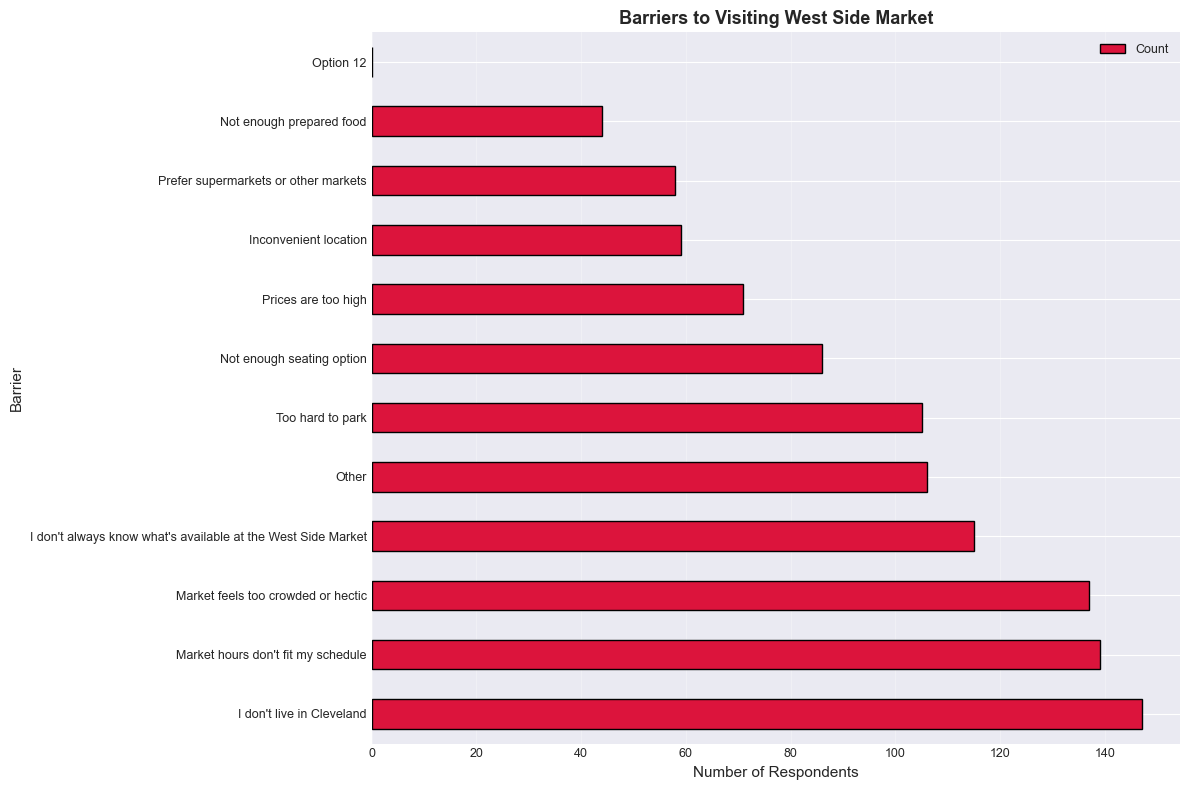


--------------------------------------------------------------------------------
BARRIER-BASED SEGMENT CREATION
--------------------------------------------------------------------------------

Barrier Segment Distribution:
Barrier_Segment
Multiple Barriers            203
Logistical                   180
No Barriers/Not Specified    155
Experience                   125
Economic                      11
Preference                    10
Name: count, dtype: int64

Percentages:
Barrier_Segment
Multiple Barriers            29.7
Logistical                   26.3
No Barriers/Not Specified    22.7
Experience                   18.3
Economic                      1.6
Preference                    1.5
Name: count, dtype: float64


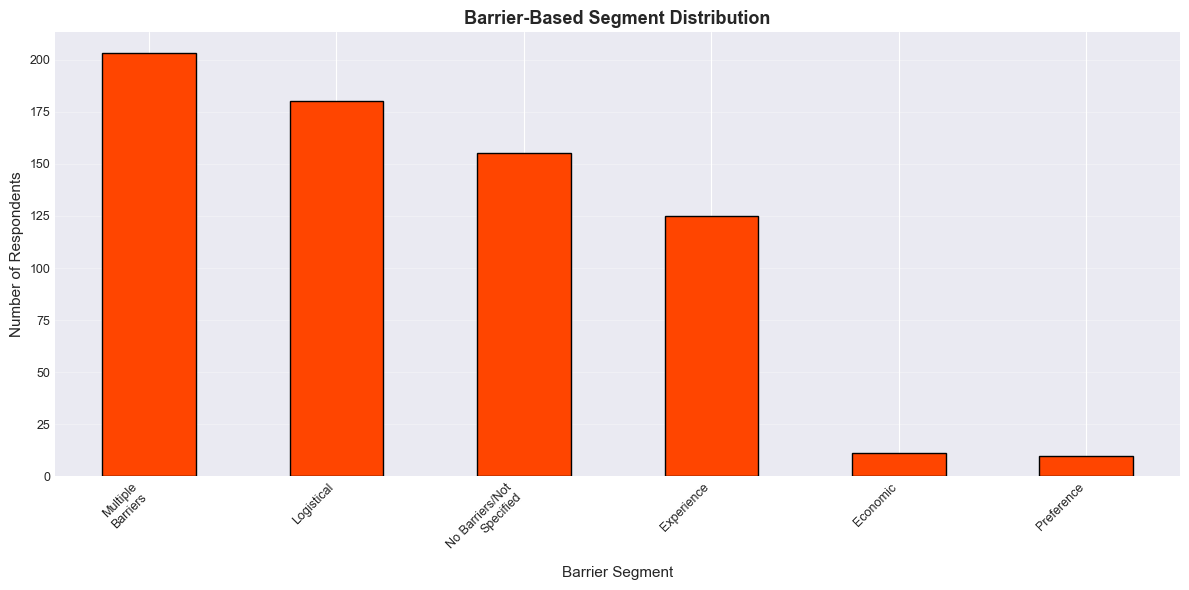


BARRIERS BY AWARENESS LEVEL

'Never heard of it' segment (n=16):
                                                     Barrier  Count
                                            Too hard to park      0
                                   I don't live in Cleveland      0
                          Market hours don't fit my schedule      0
                                         Prices are too high      0
                                       Inconvenient location      0
I don't always know what's available at the West Side Market      0
                        Prefer supermarkets or other markets      0
                                    Not enough prepared food      0
                                   Not enough seating option      0
                          Market feels too crowded or hectic      0
                                                       Other      0
                                                   Option 12      0

'Heard of it but never been' segment (n=47):
    

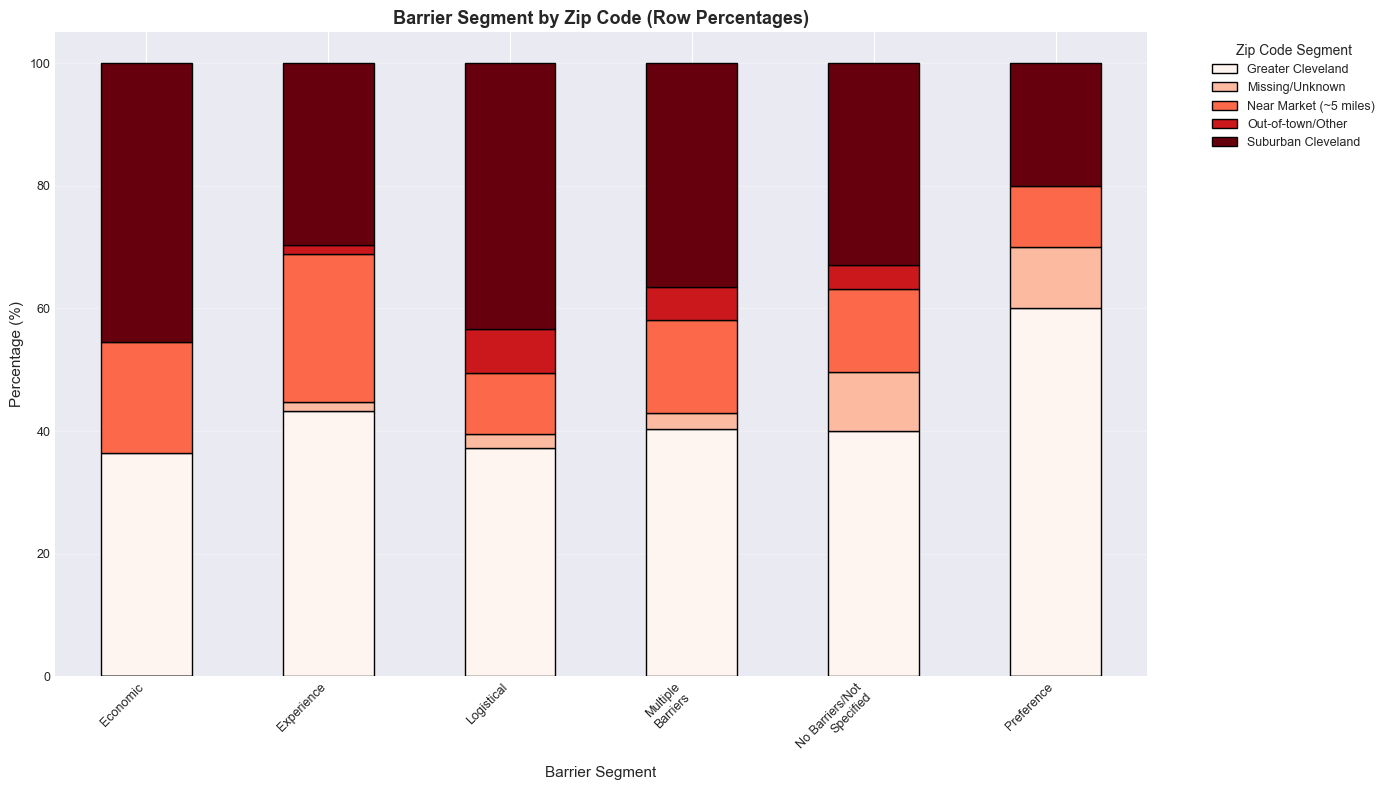


CROSS-TABULATION: Barrier Segment × Income Segment
Income_Segment             $100,000-$149,999  $150,000-$199,999  \
Barrier_Segment                                                   
Economic                                   0                  1   
Experience                                17                 12   
Logistical                                24                 19   
Multiple Barriers                         30                 21   
No Barriers/Not Specified                  2                  0   
Preference                                 0                  1   
All                                       73                 54   

Income_Segment             $200,000-$249,999  $25,000-$49,999  $250,000+  \
Barrier_Segment                                                            
Economic                                   0                0          0   
Experience                                10               12          5   
Logistical                              

In [42]:
# E. BARRIER-BASED SEGMENTATION

print("="*80)
print("SECTION E: BARRIER-BASED SEGMENTATION")
print("="*80)

# Q19: What are the reasons you do not visit the West Side Market more often or at all?

# Analyze Q19 barriers
q19_cols = [col for col in df.columns if col.startswith('Q19_') and col != 'Q19_10_TEXT']

if q19_cols:
    barrier_counts = {}
    for col in q19_cols:
        num = col.replace('Q19_', '')
        if num.isdigit():
            barrier_name = q19_key.get(int(num), f"Option {num}")
            # Use == 1 for indicator columns (parsed from multi-select)
            barrier_counts[barrier_name] = (df[col] == 1).sum() if col in df.columns else 0
    
    if barrier_counts:
        barrier_df = pd.DataFrame(list(barrier_counts.items()), 
                                  columns=['Barrier', 'Count'])
        barrier_df = barrier_df.sort_values('Count', ascending=False)
        barrier_df['Percentage'] = (barrier_df['Count'] / len(df) * 100).round(1)
        
        print("\nBarriers to visiting West Side Market more often:")
        print(barrier_df.to_string(index=False))
        
        fig, ax = plt.subplots(figsize=(12, 8))
        barrier_df.plot(x='Barrier', y='Count', kind='barh', ax=ax, 
                       color='crimson', edgecolor='black')
        ax.set_title('Barriers to Visiting West Side Market', fontsize=13, fontweight='bold')
        ax.set_xlabel('Number of Respondents', fontsize=11)
        ax.set_ylabel('Barrier', fontsize=11)
        ax.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()

# Create barrier-based segments
print("\n" + "-"*80)
print("BARRIER-BASED SEGMENT CREATION")
print("-"*80)

def assign_barrier_segment(row):
    """Assign barrier segment based on Q19 responses"""
    segments = []
    
    # Logistical Barriers
    if (row.get('Q19_1', 0) == 1 or  # Too hard to park
        row.get('Q19_3', 0) == 1 or  # Market hours don't fit schedule
        row.get('Q19_5', 0) == 1 or  # Inconvenient location
        row.get('Q19_2', 0) == 1):   # I don't live in Cleveland
        segments.append('Logistical')
    
    # Experience Barriers
    if (row.get('Q19_10', 0) == 1 or  # Market feels too crowded/hectic
        row.get('Q19_9', 0) == 1 or   # Not enough seating option
        row.get('Q19_8', 0) == 1 or   # Not enough prepared food
        row.get('Q19_6', 0) == 1):    # I don't always know what's available
        segments.append('Experience')
    
    # Economic Barriers
    if row.get('Q19_4', 0) == 1:  # Prices are too high
        segments.append('Economic')
    
    # Preference Barriers
    if row.get('Q19_7', 0) == 1:  # Prefer supermarkets or other markets
        segments.append('Preference')
    
    if not segments:
        return 'No Barriers/Not Specified'
    elif len(segments) == 1:
        return segments[0]
    else:
        return 'Multiple Barriers'

df['Barrier_Segment'] = df.apply(assign_barrier_segment, axis=1)

# Analyze segments
barrier_seg_counts = df['Barrier_Segment'].value_counts()
print("\nBarrier Segment Distribution:")
print(barrier_seg_counts)
print("\nPercentages:")
print((barrier_seg_counts / len(df) * 100).round(1))

fig, ax = plt.subplots(figsize=(12, 6))
barrier_seg_counts.plot(kind='bar', ax=ax, color='orangered', edgecolor='black')
ax.set_title('Barrier-Based Segment Distribution', fontsize=13, fontweight='bold')
ax.set_xlabel('Barrier Segment', fontsize=11)
ax.set_ylabel('Number of Respondents', fontsize=11)
ax.set_xticklabels(wrap_labels(barrier_seg_counts.index, width=15), rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Analyze barriers by awareness level
print("\n" + "="*80)
print("BARRIERS BY AWARENESS LEVEL")
print("="*80)
if 'Awareness_Segment' in df.columns:
    # For "Never heard" segment
    never_heard = df[df['Q3'] == 3]
    print(f"\n'Never heard of it' segment (n={len(never_heard)}):")
    if len(never_heard) > 0 and q19_cols:
        never_heard_barriers = {}
        for col in q19_cols:
            num = col.replace('Q19_', '')
            if num.isdigit():
                barrier_name = q19_key.get(int(num), f"Option {num}")
                # Use == 1 for indicator columns (parsed from multi-select)
                never_heard_barriers[barrier_name] = (never_heard[col] == 1).sum() if col in never_heard.columns else 0
        if never_heard_barriers:
            nhb_df = pd.DataFrame(list(never_heard_barriers.items()), 
                                  columns=['Barrier', 'Count'])
            nhb_df = nhb_df.sort_values('Count', ascending=False)
            print(nhb_df.to_string(index=False))
    
    # For "Heard but never been" segment
    heard_not_been = df[df['Q3'] == 2]
    print(f"\n'Heard of it but never been' segment (n={len(heard_not_been)}):")
    if len(heard_not_been) > 0 and q19_cols:
        hnb_barriers = {}
        for col in q19_cols:
            num = col.replace('Q19_', '')
            if num.isdigit():
                barrier_name = q19_key.get(int(num), f"Option {num}")
                # Use == 1 for indicator columns (parsed from multi-select)
                hnb_barriers[barrier_name] = (heard_not_been[col] == 1).sum() if col in heard_not_been.columns else 0
        if hnb_barriers:
            hnb_df = pd.DataFrame(list(hnb_barriers.items()), 
                                 columns=['Barrier', 'Count'])
            hnb_df = hnb_df.sort_values('Count', ascending=False)
            print(hnb_df.to_string(index=False))

# Cross-tabulation: Barriers × Demographics
print("\n" + "="*80)
print("CROSS-TABULATION: Barrier Segment × Zip Code Segment")
print("="*80)
if 'Zip_Segment' in df.columns:
    crosstab_barrier_zip = pd.crosstab(df['Barrier_Segment'], df['Zip_Segment'], margins=True)
    print(crosstab_barrier_zip)
    
    # Visualize
    crosstab_barrier_zip_pct = pd.crosstab(df['Barrier_Segment'], df['Zip_Segment'], normalize='index') * 100
    fig, ax = plt.subplots(figsize=(14, 8))
    crosstab_barrier_zip_pct.plot(kind='bar', ax=ax, stacked=True, colormap='Reds', edgecolor='black')
    ax.set_title('Barrier Segment by Zip Code (Row Percentages)', fontsize=13, fontweight='bold')
    ax.set_xlabel('Barrier Segment', fontsize=11)
    ax.set_ylabel('Percentage (%)', fontsize=11)
    ax.set_xticklabels(wrap_labels(crosstab_barrier_zip_pct.index, width=15), rotation=45, ha='right')
    ax.legend(title='Zip Code Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

print("\n" + "="*80)
print("CROSS-TABULATION: Barrier Segment × Income Segment")
print("="*80)
if 'Income_Segment' in df.columns:
    crosstab_barrier_income = pd.crosstab(df['Barrier_Segment'], df['Income_Segment'], margins=True)
    print(crosstab_barrier_income)
    
    # Focus on Economic Barriers
    economic_barriers = df[df['Barrier_Segment'] == 'Economic']
    if len(economic_barriers) > 0:
        print("\n" + "-"*80)
        print("ECONOMIC BARRIERS: Income Distribution")
        print("-"*80)
        econ_income = economic_barriers['Income_Segment'].value_counts()
        print(econ_income)
        print("\nPercentages:")
        print((econ_income / len(economic_barriers) * 100).round(1))


SECTION F: DESIRED EXPERIENCES SEGMENTATION

Interest Levels by Experience:
                       Experience  High Interest (3)  Medium Interest (2)  Low Interest (1)  Total Responses  High Interest %
          Seasonal food festivals                294                  195                52              541             54.3
            Cultural celebrations                206                  223               110              539             38.2
          Loyalty/Rewards Program                161                  193               186              540             29.8
              Evening happy hours                159                  184               197              540             29.4
Cooking/Nutrition classes & demos                124                  215               201              540             23.0
                       Live Music                109                  210               223              542             20.1
    Meal/grocery delivery service         

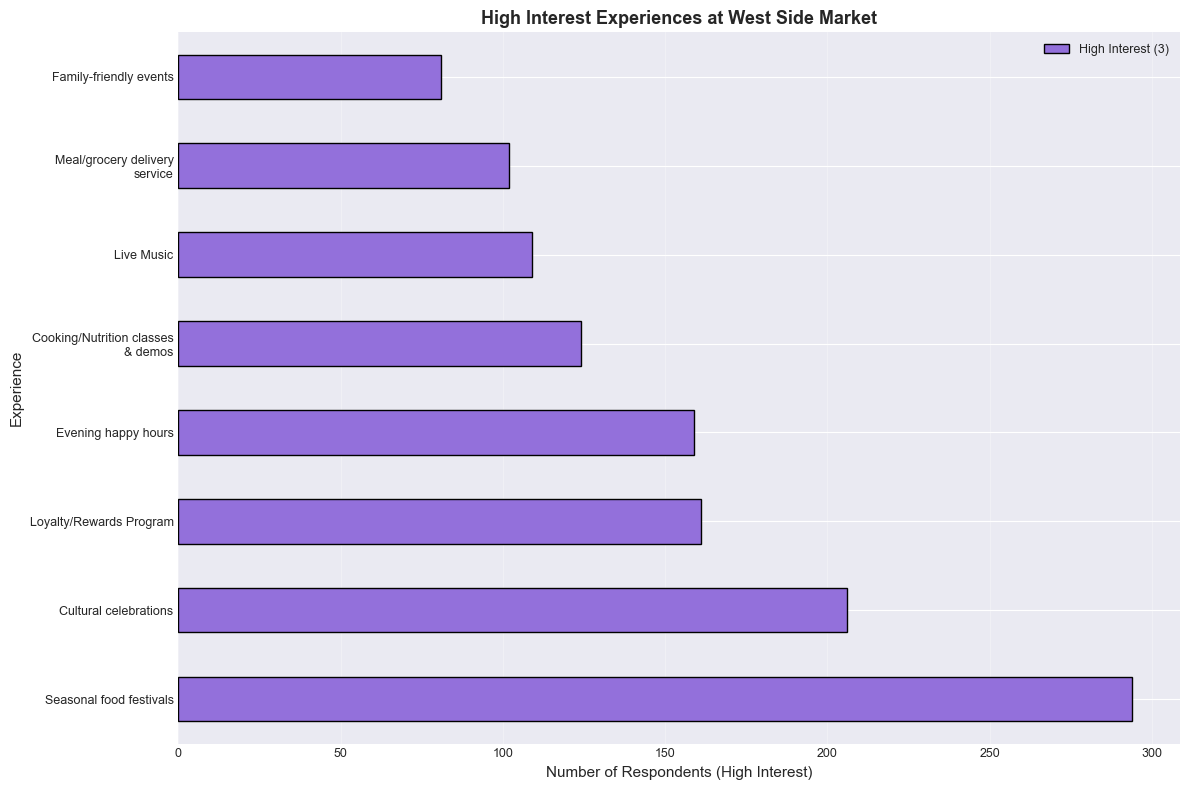

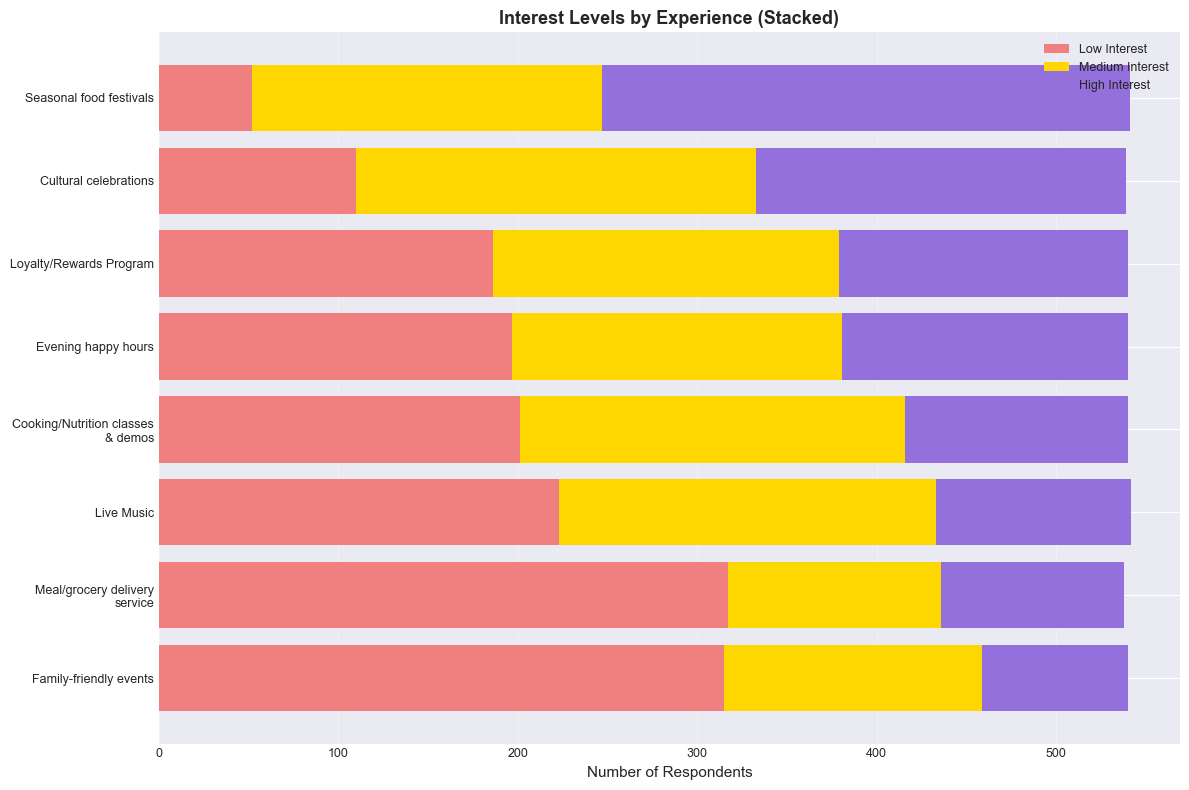


--------------------------------------------------------------------------------
DESIRED EXPERIENCES SEGMENT CREATION
--------------------------------------------------------------------------------

Experience Segment Distribution:
Experience_Segment
Low Interest/Unspecified    684
Name: count, dtype: int64

Percentages:
Experience_Segment
Low Interest/Unspecified    100.0
Name: count, dtype: float64


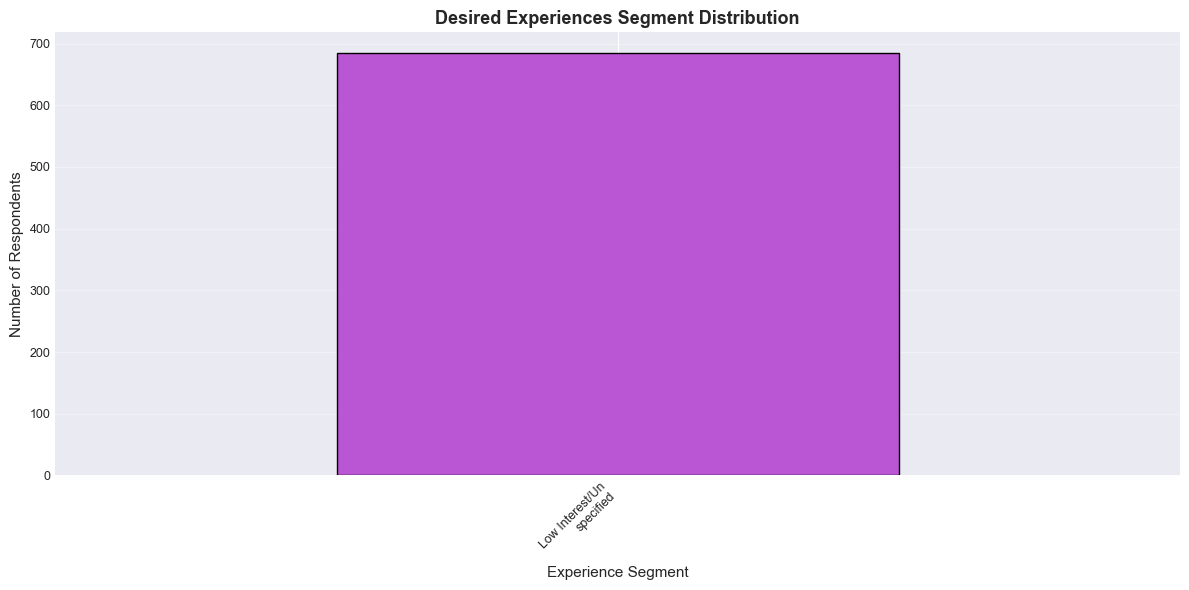


CROSS-TABULATION: Experience Segment × Household Size
Household_Size             1    2   3    4   5   6  7+  Missing/Unknown  \
Experience_Segment                                                        
Low Interest/Unspecified  92  158  64  104  45  13   9              180   
All                       92  158  64  104  45  13   9              180   

Household_Size            Prefer not to say  All  
Experience_Segment                                
Low Interest/Unspecified                 19  684  
All                                      19  684  


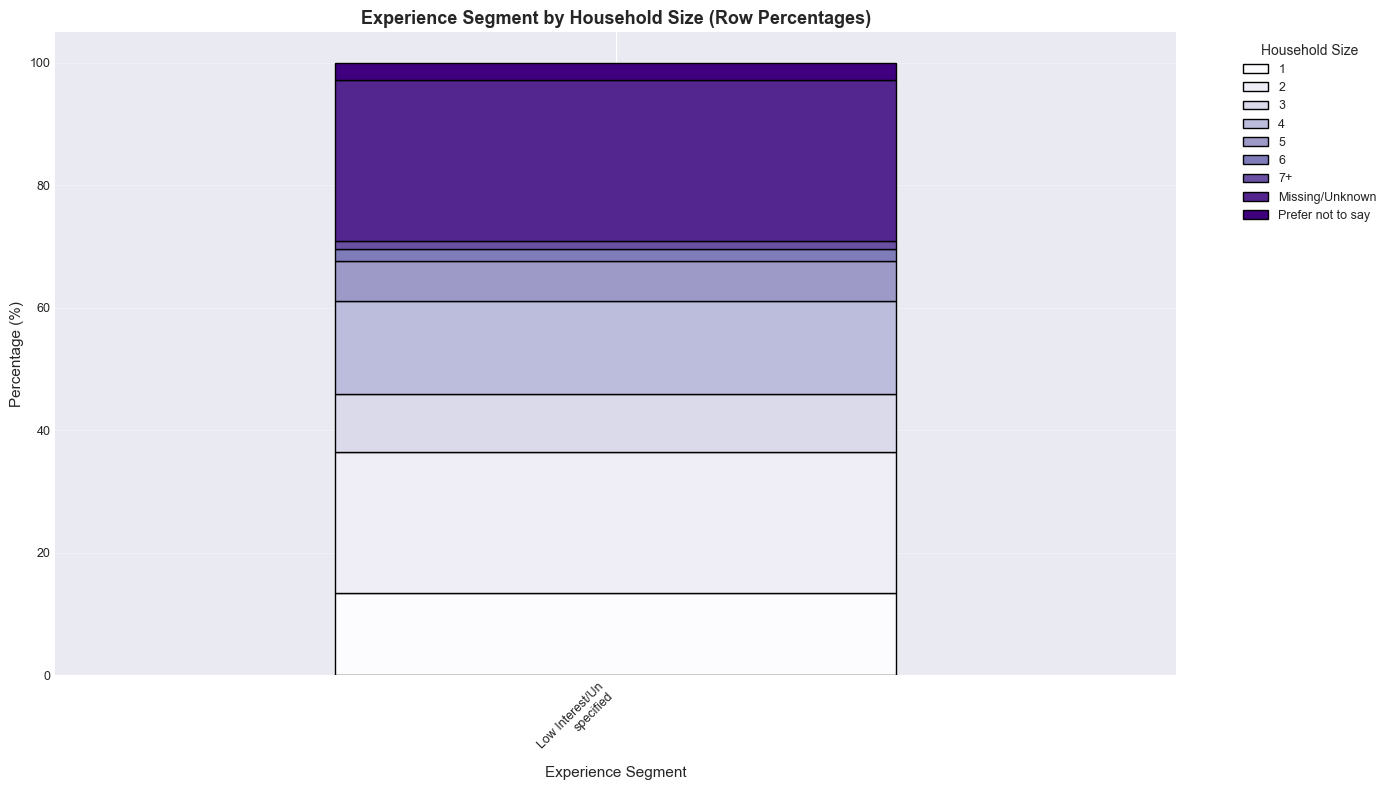


EVENT-DRIVEN SEGMENT: Specific Event Interests


In [43]:
# F. DESIRED EXPERIENCES SEGMENTATION

print("="*80)
print("SECTION F: DESIRED EXPERIENCES SEGMENTATION")
print("="*80)

# Q22: How interested would you be in the following at the West Side Market?

# Analyze Q22 interest levels
q22_cols = [col for col in df.columns if col.startswith('Q22_')]

if q22_cols:
    # Calculate interest levels for each experience
    experience_data = []
    for col in q22_cols:
        if col in df.columns:
            # Extract experience name from column
            exp_name = col.replace('Q22_', '')
            # Get interest distribution
            interest_dist = df[col].value_counts().sort_index()
            # Calculate high interest (value 3)
            high_interest = (df[col] == 3).sum()
            medium_interest = (df[col] == 2).sum()
            low_interest = (df[col] == 1).sum()
            total_responses = df[col].notna().sum()
            
            experience_data.append({
                'Experience': exp_name,
                'High Interest (3)': high_interest,
                'Medium Interest (2)': medium_interest,
                'Low Interest (1)': low_interest,
                'Total Responses': total_responses,
                'High Interest %': (high_interest / total_responses * 100).round(1) if total_responses > 0 else 0
            })
    
    exp_df = pd.DataFrame(experience_data)
    exp_df = exp_df.sort_values('High Interest (3)', ascending=False)
    
    print("\nInterest Levels by Experience:")
    print(exp_df.to_string(index=False))
    
    # Visualize high interest experiences
    fig, ax = plt.subplots(figsize=(12, 8))
    exp_df.plot(x='Experience', y='High Interest (3)', kind='barh', ax=ax, 
               color='mediumpurple', edgecolor='black')
    ax.set_title('High Interest Experiences at West Side Market', fontsize=13, fontweight='bold')
    ax.set_xlabel('Number of Respondents (High Interest)', fontsize=11)
    ax.set_ylabel('Experience', fontsize=11)
    ax.set_yticklabels(wrap_labels(exp_df['Experience'], width=25))
    ax.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Stacked bar chart showing all interest levels
    fig, ax = plt.subplots(figsize=(12, 8))
    exp_df_sorted = exp_df.sort_values('High Interest (3)', ascending=True)
    x_pos = range(len(exp_df_sorted))
    ax.barh(x_pos, exp_df_sorted['Low Interest (1)'], label='Low Interest', color='lightcoral')
    ax.barh(x_pos, exp_df_sorted['Medium Interest (2)'], left=exp_df_sorted['Low Interest (1)'], 
           label='Medium Interest', color='gold')
    ax.barh(x_pos, exp_df_sorted['High Interest (3)'], 
           left=exp_df_sorted['Low Interest (1)'] + exp_df_sorted['Medium Interest (2)'],
           label='High Interest', color='mediumpurple')
    ax.set_yticks(x_pos)
    ax.set_yticklabels(wrap_labels(exp_df_sorted['Experience'], width=25))
    ax.set_xlabel('Number of Respondents', fontsize=11)
    ax.set_title('Interest Levels by Experience (Stacked)', fontsize=13, fontweight='bold')
    ax.legend()
    ax.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Create desired experiences segments
print("\n" + "-"*80)
print("DESIRED EXPERIENCES SEGMENT CREATION")
print("-"*80)

def assign_experience_segment(row):
    """Assign experience segment based on Q22 responses"""
    segments = []
    
    # Event-Driven Shoppers (High interest in events)
    if (row.get('Q22_1', 0) in [2, 3] or  # Live Music
        row.get('Q22_2', 0) in [2, 3] or  # Seasonal food festivals
        row.get('Q22_6', 0) in [2, 3] or  # Cultural celebrations
        row.get('Q22_5', 0) in [2, 3]):   # Evening happy hours
        segments.append('Event-Driven')
    
    # Education-Focused (High interest in classes/demos)
    if (row.get('Q22_3', 0) in [2, 3] or  # Cooking/Nutrition classes
        row.get('Q22_4', 0) in [2, 3]):   # Family-friendly events
        segments.append('Education-Focused')
    
    # Loyalty-Driven Consumers
    if row.get('Q22_7', 0) in [2, 3]:  # Loyalty/Rewards Program
        segments.append('Loyalty-Driven')
    
    # Convenience-Oriented
    if row.get('Q22_8', 0) in [2, 3]:  # Meal/grocery delivery service
        segments.append('Convenience-Oriented')
    
    if not segments:
        return 'Low Interest/Unspecified'
    elif len(segments) == 1:
        return segments[0]
    else:
        return 'Multiple Interests'

df['Experience_Segment'] = df.apply(assign_experience_segment, axis=1)

# Analyze segments
exp_seg_counts = df['Experience_Segment'].value_counts()
print("\nExperience Segment Distribution:")
print(exp_seg_counts)
print("\nPercentages:")
print((exp_seg_counts / len(df) * 100).round(1))

fig, ax = plt.subplots(figsize=(12, 6))
exp_seg_counts.plot(kind='bar', ax=ax, color='mediumorchid', edgecolor='black')
ax.set_title('Desired Experiences Segment Distribution', fontsize=13, fontweight='bold')
ax.set_xlabel('Experience Segment', fontsize=11)
ax.set_ylabel('Number of Respondents', fontsize=11)
ax.set_xticklabels(wrap_labels(exp_seg_counts.index, width=15), rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Cross-tabulation: Experience × Demographics
print("\n" + "="*80)
print("CROSS-TABULATION: Experience Segment × Household Size")
print("="*80)
if 'Household_Size' in df.columns:
    crosstab_exp_hh = pd.crosstab(df['Experience_Segment'], df['Household_Size'], margins=True)
    print(crosstab_exp_hh)
    
    # Visualize
    crosstab_exp_hh_pct = pd.crosstab(df['Experience_Segment'], df['Household_Size'], normalize='index') * 100
    fig, ax = plt.subplots(figsize=(14, 8))
    crosstab_exp_hh_pct.plot(kind='bar', ax=ax, stacked=True, colormap='Purples', edgecolor='black')
    ax.set_title('Experience Segment by Household Size (Row Percentages)', fontsize=13, fontweight='bold')
    ax.set_xlabel('Experience Segment', fontsize=11)
    ax.set_ylabel('Percentage (%)', fontsize=11)
    ax.set_xticklabels(wrap_labels(crosstab_exp_hh_pct.index, width=15), rotation=45, ha='right')
    ax.legend(title='Household Size', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Analyze event-driven segment interest in specific events
print("\n" + "="*80)
print("EVENT-DRIVEN SEGMENT: Specific Event Interests")
print("="*80)
event_driven = df[df['Experience_Segment'] == 'Event-Driven']
if len(event_driven) > 0:
    print(f"\nEvent-Driven segment size: {len(event_driven)}")
    event_interests = {
        'Live Music': (event_driven['Q22_1'] == 3).sum(),
        'Seasonal Festivals': (event_driven['Q22_2'] == 3).sum(),
        'Cultural Celebrations': (event_driven['Q22_6'] == 3).sum(),
        'Evening Happy Hours': (event_driven['Q22_5'] == 3).sum()
    }
    event_df = pd.DataFrame(list(event_interests.items()), columns=['Event', 'High Interest Count'])
    event_df['Percentage'] = (event_df['High Interest Count'] / len(event_driven) * 100).round(1)
    print(event_df.to_string(index=False))


# D. Motivation-Based Segments
**Food Adventurers / Experience Seekers**
- Unique atmosphere
- Festivals, live music, cultural events
- Prepared food options

**Value Seekers**
- Prices/value for money
- Deal-sensitive shoppers
- Often larger households or lower-income

**Local Loyalists**
- Tradition and trust in vendors
- Support for local businesses

**Specialty Shoppers**
- Hard-to-find ingredients
- Fresh and specialty items
- Often food hobbyists

**Convenience Shoppers**
- Want fast shopping
- Interested in meal delivery
- Prefer predictable hours and parking availability


SECTION G: GROCERY BEHAVIOR SEGMENTATION
--------------------------------------------------------------------------------
1. GROCERY DELIVERY USAGE
--------------------------------------------------------------------------------

Counts:
Delivery_Usage
Usually       38
Sometimes     92
Rarely       101
Never        287
Name: count, dtype: int64

Percentages:
Delivery_Usage
Usually       5.6
Sometimes    13.5
Rarely       14.8
Never        42.0
Name: count, dtype: float64


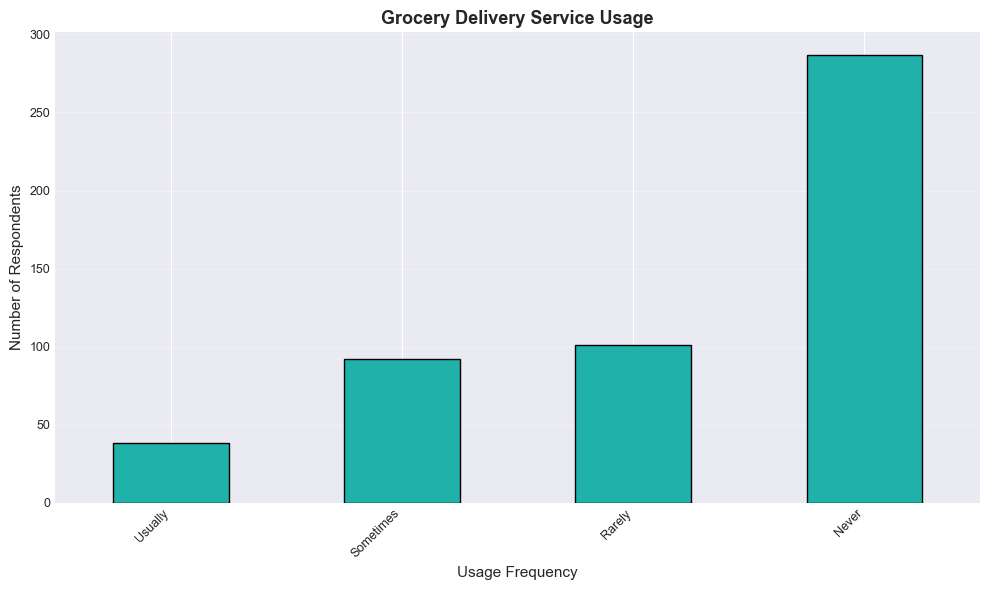


--------------------------------------------------------------------------------
2. PRIMARY GROCERY STORES
--------------------------------------------------------------------------------

Grocery Store Usage:
           Store  Count  Percentage
     Giant Eagle    507        74.1
            Aldi    505        73.8
West Side Market    503        73.5
        Heinen's    501        73.2
          Dave's    501        73.2
         Walmart    499        73.0
Farmers' markets    494        72.2
  Fairfax Market    484        70.8


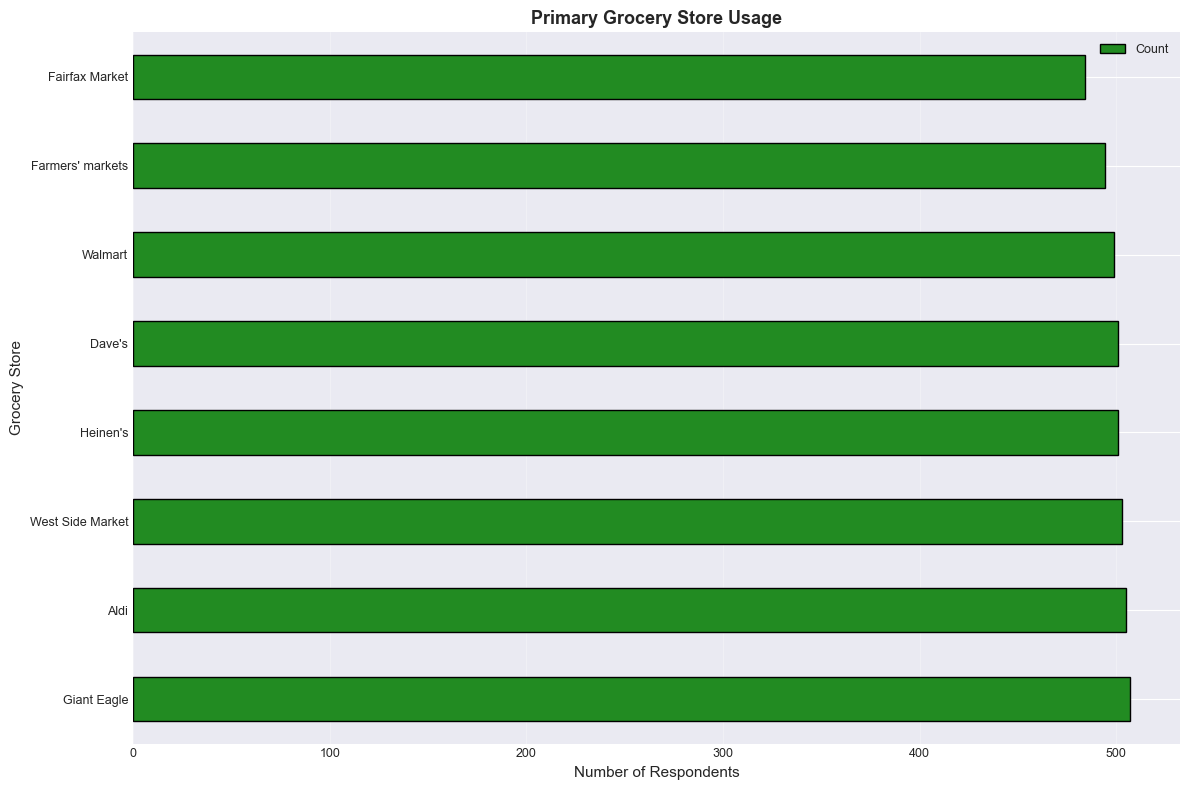


--------------------------------------------------------------------------------
3. PREPARED FOOD BEHAVIOR
--------------------------------------------------------------------------------

Prepared Food Sources:
                 Source  Count  Percentage
    Restaurants/takeout    509        74.4
Preferred grocery store    503        73.5
 Meal Delivery Services    501        73.2
       West Side Market    501        73.2
     Meal prep services    494        72.2


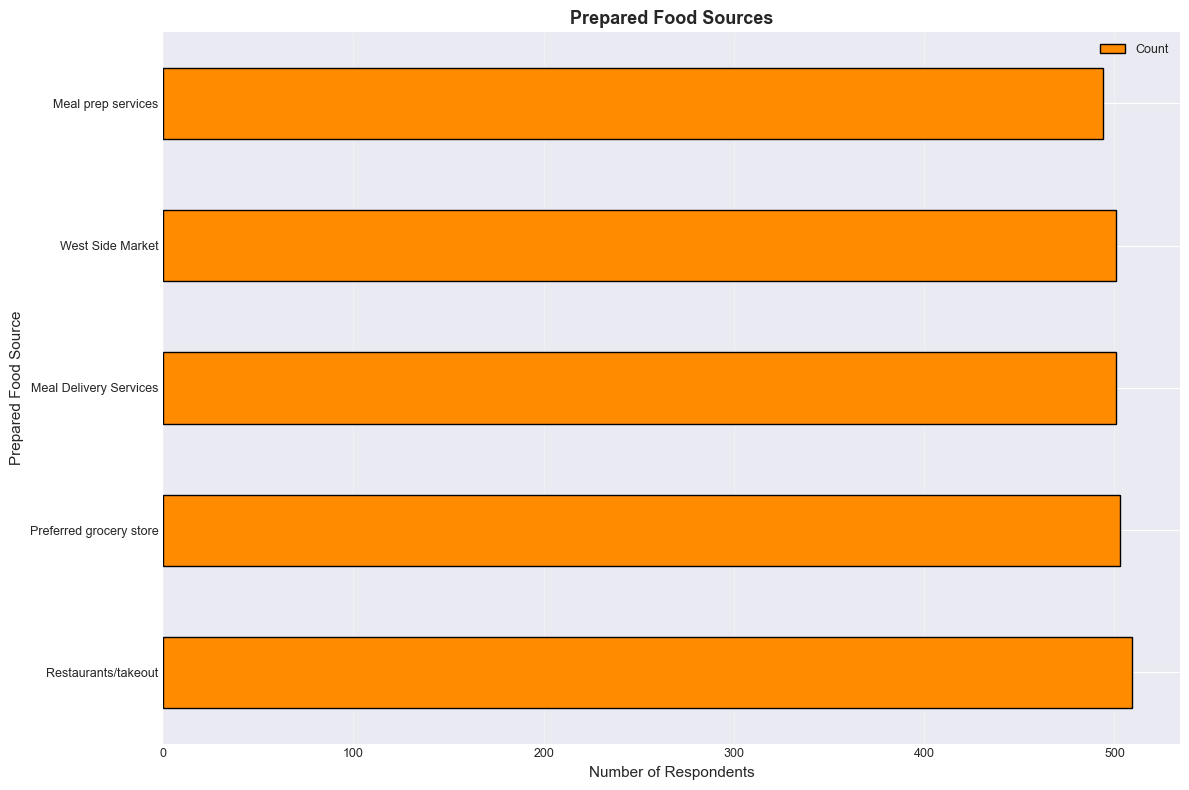


--------------------------------------------------------------------------------
GROCERY BEHAVIOR SEGMENT CREATION
--------------------------------------------------------------------------------

Primary Grocery Store Distribution:
Primary_Grocery_Store
Other/None          295
Aldi                106
Giant Eagle          88
Heinen's             69
Walmart              58
West Side Market     22
Fairfax Market       19
Dave's               15
Farmers Market       12
Name: count, dtype: int64

Percentages:
Primary_Grocery_Store
Other/None          43.1
Aldi                15.5
Giant Eagle         12.9
Heinen's            10.1
Walmart              8.5
West Side Market     3.2
Fairfax Market       2.8
Dave's               2.2
Farmers Market       1.8
Name: count, dtype: float64


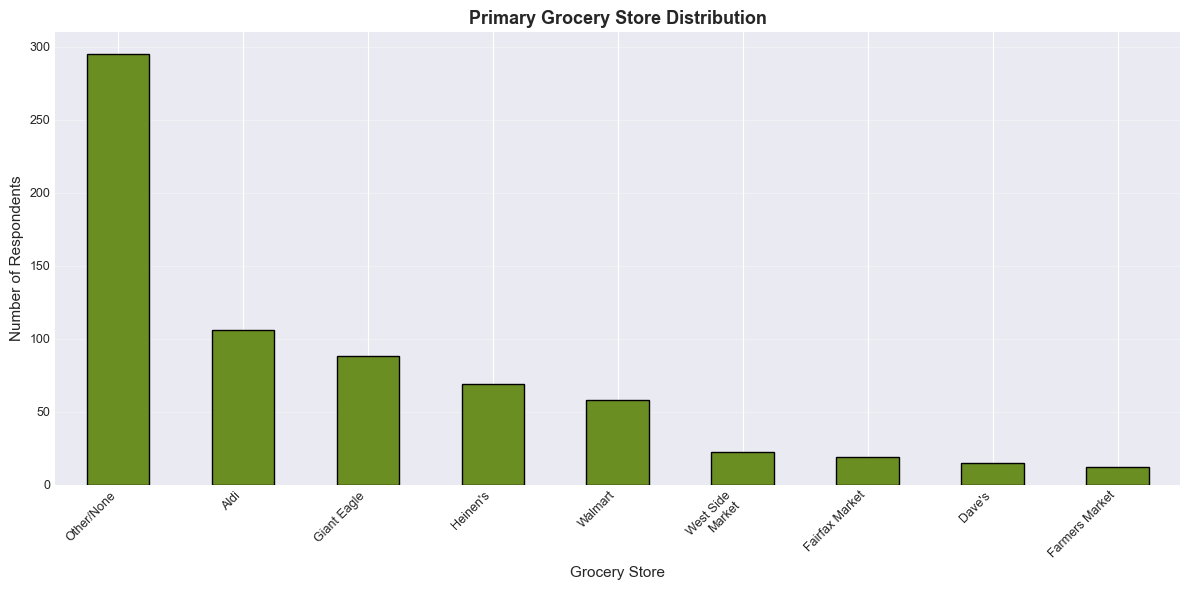


CROSS-TABULATION: Primary Grocery Store × Visit Frequency

CROSS-TABULATION: Delivery Usage × Experience Interest
Experience_Segment  Low Interest/Unspecified  All
Delivery_Usage                                   
Missing/Unknown                          166  166
Never                                    287  287
Rarely                                   101  101
Sometimes                                 92   92
Usually                                   38   38
All                                      684  684


In [44]:
# G. GROCERY BEHAVIOR SEGMENTATION

print("="*80)
print("SECTION G: GROCERY BEHAVIOR SEGMENTATION")
print("="*80)

# 1. GROCERY DELIVERY USAGE (Q29)
print("-"*80)
print("1. GROCERY DELIVERY USAGE")
print("-"*80)
df['Delivery_Usage'] = map_values(df['Q29'], q29_30_31_key)
delivery_counts = df['Delivery_Usage'].value_counts()
delivery_order = list(q29_30_31_key.values())
delivery_counts = delivery_counts.reindex([x for x in delivery_order if x in delivery_counts.index])
delivery_pct = (delivery_counts / len(df) * 100).round(1)

print("\nCounts:")
print(delivery_counts)
print("\nPercentages:")
print(delivery_pct)

fig, ax = plt.subplots(figsize=(10, 6))
delivery_counts.plot(kind='bar', ax=ax, color='lightseagreen', edgecolor='black')
ax.set_title('Grocery Delivery Service Usage', fontsize=13, fontweight='bold')
ax.set_xlabel('Usage Frequency', fontsize=11)
ax.set_ylabel('Number of Respondents', fontsize=11)
ax.set_xticklabels(wrap_labels(delivery_counts.index, width=12), rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 2. PRIMARY GROCERY STORES (Q30)
print("\n" + "-"*80)
print("2. PRIMARY GROCERY STORES")
print("-"*80)
q30_cols = [col for col in df.columns if col.startswith('Q30_')]

if q30_cols:
    store_counts = {}
    for col in q30_cols:
        store_name = col.replace('Q30_', '')
        store_counts[store_name] = df[col].notna().sum()
    
    if store_counts:
        store_df = pd.DataFrame(list(store_counts.items()), columns=['Store', 'Count'])
        store_df = store_df.sort_values('Count', ascending=False)
        store_df['Percentage'] = (store_df['Count'] / len(df) * 100).round(1)
        
        print("\nGrocery Store Usage:")
        print(store_df.to_string(index=False))
        
        fig, ax = plt.subplots(figsize=(12, 8))
        store_df.plot(x='Store', y='Count', kind='barh', ax=ax, 
                     color='forestgreen', edgecolor='black')
        ax.set_title('Primary Grocery Store Usage', fontsize=13, fontweight='bold')
        ax.set_xlabel('Number of Respondents', fontsize=11)
        ax.set_ylabel('Grocery Store', fontsize=11)
        ax.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()

# 3. PREPARED FOOD BEHAVIOR (Q31)
print("\n" + "-"*80)
print("3. PREPARED FOOD BEHAVIOR")
print("-"*80)
q31_cols = [col for col in df.columns if col.startswith('Q31_')]

if q31_cols:
    prepared_counts = {}
    for col in q31_cols:
        source_name = col.replace('Q31_', '')
        prepared_counts[source_name] = df[col].notna().sum()
    
    if prepared_counts:
        prepared_df = pd.DataFrame(list(prepared_counts.items()), 
                                  columns=['Source', 'Count'])
        prepared_df = prepared_df.sort_values('Count', ascending=False)
        prepared_df['Percentage'] = (prepared_df['Count'] / len(df) * 100).round(1)
        
        print("\nPrepared Food Sources:")
        print(prepared_df.to_string(index=False))
        
        fig, ax = plt.subplots(figsize=(12, 8))
        prepared_df.plot(x='Source', y='Count', kind='barh', ax=ax, 
                        color='darkorange', edgecolor='black')
        ax.set_title('Prepared Food Sources', fontsize=13, fontweight='bold')
        ax.set_xlabel('Number of Respondents', fontsize=11)
        ax.set_ylabel('Prepared Food Source', fontsize=11)
        ax.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()

# Create grocery behavior segments
print("\n" + "-"*80)
print("GROCERY BEHAVIOR SEGMENT CREATION")
print("-"*80)

def assign_grocery_segment(row):
    """Assign grocery behavior segment"""
    segments = []
    
    # Primary grocery store segments
    if row.get('Q30_Walmart', 0) == 1:
        segments.append('Walmart Shopper')
    if row.get('Q30_Aldi', 0) == 1:
        segments.append('Aldi Shopper')
    if row.get('Q30_Giant Eagle', 0) == 1:
        segments.append('Giant Eagle Shopper')
    if row.get('Q30_Heinen\'s', 0) == 1:
        segments.append('Heinen\'s Shopper')
    if row.get('Q30_Dave\'s', 0) == 1:
        segments.append('Dave\'s Shopper')
    if row.get('Q30_Farmers\' markets', 0) == 1:
        segments.append('Farmers Market Shopper')
    if row.get('Q30_West Side Market', 0) == 1:
        segments.append('WSM Regular')
    
    # Delivery usage segments
    if row.get('Q29', 0) == 1:  # Usually
        segments.append('Heavy Delivery User')
    elif row.get('Q29', 0) == 2:  # Sometimes
        segments.append('Moderate Delivery User')
    elif row.get('Q29', 0) == 4:  # Never
        segments.append('No Delivery User')
    
    # Prepared food segments
    if row.get('Q31_Restaurants/takeout', 0) == 1:
        segments.append('Restaurant/Takeout User')
    if row.get('Q31_Meal Delivery Services', 0) == 1:
        segments.append('Meal Delivery User')
    if row.get('Q31_West Side Market', 0) == 1:
        segments.append('WSM Prepared Food User')
    
    if not segments:
        return 'Other/Unspecified'
    elif len(segments) == 1:
        return segments[0]
    else:
        # Return primary segment (first one)
        return segments[0] if segments else 'Multiple'

# For simplicity, create primary grocery store segment
def get_primary_grocery_store(row):
    """Get primary grocery store"""
    stores = {
        'Q30_Walmart': 'Walmart',
        'Q30_Aldi': 'Aldi',
        'Q30_Giant Eagle': 'Giant Eagle',
        'Q30_Heinen\'s': 'Heinen\'s',
        'Q30_Dave\'s': 'Dave\'s',
        'Q30_Farmers\' markets': 'Farmers Market',
        'Q30_West Side Market': 'West Side Market',
        'Q30_Fairfax Market': 'Fairfax Market'
    }
    
    for col, name in stores.items():
        if row.get(col, 0) == 1:
            return name
    return 'Other/None'

df['Primary_Grocery_Store'] = df.apply(get_primary_grocery_store, axis=1)
grocery_store_counts = df['Primary_Grocery_Store'].value_counts()

print("\nPrimary Grocery Store Distribution:")
print(grocery_store_counts)
print("\nPercentages:")
print((grocery_store_counts / len(df) * 100).round(1))

fig, ax = plt.subplots(figsize=(12, 6))
grocery_store_counts.plot(kind='bar', ax=ax, color='olivedrab', edgecolor='black')
ax.set_title('Primary Grocery Store Distribution', fontsize=13, fontweight='bold')
ax.set_xlabel('Grocery Store', fontsize=11)
ax.set_ylabel('Number of Respondents', fontsize=11)
ax.set_xticklabels(wrap_labels(grocery_store_counts.index, width=15), rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Cross-tabulation: Grocery Behavior × Market Behavior
print("\n" + "="*80)
print("CROSS-TABULATION: Primary Grocery Store × Visit Frequency")
print("="*80)
if 'Visit_Frequency' in df.columns and 'visitors' in locals():
    visitors_with_store = visitors[visitors['Primary_Grocery_Store'].notna()].copy()
    if len(visitors_with_store) > 0:
        crosstab_store_freq = pd.crosstab(visitors_with_store['Primary_Grocery_Store'], 
                                          visitors_with_store['Visit_Frequency'], 
                                          margins=True)
        print(crosstab_store_freq)
        
        # Visualize
        crosstab_store_freq_pct = pd.crosstab(visitors_with_store['Primary_Grocery_Store'], 
                                             visitors_with_store['Visit_Frequency'], 
                                             normalize='index') * 100
        fig, ax = plt.subplots(figsize=(14, 8))
        crosstab_store_freq_pct.plot(kind='bar', ax=ax, stacked=True, colormap='Greens', edgecolor='black')
        ax.set_title('Primary Grocery Store by Visit Frequency (Row Percentages)', 
                    fontsize=13, fontweight='bold')
        ax.set_xlabel('Primary Grocery Store', fontsize=11)
        ax.set_ylabel('Percentage (%)', fontsize=11)
        ax.set_xticklabels(wrap_labels(crosstab_store_freq_pct.index, width=15), rotation=45, ha='right')
        ax.legend(title='Visit Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

print("\n" + "="*80)
print("CROSS-TABULATION: Delivery Usage × Experience Interest")
print("="*80)
if 'Experience_Segment' in df.columns:
    crosstab_del_exp = pd.crosstab(df['Delivery_Usage'], df['Experience_Segment'], margins=True)
    print(crosstab_del_exp)
    
    # Focus on convenience-oriented segment
    convenience_oriented = df[df['Experience_Segment'] == 'Convenience-Oriented']
    if len(convenience_oriented) > 0:
        print("\n" + "-"*80)
        print("CONVENIENCE-ORIENTED SEGMENT: Delivery Usage")
        print("-"*80)
        conv_delivery = convenience_oriented['Delivery_Usage'].value_counts()
        print(conv_delivery)
        print("\nPercentages:")
        print((conv_delivery / len(convenience_oriented) * 100).round(1))


SECTION H: COMMUNICATION CHANNELS SEGMENTATION

Communication Channels Used:
             Channel  Count  Percentage
Physical advertising    322        47.1
            Facebook    261        38.2
           Instagram    251        36.7
              Others    147        21.5
              Tiktok     89        13.0
           Option 11     76        11.1
       Word of mouth     49         7.2
           Option 12     49         7.2
           Newspaper     39         5.7
          Eventbrite     11         1.6
              Meetup      2         0.3
     Google listings      0         0.0


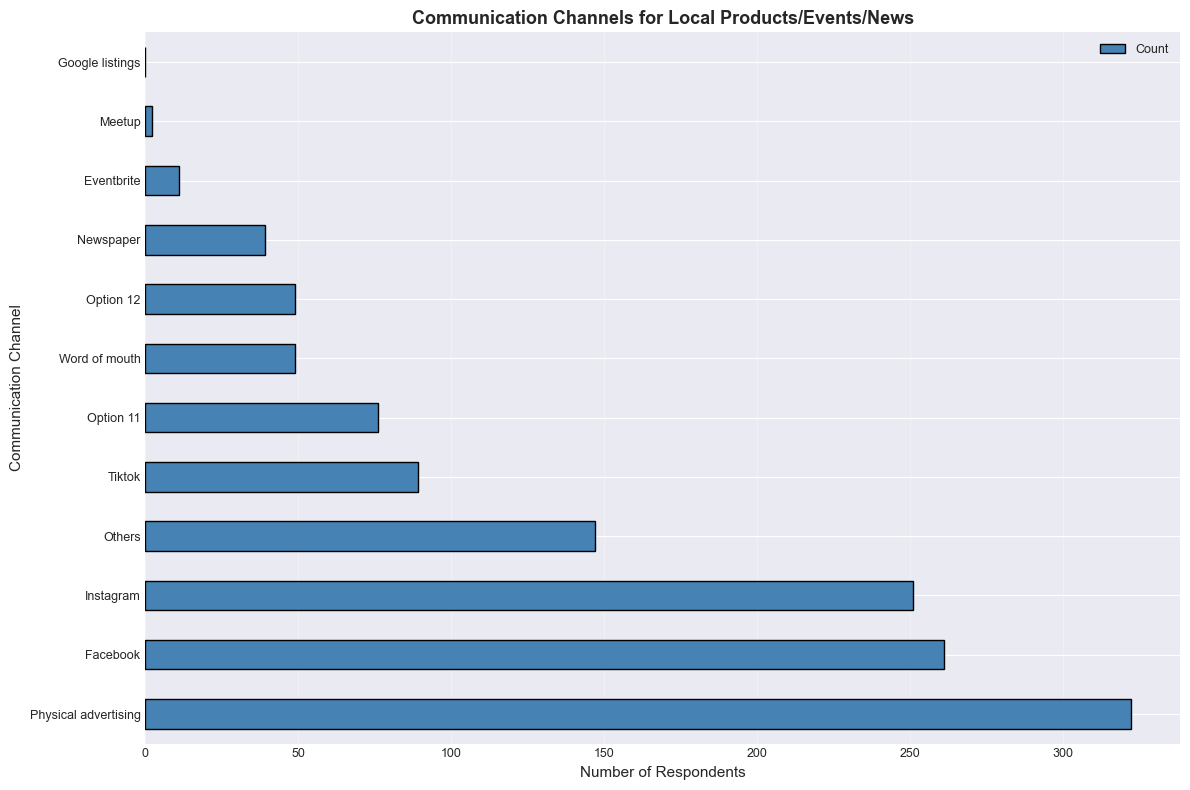


--------------------------------------------------------------------------------
COMMUNICATION CHANNEL SEGMENT CREATION
--------------------------------------------------------------------------------

Channel Segment Distribution:
Channel_Segment
Multiple Channels    280
Other/Unspecified    209
Digital-First        128
Traditional/Print     63
Community-Engaged      4
Name: count, dtype: int64

Percentages:
Channel_Segment
Multiple Channels    40.9
Other/Unspecified    30.6
Digital-First        18.7
Traditional/Print     9.2
Community-Engaged     0.6
Name: count, dtype: float64


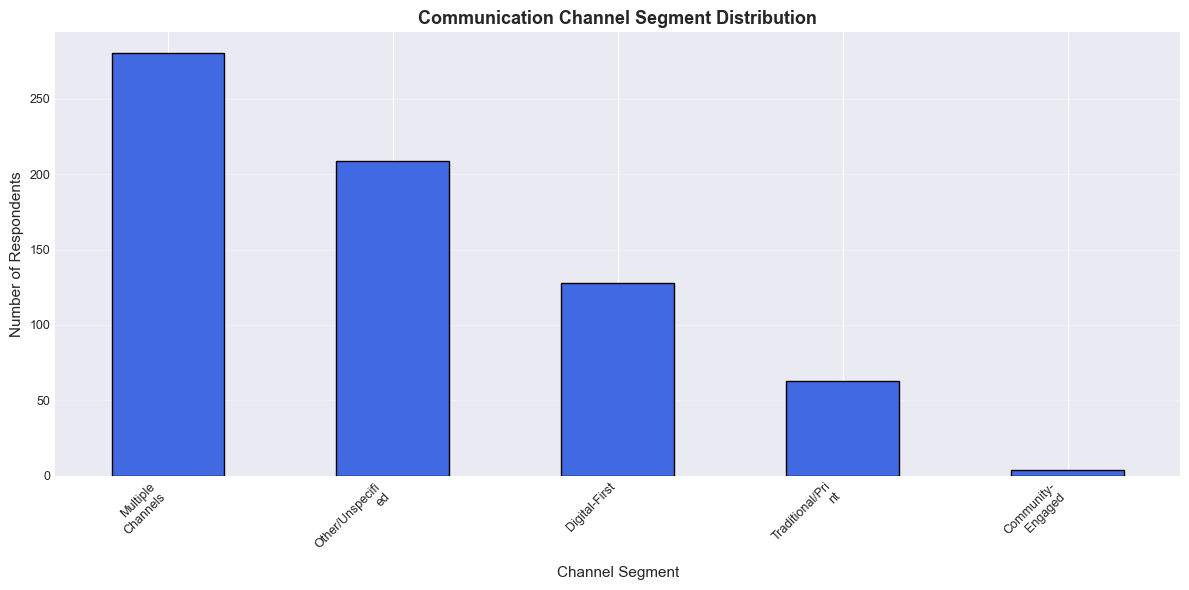


CROSS-TABULATION: Channel Segment × Age Group
Age_Group          18-20  21-24  25-40  41-59  60+  Under 18  All
Channel_Segment                                                  
Community-Engaged      0      0      1      2    0         1    4
Digital-First          6     18     43     44   16         1  128
Multiple Channels     20     45     84     78   24        29  280
Other/Unspecified     10     19     25     14  114        27  209
Traditional/Print      5     12      9      7   19        11   63
All                   41     94    162    145  173        69  684


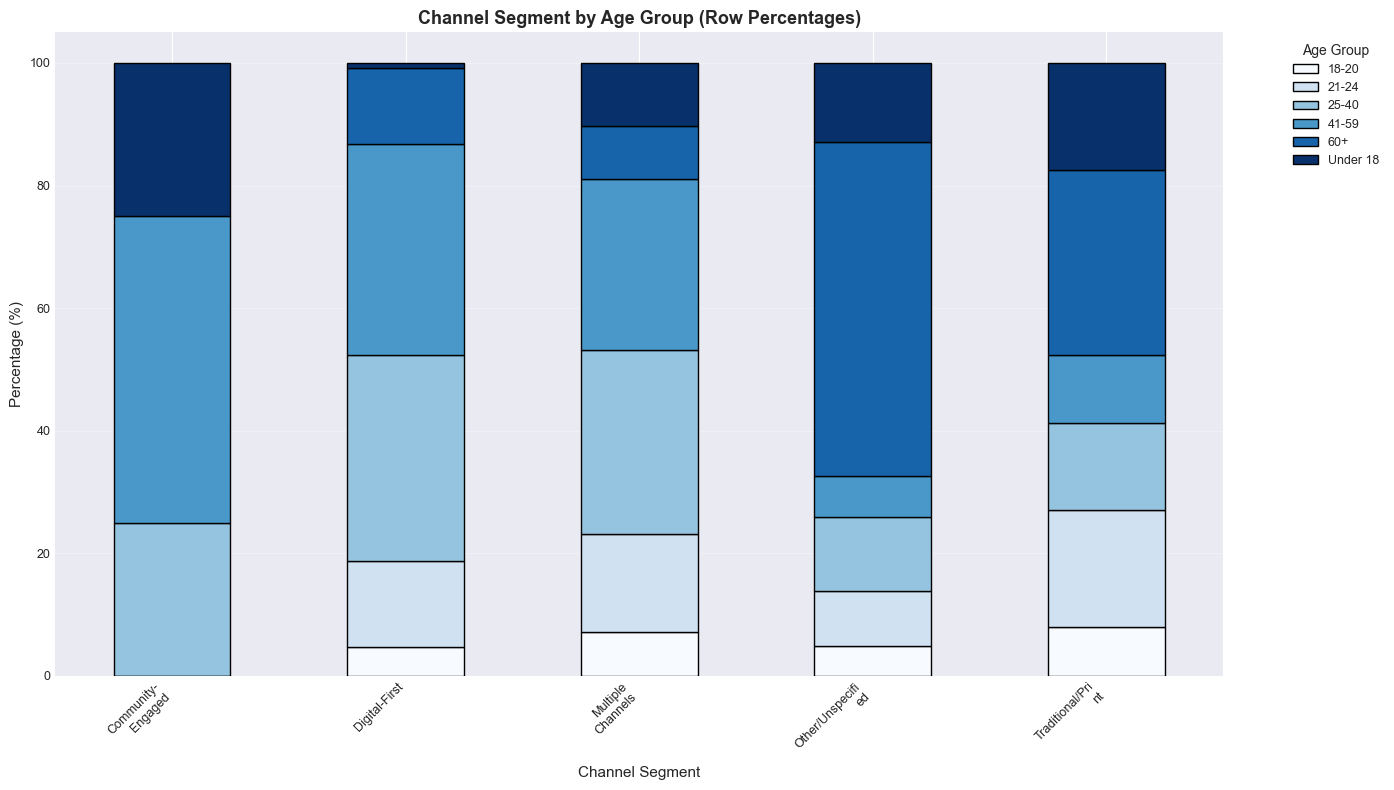


CROSS-TABULATION: Channel Segment × Income Segment
Income_Segment     $100,000-$149,999  $150,000-$199,999  $200,000-$249,999  \
Channel_Segment                                                              
Community-Engaged                  0                  0                  0   
Digital-First                     15                 12                  9   
Multiple Channels                 45                 37                 18   
Other/Unspecified                  3                  2                  1   
Traditional/Print                 10                  3                  4   
All                               73                 54                 32   

Income_Segment     $25,000-$49,999  $250,000+  $50,000-$99,999  \
Channel_Segment                                                  
Community-Engaged                1          1                0   
Digital-First                   13         12               25   
Multiple Channels               24         22              

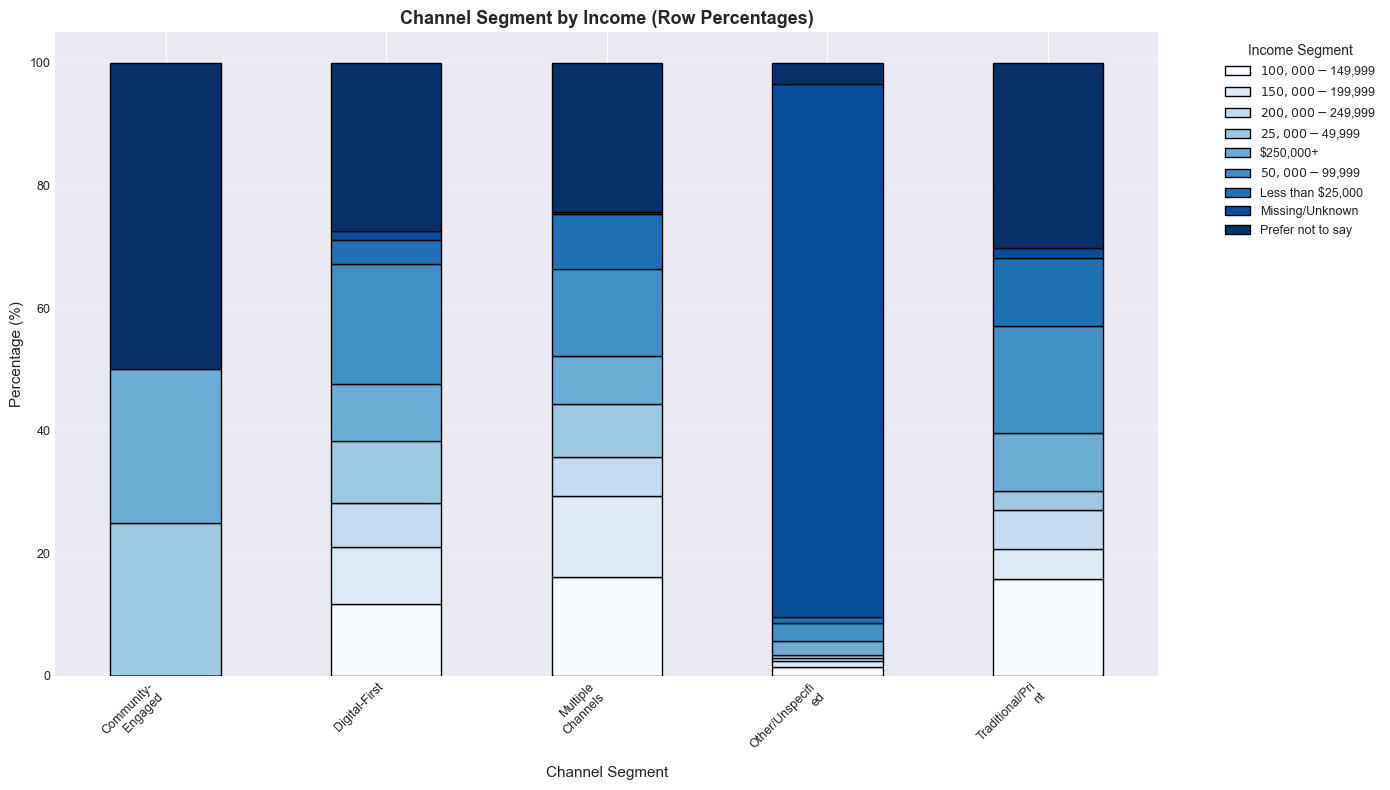


COMMUNICATION CHANNELS BY AWARENESS LEVEL

I've heard of it but have not  been there (n=47):
             Channel  Count  Percentage
Physical advertising     24        51.1
           Instagram     20        42.6
              Others     14        29.8
           Option 11      9        19.1
            Facebook      7        14.9

I've been there (n=621):
             Channel  Count  Percentage
Physical advertising    290        46.7
            Facebook    254        40.9
           Instagram    225        36.2
              Others    130        20.9
              Tiktok     83        13.4

I've never heard of it and have not been there (n=16):
             Channel  Count  Percentage
Physical advertising      8        50.0
           Instagram      6        37.5
              Others      3        18.8
           Option 11      1         6.2
           Option 12      1         6.2


In [45]:
# H. COMMUNICATION CHANNELS SEGMENTATION

print("="*80)
print("SECTION H: COMMUNICATION CHANNELS SEGMENTATION")
print("="*80)

# Q32: How do you hear about local products, events, or news?

q32_cols = [col for col in df.columns if col.startswith('Q32_') and col != 'Q32_12_TEXT']

if q32_cols:
    channel_counts = {}
    for col in q32_cols:
        num = col.replace('Q32_', '')
        if num.isdigit():
            channel_name = q32_key.get(int(num), f"Option {num}")
            # Use == 1 for indicator columns (parsed from multi-select)
            channel_counts[channel_name] = (df[col] == 1).sum() if col in df.columns else 0
    
    if channel_counts:
        channel_df = pd.DataFrame(list(channel_counts.items()), 
                                 columns=['Channel', 'Count'])
        channel_df = channel_df.sort_values('Count', ascending=False)
        channel_df['Percentage'] = (channel_df['Count'] / len(df) * 100).round(1)
        
        print("\nCommunication Channels Used:")
        print(channel_df.to_string(index=False))
        
        fig, ax = plt.subplots(figsize=(12, 8))
        channel_df.plot(x='Channel', y='Count', kind='barh', ax=ax, 
                       color='steelblue', edgecolor='black')
        ax.set_title('Communication Channels for Local Products/Events/News', 
                    fontsize=13, fontweight='bold')
        ax.set_xlabel('Number of Respondents', fontsize=11)
        ax.set_ylabel('Communication Channel', fontsize=11)
        ax.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()

# Create communication channel segments
print("\n" + "-"*80)
print("COMMUNICATION CHANNEL SEGMENT CREATION")
print("-"*80)

def assign_channel_segment(row):
    """Assign communication channel segment"""
    segments = []
    
    # Digital-first Audiences
    if (row.get('Q32_1', 0) == 1 or  # Facebook
        row.get('Q32_2', 0) == 1 or  # Instagram
        row.get('Q32_3', 0) == 1):   # TikTok
        segments.append('Digital-First')
    
    # Community/Local Engagement
    if (row.get('Q32_8', 0) == 1 or  # Word of mouth
        row.get('Q32_6', 0) == 1 or  # Meetup
        row.get('Q32_5', 0) == 1):   # Eventbrite
        segments.append('Community-Engaged')
    
    # Traditional/Print Consumers
    if (row.get('Q32_4', 0) == 1 or  # Newspaper
        row.get('Q32_9', 0) == 1):   # Physical advertising
        segments.append('Traditional/Print')
    
    # Search-Driven Users
    if row.get('Q32_7', 0) == 1:  # Google listings
        segments.append('Search-Driven')
    
    if not segments:
        return 'Other/Unspecified'
    elif len(segments) == 1:
        return segments[0]
    else:
        return 'Multiple Channels'

df['Channel_Segment'] = df.apply(assign_channel_segment, axis=1)

# Analyze segments
channel_seg_counts = df['Channel_Segment'].value_counts()
print("\nChannel Segment Distribution:")
print(channel_seg_counts)
print("\nPercentages:")
print((channel_seg_counts / len(df) * 100).round(1))

fig, ax = plt.subplots(figsize=(12, 6))
channel_seg_counts.plot(kind='bar', ax=ax, color='royalblue', edgecolor='black')
ax.set_title('Communication Channel Segment Distribution', fontsize=13, fontweight='bold')
ax.set_xlabel('Channel Segment', fontsize=11)
ax.set_ylabel('Number of Respondents', fontsize=11)
ax.set_xticklabels(wrap_labels(channel_seg_counts.index, width=15), rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Cross-tabulation: Channel × Demographics
print("\n" + "="*80)
print("CROSS-TABULATION: Channel Segment × Age Group")
print("="*80)
if 'Age_Group' in df.columns:
    crosstab_chan_age = pd.crosstab(df['Channel_Segment'], df['Age_Group'], margins=True)
    print(crosstab_chan_age)
    
    # Visualize
    crosstab_chan_age_pct = pd.crosstab(df['Channel_Segment'], df['Age_Group'], normalize='index') * 100
    fig, ax = plt.subplots(figsize=(14, 8))
    crosstab_chan_age_pct.plot(kind='bar', ax=ax, stacked=True, colormap='Blues', edgecolor='black')
    ax.set_title('Channel Segment by Age Group (Row Percentages)', fontsize=13, fontweight='bold')
    ax.set_xlabel('Channel Segment', fontsize=11)
    ax.set_ylabel('Percentage (%)', fontsize=11)
    ax.set_xticklabels(wrap_labels(crosstab_chan_age_pct.index, width=15), rotation=45, ha='right')
    ax.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

print("\n" + "="*80)
print("CROSS-TABULATION: Channel Segment × Income Segment")
print("="*80)
if 'Income_Segment' in df.columns:
    crosstab_chan_income = pd.crosstab(df['Channel_Segment'], df['Income_Segment'], margins=True)
    print(crosstab_chan_income)
    
    # Visualize
    crosstab_chan_income_pct = pd.crosstab(df['Channel_Segment'], df['Income_Segment'], normalize='index') * 100
    fig, ax = plt.subplots(figsize=(14, 8))
    crosstab_chan_income_pct.plot(kind='bar', ax=ax, stacked=True, colormap='Blues', edgecolor='black')
    ax.set_title('Channel Segment by Income (Row Percentages)', fontsize=13, fontweight='bold')
    ax.set_xlabel('Channel Segment', fontsize=11)
    ax.set_ylabel('Percentage (%)', fontsize=11)
    ax.set_xticklabels(wrap_labels(crosstab_chan_income_pct.index, width=15), rotation=45, ha='right')
    ax.legend(title='Income Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Analyze channels by awareness level
print("\n" + "="*80)
print("COMMUNICATION CHANNELS BY AWARENESS LEVEL")
print("="*80)
if 'Awareness_Segment' in df.columns and q32_cols:
    for awareness_level in df['Awareness_Segment'].unique():
        segment_df = df[df['Awareness_Segment'] == awareness_level]
        if len(segment_df) > 0:
            print(f"\n{awareness_level} (n={len(segment_df)}):")
            segment_channels = {}
            for col in q32_cols:
                num = col.replace('Q32_', '')
                if num.isdigit():
                    channel_name = q32_key.get(int(num), f"Option {num}")
                    # Use == 1 for indicator columns (parsed from multi-select)
                    segment_channels[channel_name] = (segment_df[col] == 1).sum() if col in segment_df.columns else 0
            
            if segment_channels:
                seg_ch_df = pd.DataFrame(list(segment_channels.items()), 
                                       columns=['Channel', 'Count'])
                seg_ch_df = seg_ch_df.sort_values('Count', ascending=False)
                seg_ch_df['Percentage'] = (seg_ch_df['Count'] / len(segment_df) * 100).round(1)
                print(seg_ch_df.head(5).to_string(index=False))


SECTION I: SATISFACTION SEGMENTATION

--------------------------------------------------------------------------------
SATISFACTION RATINGS (VISITORS ONLY)
--------------------------------------------------------------------------------

Satisfaction Ratings by Aspect:
               Aspect  Avg Rating  Highly Satisfied (4-5)  Dissatisfied (1-2)  Total Responses
  Vendor Interactions        4.26                     485                  27              580
      Product Variety        4.17                     482                  56              581
      Value for Money        3.89                     409                  58              580
          Cleanliness        3.69                     369                  81              580
Parking/Accessibility        3.44                     288                 127              578


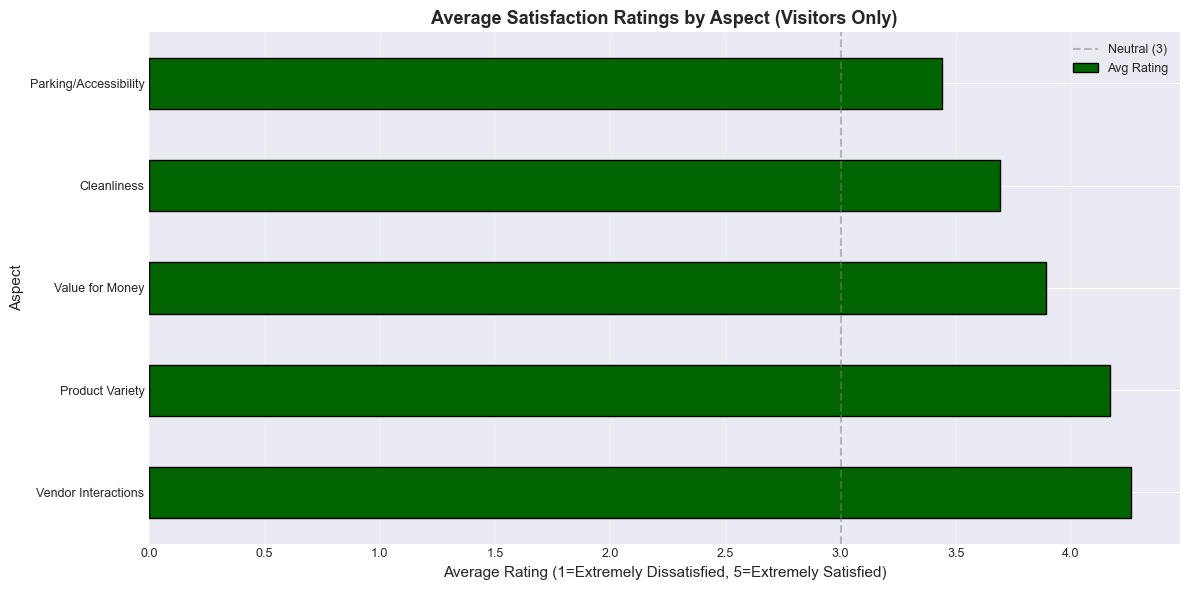

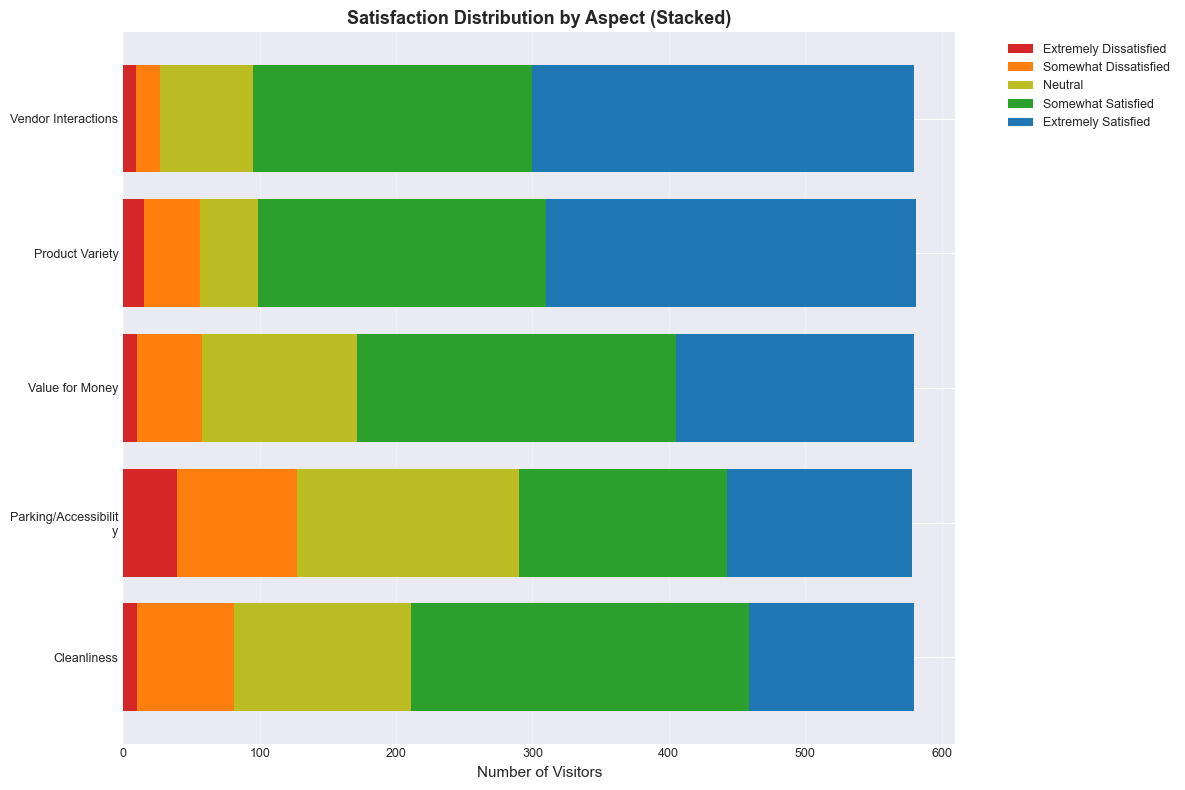


--------------------------------------------------------------------------------
SATISFACTION SEGMENT CREATION
--------------------------------------------------------------------------------

Satisfaction Segment Distribution:
Satisfaction_Segment
Highly Satisfied        316
Mixed/Neutral           113
Dissatisfied             85
Moderately Satisfied     67
Not a visitor            63
No Ratings               40
Name: count, dtype: int64

Percentages:
Satisfaction_Segment
Highly Satisfied        46.2
Mixed/Neutral           16.5
Dissatisfied            12.4
Moderately Satisfied     9.8
Not a visitor            9.2
No Ratings               5.8
Name: count, dtype: float64


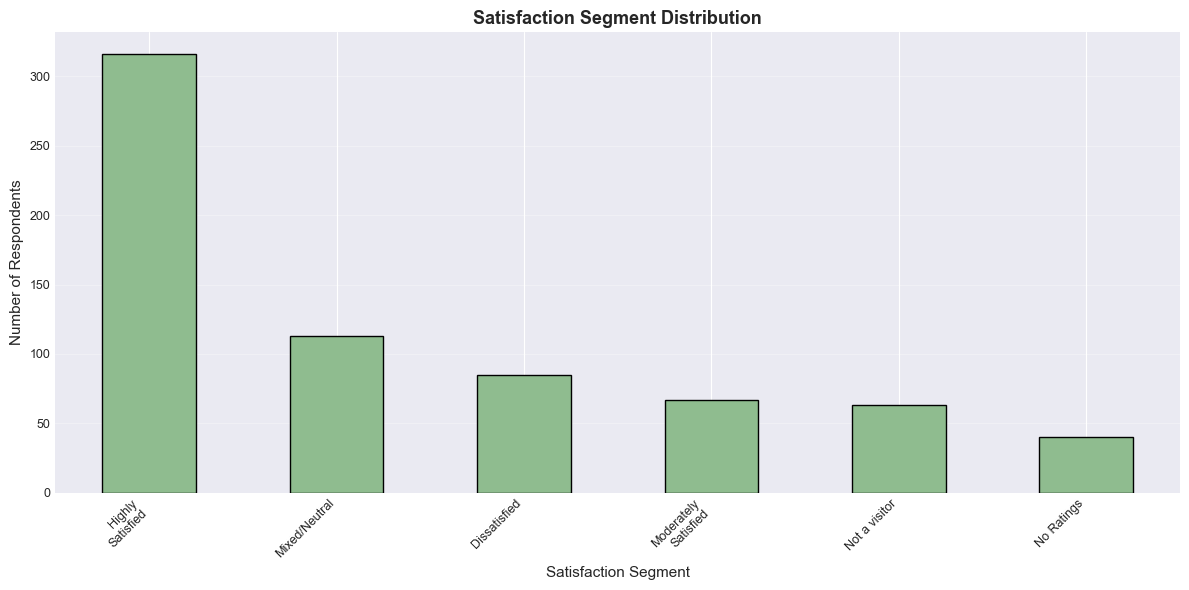


CROSS-TABULATION: Satisfaction Segment × Visit Frequency

CROSS-TABULATION: Satisfaction Segment × Spending Level


In [46]:
# I. SATISFACTION SEGMENTATION

print("="*80)
print("SECTION I: SATISFACTION SEGMENTATION")
print("="*80)

# Q13: How satisfied are you with the following?
# Q13_1: Product Variety
# Q13_2: Cleanliness
# Q13_3: Vendor Interactions
# Q13_4: Parking/Accessibility
# Q13_5: Value for Money

# Satisfaction columns (Q13_1 through Q13_5)
satisfaction_cols = ['Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5']
satisfaction_labels = {
    'Q13_1': 'Product Variety',
    'Q13_2': 'Cleanliness',
    'Q13_3': 'Vendor Interactions',
    'Q13_4': 'Parking/Accessibility',
    'Q13_5': 'Value for Money'
}

# Analyze satisfaction for visitors only
if 'visitors' in locals() and len(visitors) > 0:
    print("\n" + "-"*80)
    print("SATISFACTION RATINGS (VISITORS ONLY)")
    print("-"*80)
    
    satisfaction_data = []
    for col in satisfaction_cols:
        if col in visitors.columns:
            aspect_name = satisfaction_labels.get(col, col.replace('Q13_', ''))
            # Calculate satisfaction distribution
            sat_dist = visitors[col].value_counts().sort_index()
            # Calculate average satisfaction (1=Extremely dissatisfied, 5=Extremely satisfied)
            avg_satisfaction = visitors[col].mean()
            highly_satisfied = (visitors[col] >= 4).sum()  # Somewhat or Extremely satisfied
            dissatisfied = (visitors[col] <= 2).sum()  # Somewhat or Extremely dissatisfied
            
            satisfaction_data.append({
                'Aspect': aspect_name,
                'Avg Rating': round(avg_satisfaction, 2),
                'Highly Satisfied (4-5)': highly_satisfied,
                'Dissatisfied (1-2)': dissatisfied,
                'Total Responses': visitors[col].notna().sum()
            })
    
    if satisfaction_data:
        sat_df = pd.DataFrame(satisfaction_data)
        sat_df = sat_df.sort_values('Avg Rating', ascending=False)
        
        print("\nSatisfaction Ratings by Aspect:")
        print(sat_df.to_string(index=False))
        
        # Visualize average satisfaction
        fig, ax = plt.subplots(figsize=(12, 6))
        sat_df.plot(x='Aspect', y='Avg Rating', kind='barh', ax=ax, 
                   color='darkgreen', edgecolor='black')
        ax.set_title('Average Satisfaction Ratings by Aspect (Visitors Only)', 
                    fontsize=13, fontweight='bold')
        ax.set_xlabel('Average Rating (1=Extremely Dissatisfied, 5=Extremely Satisfied)', fontsize=11)
        ax.set_ylabel('Aspect', fontsize=11)
        ax.axvline(x=3, color='gray', linestyle='--', alpha=0.5, label='Neutral (3)')
        ax.legend()
        ax.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Stacked bar chart showing satisfaction levels
        fig, ax = plt.subplots(figsize=(12, 8))
        sat_df_sorted = sat_df.sort_values('Avg Rating', ascending=True)
        x_pos = range(len(sat_df_sorted))
        
        # Get detailed satisfaction breakdown
        sat_breakdown = []
        for col in satisfaction_cols:
            if col in visitors.columns:
                aspect_name = satisfaction_labels.get(col, col.replace('Q13_', ''))
                sat_5 = (visitors[col] == 5).sum()
                sat_4 = (visitors[col] == 4).sum()
                sat_3 = (visitors[col] == 3).sum()
                sat_2 = (visitors[col] == 2).sum()
                sat_1 = (visitors[col] == 1).sum()
                sat_breakdown.append({
                    'Aspect': aspect_name,
                    'Extremely Satisfied (5)': sat_5,
                    'Somewhat Satisfied (4)': sat_4,
                    'Neutral (3)': sat_3,
                    'Somewhat Dissatisfied (2)': sat_2,
                    'Extremely Dissatisfied (1)': sat_1
                })
        
        sat_breakdown_df = pd.DataFrame(sat_breakdown)
        sat_breakdown_df = sat_breakdown_df.sort_values('Extremely Satisfied (5)', ascending=True)
        
        x_pos = range(len(sat_breakdown_df))
        ax.barh(x_pos, sat_breakdown_df['Extremely Dissatisfied (1)'], 
               label='Extremely Dissatisfied', color='#d62728')
        ax.barh(x_pos, sat_breakdown_df['Somewhat Dissatisfied (2)'], 
               left=sat_breakdown_df['Extremely Dissatisfied (1)'],
               label='Somewhat Dissatisfied', color='#ff7f0e')
        ax.barh(x_pos, sat_breakdown_df['Neutral (3)'], 
               left=sat_breakdown_df['Extremely Dissatisfied (1)'] + sat_breakdown_df['Somewhat Dissatisfied (2)'],
               label='Neutral', color='#bcbd22')
        ax.barh(x_pos, sat_breakdown_df['Somewhat Satisfied (4)'], 
               left=sat_breakdown_df['Extremely Dissatisfied (1)'] + sat_breakdown_df['Somewhat Dissatisfied (2)'] + sat_breakdown_df['Neutral (3)'],
               label='Somewhat Satisfied', color='#2ca02c')
        ax.barh(x_pos, sat_breakdown_df['Extremely Satisfied (5)'], 
               left=sat_breakdown_df['Extremely Dissatisfied (1)'] + sat_breakdown_df['Somewhat Dissatisfied (2)'] + sat_breakdown_df['Neutral (3)'] + sat_breakdown_df['Somewhat Satisfied (4)'],
               label='Extremely Satisfied', color='#1f77b4')
        
        ax.set_yticks(x_pos)
        ax.set_yticklabels(wrap_labels(sat_breakdown_df['Aspect'], width=20))
        ax.set_xlabel('Number of Visitors', fontsize=11)
        ax.set_title('Satisfaction Distribution by Aspect (Stacked)', fontsize=13, fontweight='bold')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()

# Create satisfaction segments
print("\n" + "-"*80)
print("SATISFACTION SEGMENT CREATION")
print("-"*80)

def assign_satisfaction_segment(row):
    """Assign satisfaction segment based on Q13 responses"""
    if pd.isna(row.get('Q3')) or row['Q3'] != 1:
        return 'Not a visitor'
    
    # Calculate average satisfaction across all aspects
    ratings = []
    for col in satisfaction_cols:
        if col in row.index and not pd.isna(row[col]):
            ratings.append(row[col])
    
    if not ratings:
        return 'No Ratings'
    
    avg_rating = np.mean(ratings)
    
    # Count highly satisfied aspects (4 or 5)
    highly_satisfied_count = sum(1 for col in satisfaction_cols 
                                if col in row.index and not pd.isna(row[col]) and row[col] >= 4)
    
    # Count dissatisfied aspects (1 or 2)
    dissatisfied_count = sum(1 for col in satisfaction_cols 
                            if col in row.index and not pd.isna(row[col]) and row[col] <= 2)
    
    if avg_rating >= 4.0 and highly_satisfied_count >= 3:
        return 'Highly Satisfied'
    elif avg_rating >= 3.0 and dissatisfied_count == 0:
        return 'Moderately Satisfied'
    elif avg_rating < 3.0 or dissatisfied_count >= 2:
        return 'Dissatisfied'
    else:
        return 'Mixed/Neutral'

df['Satisfaction_Segment'] = df.apply(assign_satisfaction_segment, axis=1)

# Analyze segments
sat_seg_counts = df['Satisfaction_Segment'].value_counts()
print("\nSatisfaction Segment Distribution:")
print(sat_seg_counts)
print("\nPercentages:")
print((sat_seg_counts / len(df) * 100).round(1))

fig, ax = plt.subplots(figsize=(12, 6))
sat_seg_counts.plot(kind='bar', ax=ax, color='darkseagreen', edgecolor='black')
ax.set_title('Satisfaction Segment Distribution', fontsize=13, fontweight='bold')
ax.set_xlabel('Satisfaction Segment', fontsize=11)
ax.set_ylabel('Number of Respondents', fontsize=11)
ax.set_xticklabels(wrap_labels(sat_seg_counts.index, width=15), rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Cross-tabulation: Satisfaction × Behavior
print("\n" + "="*80)
print("CROSS-TABULATION: Satisfaction Segment × Visit Frequency")
print("="*80)
if 'Visit_Frequency' in df.columns and 'visitors' in locals():
    visitors_with_sat = visitors[visitors['Satisfaction_Segment'].notna()].copy()
    if len(visitors_with_sat) > 0:
        crosstab_sat_freq = pd.crosstab(visitors_with_sat['Satisfaction_Segment'], 
                                       visitors_with_sat['Visit_Frequency'], 
                                       margins=True)
        print(crosstab_sat_freq)
        
        # Visualize
        crosstab_sat_freq_pct = pd.crosstab(visitors_with_sat['Satisfaction_Segment'], 
                                           visitors_with_sat['Visit_Frequency'], 
                                           normalize='index') * 100
        fig, ax = plt.subplots(figsize=(14, 8))
        crosstab_sat_freq_pct.plot(kind='bar', ax=ax, stacked=True, colormap='RdYlGn', edgecolor='black')
        ax.set_title('Satisfaction Segment by Visit Frequency (Row Percentages)', 
                    fontsize=13, fontweight='bold')
        ax.set_xlabel('Satisfaction Segment', fontsize=11)
        ax.set_ylabel('Percentage (%)', fontsize=11)
        ax.set_xticklabels(wrap_labels(crosstab_sat_freq_pct.index, width=15), rotation=45, ha='right')
        ax.legend(title='Visit Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

print("\n" + "="*80)
print("CROSS-TABULATION: Satisfaction Segment × Spending Level")
print("="*80)
if 'Spending_Level' in df.columns and 'visitors' in locals():
    visitors_with_sat = visitors[visitors['Satisfaction_Segment'].notna()].copy()
    if len(visitors_with_sat) > 0:
        crosstab_sat_spend = pd.crosstab(visitors_with_sat['Satisfaction_Segment'], 
                                        visitors_with_sat['Spending_Level'], 
                                        margins=True)
        print(crosstab_sat_spend)


# E. Barrier-Based Segments

**Logistical Barriers**
- Hard to park
- Hours don’t fit schedule
- Inconvenient location
- Does not live in Cleveland

**Experience Barriers**
- Market feels crowded/hectic
- Not enough seating
- Not enough prepared food options
- Unaware of what vendors offer

**Economic Barriers**
- Prices too high

**Preference Barriers**
- Prefer supermarkets
- Prefer other markets


SECTION 1: CROSS-COMPARISON MATRICES

DEMOGRAPHICS → BEHAVIOR

--------------------------------------------------------------------------------
1. Age Group × Visit Frequency
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
2. Age Group × Spending Level
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
3. Income Segment × Motivation Segment
--------------------------------------------------------------------------------
Motivation_Segment  Food Adventurer  Local Loyalist  Multiple Segments  \
Income_Segment                                                           
$100,000-$149,999                 0               2                 66   
$150,000-$199,999                 2               0                 48   
$200,000-$249,999                 0               4  

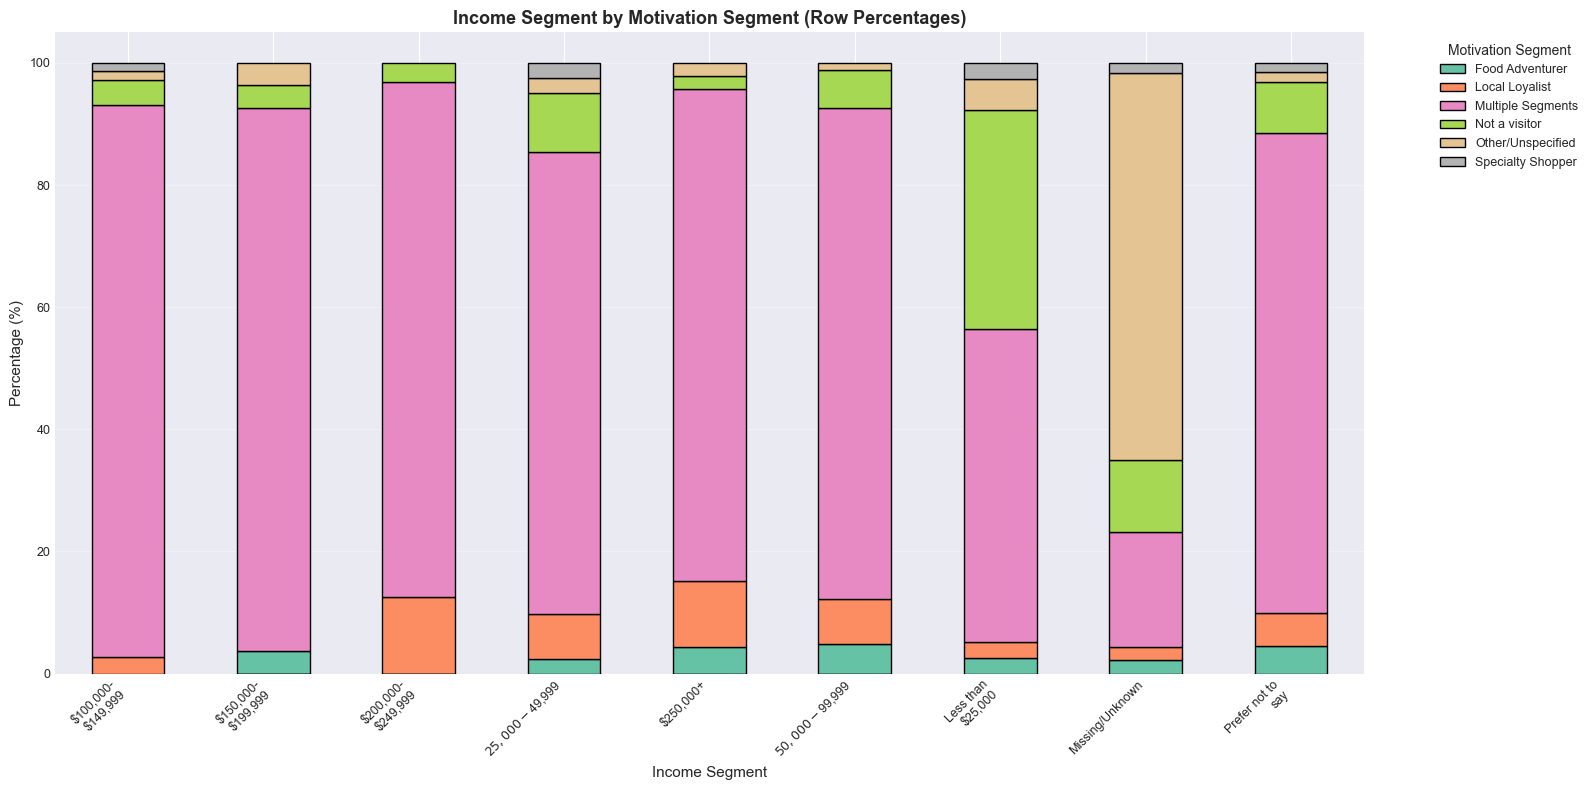


--------------------------------------------------------------------------------
4. Zip Code Segment × Barrier Segment
--------------------------------------------------------------------------------
Barrier_Segment         Economic  Experience  Logistical  Multiple Barriers  \
Zip_Segment                                                                   
Greater Cleveland              4          54          67                 82   
Missing/Unknown                0           2           4                  5   
Near Market (~5 miles)         2          30          18                 31   
Out-of-town/Other              0           2          13                 11   
Suburban Cleveland             5          37          78                 74   
All                           11         125         180                203   

Barrier_Segment         No Barriers/Not Specified  Preference  All  
Zip_Segment                                                         
Greater Cleveland           

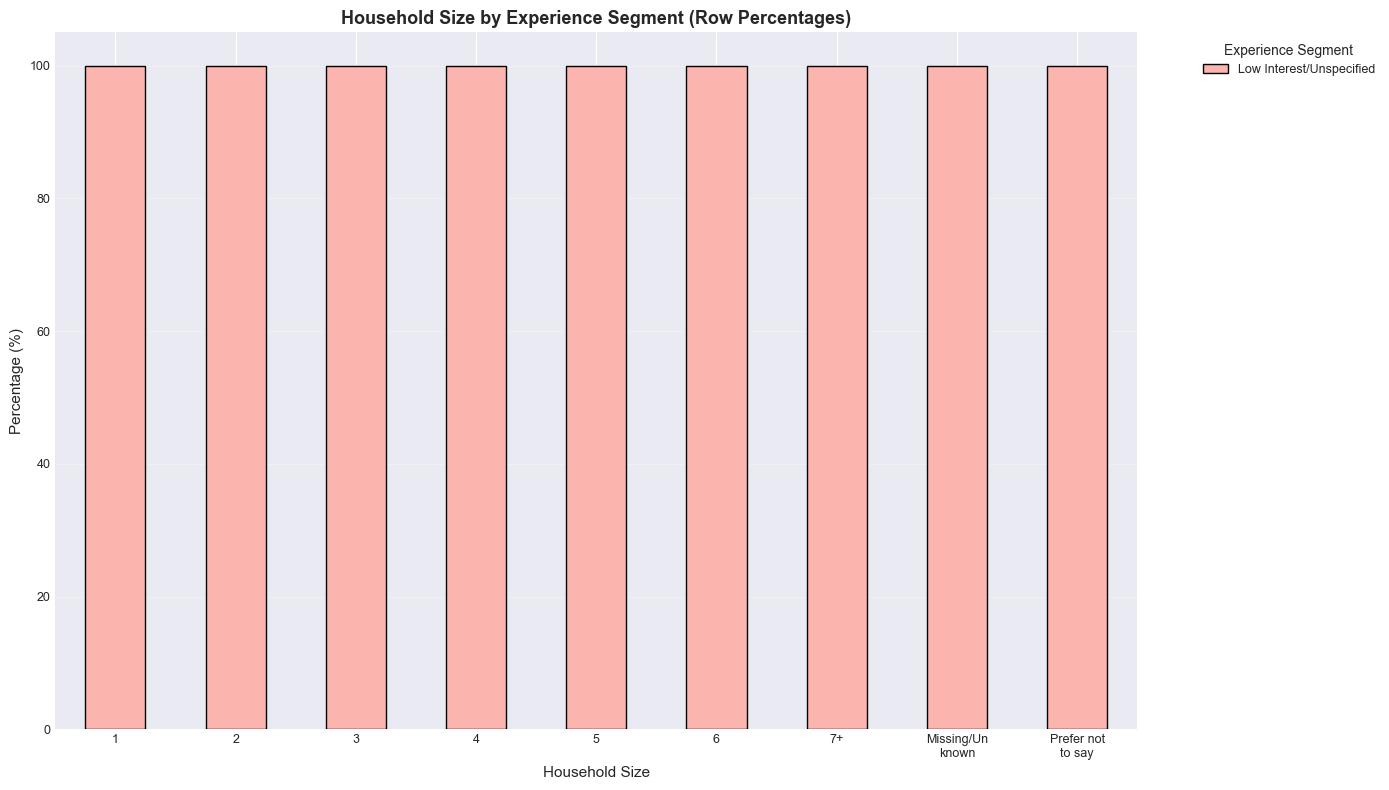


BEHAVIOR → SATISFACTION

--------------------------------------------------------------------------------
1. Visit Frequency × Satisfaction Segment (See Section I)
--------------------------------------------------------------------------------
(Already visualized in Section I)

--------------------------------------------------------------------------------
2. Spending Level × Satisfaction Segment (See Section I)
--------------------------------------------------------------------------------
(Already visualized in Section I)

--------------------------------------------------------------------------------
3. Travel Mode × Satisfaction Segment
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
4. Shopping Style × Satisfaction Segment
--------------------------------------------------------------------------------

BEHAVIOR → MOTIVATION

-------------------------------------

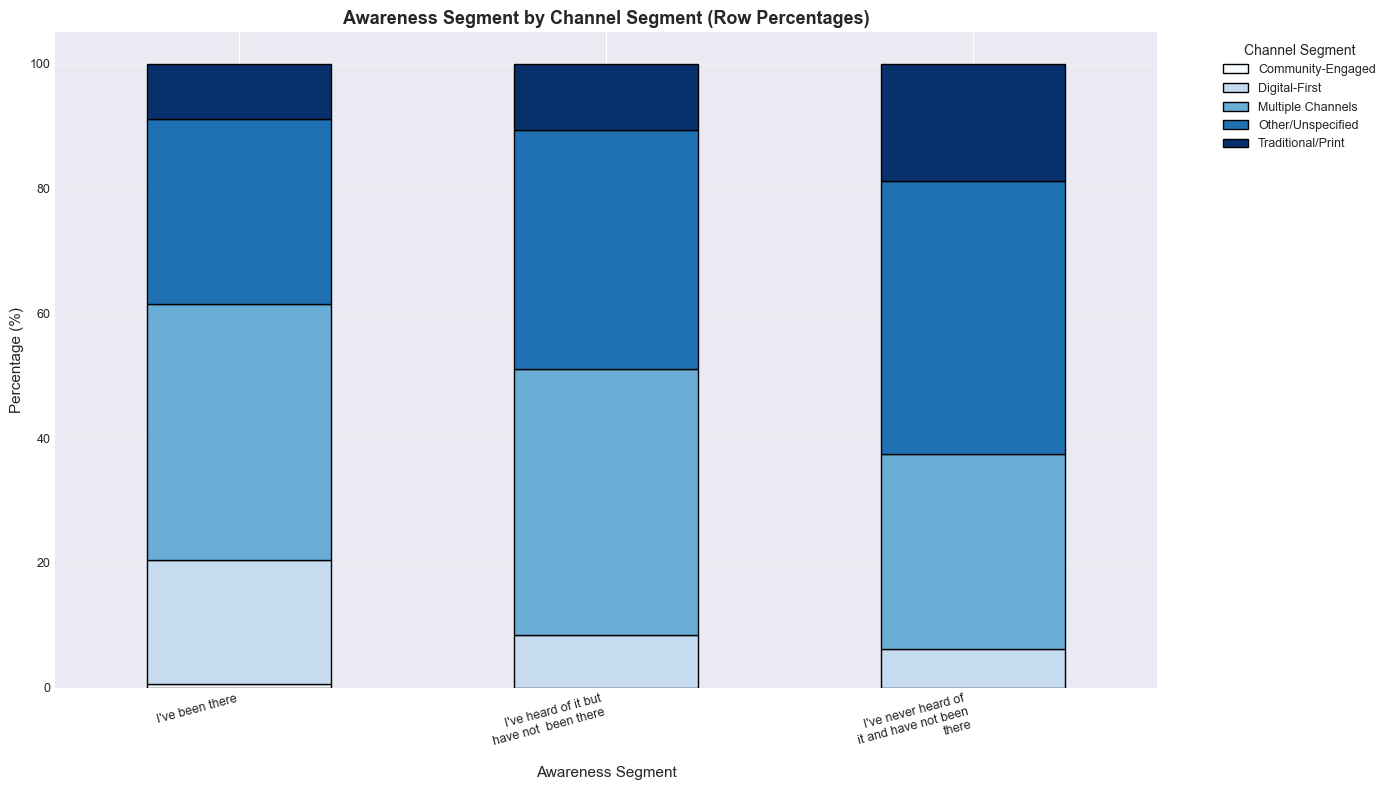


CROSS-COMPARISON ANALYSIS COMPLETE

Summary of all segments created:
- Demographic segments: Age, Zip, Income, Household Size, Gender, Race
- Awareness segments: 3 unique segments
- Behavioral segments: Visit Frequency, Spending, Shopping Style, Travel Mode, Last Visit
- Motivation segments: 6 unique segments
- Barrier segments: 6 unique segments
- Experience segments: 1 unique segments
- Grocery behavior segments: Primary Store, Delivery Usage
- Channel segments: 5 unique segments
- Satisfaction segments: 6 unique segments


In [47]:
# 1. CROSS-COMPARISON MATRIX

print("="*80)
print("SECTION 1: CROSS-COMPARISON MATRICES")
print("="*80)

# DEMOGRAPHICS → BEHAVIOR
print("\n" + "="*80)
print("DEMOGRAPHICS → BEHAVIOR")
print("="*80)

# Age × Visit Frequency
print("\n" + "-"*80)
print("1. Age Group × Visit Frequency")
print("-"*80)
if 'Age_Group' in df.columns and 'Visit_Frequency' in df.columns and 'visitors' in locals():
    visitors_with_age = visitors[visitors['Age_Group'].notna() & visitors['Visit_Frequency'].notna()].copy()
    if len(visitors_with_age) > 0:
        crosstab_age_freq = pd.crosstab(visitors_with_age['Age_Group'], 
                                       visitors_with_age['Visit_Frequency'], 
                                       margins=True)
        print(crosstab_age_freq)
        
        # Visualize
        crosstab_age_freq_pct = pd.crosstab(visitors_with_age['Age_Group'], 
                                           visitors_with_age['Visit_Frequency'], 
                                           normalize='index') * 100
        fig, ax = plt.subplots(figsize=(14, 8))
        crosstab_age_freq_pct.plot(kind='bar', ax=ax, stacked=True, colormap='coolwarm', edgecolor='black')
        ax.set_title('Age Group by Visit Frequency (Row Percentages)', fontsize=13, fontweight='bold')
        ax.set_xlabel('Age Group', fontsize=11)
        ax.set_ylabel('Percentage (%)', fontsize=11)
        ax.set_xticklabels(wrap_labels(crosstab_age_freq_pct.index, width=12), rotation=45, ha='right')
        ax.legend(title='Visit Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

# Age × Spending Level
print("\n" + "-"*80)
print("2. Age Group × Spending Level")
print("-"*80)
if 'Age_Group' in df.columns and 'Spending_Level' in df.columns and 'visitors' in locals():
    visitors_with_age = visitors[visitors['Age_Group'].notna() & visitors['Spending_Level'].notna()].copy()
    if len(visitors_with_age) > 0:
        crosstab_age_spend = pd.crosstab(visitors_with_age['Age_Group'], 
                                        visitors_with_age['Spending_Level'], 
                                        margins=True)
        print(crosstab_age_spend)
        
        # Visualize
        crosstab_age_spend_pct = pd.crosstab(visitors_with_age['Age_Group'], 
                                            visitors_with_age['Spending_Level'], 
                                            normalize='index') * 100
        fig, ax = plt.subplots(figsize=(14, 8))
        crosstab_age_spend_pct.plot(kind='bar', ax=ax, stacked=True, colormap='YlOrRd', edgecolor='black')
        ax.set_title('Age Group by Spending Level (Row Percentages)', fontsize=13, fontweight='bold')
        ax.set_xlabel('Age Group', fontsize=11)
        ax.set_ylabel('Percentage (%)', fontsize=11)
        ax.set_xticklabels(wrap_labels(crosstab_age_spend_pct.index, width=12), rotation=45, ha='right')
        ax.legend(title='Spending Level', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

# Income × Motivations
print("\n" + "-"*80)
print("3. Income Segment × Motivation Segment")
print("-"*80)
if 'Income_Segment' in df.columns and 'Motivation_Segment' in df.columns:
    df_with_both = df[df['Income_Segment'].notna() & df['Motivation_Segment'].notna()].copy()
    if len(df_with_both) > 0:
        crosstab_income_mot = pd.crosstab(df_with_both['Income_Segment'], 
                                         df_with_both['Motivation_Segment'], 
                                         margins=True)
        print(crosstab_income_mot)
        
        # Visualize (show top motivations by income)
        crosstab_income_mot_pct = pd.crosstab(df_with_both['Income_Segment'], 
                                             df_with_both['Motivation_Segment'], 
                                             normalize='index') * 100
        fig, ax = plt.subplots(figsize=(16, 8))
        crosstab_income_mot_pct.plot(kind='bar', ax=ax, stacked=True, colormap='Set2', edgecolor='black')
        ax.set_title('Income Segment by Motivation Segment (Row Percentages)', 
                    fontsize=13, fontweight='bold')
        ax.set_xlabel('Income Segment', fontsize=11)
        ax.set_ylabel('Percentage (%)', fontsize=11)
        ax.set_xticklabels(wrap_labels(crosstab_income_mot_pct.index, width=15), rotation=45, ha='right')
        ax.legend(title='Motivation Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

# Zip Code × Barriers
print("\n" + "-"*80)
print("4. Zip Code Segment × Barrier Segment")
print("-"*80)
if 'Zip_Segment' in df.columns and 'Barrier_Segment' in df.columns:
    df_with_both = df[df['Zip_Segment'].notna() & df['Barrier_Segment'].notna()].copy()
    if len(df_with_both) > 0:
        crosstab_zip_barrier = pd.crosstab(df_with_both['Zip_Segment'], 
                                          df_with_both['Barrier_Segment'], 
                                          margins=True)
        print(crosstab_zip_barrier)

# Household Size × Event Interest
print("\n" + "-"*80)
print("5. Household Size × Experience Segment")
print("-"*80)
if 'Household_Size' in df.columns and 'Experience_Segment' in df.columns:
    df_with_both = df[df['Household_Size'].notna() & df['Experience_Segment'].notna()].copy()
    if len(df_with_both) > 0:
        crosstab_hh_exp = pd.crosstab(df_with_both['Household_Size'], 
                                     df_with_both['Experience_Segment'], 
                                     margins=True)
        print(crosstab_hh_exp)
        
        # Visualize
        crosstab_hh_exp_pct = pd.crosstab(df_with_both['Household_Size'], 
                                         df_with_both['Experience_Segment'], 
                                         normalize='index') * 100
        fig, ax = plt.subplots(figsize=(14, 8))
        crosstab_hh_exp_pct.plot(kind='bar', ax=ax, stacked=True, colormap='Pastel1', edgecolor='black')
        ax.set_title('Household Size by Experience Segment (Row Percentages)', 
                    fontsize=13, fontweight='bold')
        ax.set_xlabel('Household Size', fontsize=11)
        ax.set_ylabel('Percentage (%)', fontsize=11)
        ax.set_xticklabels(wrap_labels(crosstab_hh_exp_pct.index, width=10), rotation=0)
        ax.legend(title='Experience Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

# BEHAVIOR → SATISFACTION
print("\n" + "="*80)
print("BEHAVIOR → SATISFACTION")
print("="*80)

# Frequency × Satisfaction (already done in Section I, but show again)
print("\n" + "-"*80)
print("1. Visit Frequency × Satisfaction Segment (See Section I)")
print("-"*80)
print("(Already visualized in Section I)")

# Spending × Satisfaction
print("\n" + "-"*80)
print("2. Spending Level × Satisfaction Segment (See Section I)")
print("-"*80)
print("(Already visualized in Section I)")

# Travel Mode × Satisfaction
print("\n" + "-"*80)
print("3. Travel Mode × Satisfaction Segment")
print("-"*80)
if 'Travel_Mode' in df.columns and 'Satisfaction_Segment' in df.columns and 'visitors' in locals():
    visitors_with_both = visitors[visitors['Travel_Mode'].notna() & visitors['Satisfaction_Segment'].notna()].copy()
    if len(visitors_with_both) > 0:
        crosstab_travel_sat = pd.crosstab(visitors_with_both['Travel_Mode'], 
                                         visitors_with_both['Satisfaction_Segment'], 
                                         margins=True)
        print(crosstab_travel_sat)
        
        # Visualize
        crosstab_travel_sat_pct = pd.crosstab(visitors_with_both['Travel_Mode'], 
                                             visitors_with_both['Satisfaction_Segment'], 
                                             normalize='index') * 100
        fig, ax = plt.subplots(figsize=(14, 8))
        crosstab_travel_sat_pct.plot(kind='bar', ax=ax, stacked=True, colormap='RdYlGn', edgecolor='black')
        ax.set_title('Travel Mode by Satisfaction Segment (Row Percentages)', 
                    fontsize=13, fontweight='bold')
        ax.set_xlabel('Travel Mode', fontsize=11)
        ax.set_ylabel('Percentage (%)', fontsize=11)
        ax.set_xticklabels(wrap_labels(crosstab_travel_sat_pct.index, width=15), rotation=45, ha='right')
        ax.legend(title='Satisfaction Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

# Shopping Style × Satisfaction
print("\n" + "-"*80)
print("4. Shopping Style × Satisfaction Segment")
print("-"*80)
if 'Shopping_Style' in df.columns and 'Satisfaction_Segment' in df.columns and 'visitors' in locals():
    visitors_with_both = visitors[visitors['Shopping_Style'].notna() & visitors['Satisfaction_Segment'].notna()].copy()
    if len(visitors_with_both) > 0:
        crosstab_style_sat = pd.crosstab(visitors_with_both['Shopping_Style'], 
                                         visitors_with_both['Satisfaction_Segment'], 
                                         margins=True)
        print(crosstab_style_sat)

# BEHAVIOR → MOTIVATION
print("\n" + "="*80)
print("BEHAVIOR → MOTIVATION")
print("="*80)

# Explorers vs Loyalists × Motivations
print("\n" + "-"*80)
print("1. Shopping Style × Motivation Segment")
print("-"*80)
if 'Shopping_Style' in df.columns and 'Motivation_Segment' in df.columns and 'visitors' in locals():
    visitors_with_both = visitors[visitors['Shopping_Style'].notna() & visitors['Motivation_Segment'].notna()].copy()
    if len(visitors_with_both) > 0:
        crosstab_style_mot = pd.crosstab(visitors_with_both['Shopping_Style'], 
                                         visitors_with_both['Motivation_Segment'], 
                                         margins=True)
        print(crosstab_style_mot)
        
        # Visualize
        crosstab_style_mot_pct = pd.crosstab(visitors_with_both['Shopping_Style'], 
                                            visitors_with_both['Motivation_Segment'], 
                                            normalize='index') * 100
        fig, ax = plt.subplots(figsize=(14, 8))
        crosstab_style_mot_pct.plot(kind='bar', ax=ax, stacked=True, colormap='Set3', edgecolor='black')
        ax.set_title('Shopping Style by Motivation Segment (Row Percentages)', 
                    fontsize=13, fontweight='bold')
        ax.set_xlabel('Shopping Style', fontsize=11)
        ax.set_ylabel('Percentage (%)', fontsize=11)
        ax.set_xticklabels(wrap_labels(crosstab_style_mot_pct.index, width=15), rotation=45, ha='right')
        ax.legend(title='Motivation Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

# AWARENESS → BARRIERS
print("\n" + "="*80)
print("AWARENESS → BARRIERS")
print("="*80)
print("(Already analyzed in Section E)")

# GROCERY BEHAVIOR → MARKET BEHAVIOR
print("\n" + "="*80)
print("GROCERY BEHAVIOR → MARKET BEHAVIOR")
print("="*80)

# Primary Grocery Store × Visit Frequency (already done in Section G)
print("\n" + "-"*80)
print("1. Primary Grocery Store × Visit Frequency (See Section G)")
print("-"*80)
print("(Already visualized in Section G)")

# Delivery Usage × Event Interest
print("\n" + "-"*80)
print("2. Delivery Usage × Experience Segment (See Section G)")
print("-"*80)
print("(Already analyzed in Section G)")

# MARKETING CHANNEL → DEMOGRAPHICS
print("\n" + "="*80)
print("MARKETING CHANNEL → DEMOGRAPHICS")
print("="*80)

# Age × Communication Channels (already done in Section H)
print("\n" + "-"*80)
print("1. Age Group × Channel Segment (See Section H)")
print("-"*80)
print("(Already visualized in Section H)")

# Income × Communication Channels (already done in Section H)
print("\n" + "-"*80)
print("2. Income Segment × Channel Segment (See Section H)")
print("-"*80)
print("(Already visualized in Section H)")

# Awareness Levels × Channels
print("\n" + "-"*80)
print("3. Awareness Segment × Channel Segment")
print("-"*80)
if 'Awareness_Segment' in df.columns and 'Channel_Segment' in df.columns:
    df_with_both = df[df['Awareness_Segment'].notna() & df['Channel_Segment'].notna()].copy()
    if len(df_with_both) > 0:
        crosstab_aware_chan = pd.crosstab(df_with_both['Awareness_Segment'], 
                                         df_with_both['Channel_Segment'], 
                                         margins=True)
        print(crosstab_aware_chan)
        
        # Visualize
        crosstab_aware_chan_pct = pd.crosstab(df_with_both['Awareness_Segment'], 
                                             df_with_both['Channel_Segment'], 
                                             normalize='index') * 100
        fig, ax = plt.subplots(figsize=(14, 8))
        crosstab_aware_chan_pct.plot(kind='bar', ax=ax, stacked=True, colormap='Blues', edgecolor='black')
        ax.set_title('Awareness Segment by Channel Segment (Row Percentages)', 
                    fontsize=13, fontweight='bold')
        ax.set_xlabel('Awareness Segment', fontsize=11)
        ax.set_ylabel('Percentage (%)', fontsize=11)
        ax.set_xticklabels(wrap_labels(crosstab_aware_chan_pct.index, width=20), rotation=15, ha='right')
        ax.legend(title='Channel Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

print("\n" + "="*80)
print("CROSS-COMPARISON ANALYSIS COMPLETE")
print("="*80)
print("\nSummary of all segments created:")
print(f"- Demographic segments: Age, Zip, Income, Household Size, Gender, Race")
print(f"- Awareness segments: {df['Awareness_Segment'].nunique()} unique segments")
print(f"- Behavioral segments: Visit Frequency, Spending, Shopping Style, Travel Mode, Last Visit")
print(f"- Motivation segments: {df['Motivation_Segment'].nunique()} unique segments")
print(f"- Barrier segments: {df['Barrier_Segment'].nunique()} unique segments")
print(f"- Experience segments: {df['Experience_Segment'].nunique()} unique segments")
print(f"- Grocery behavior segments: Primary Store, Delivery Usage")
print(f"- Channel segments: {df['Channel_Segment'].nunique()} unique segments")
print(f"- Satisfaction segments: {df['Satisfaction_Segment'].nunique()} unique segments")


# F. Desired Experiences Segments

**Event-Driven Shoppers**
- Live music
- Seasonal festivals
- Cultural celebrations
- Evening happy hours

**Education-Focused**
- Cooking classes
- Nutrition demos
- Family-friendly workshops

**Loyalty-Driven Consumers**
- Rewards programs
- Membership or perks

**Convenience-Oriented**
- Grocery/meal delivery services
- Prepared foods
- Seating and accessible spaces


# G. Grocery Behavior Segments

**Primary Grocery Stores**
- Walmart shoppers
- Aldi shoppers
- Giant Eagle shoppers
- Heinen’s shoppers
- Dave’s shoppers
- Farmers’ market shoppers
- West Side Market regulars
- Fairfax Market shoppers

**Grocery Delivery Usage**
- Usually uses delivery
- Sometimes uses delivery
- Rarely uses delivery
- Never uses delivery

**Prepared Food Behavior**
- Restaurants/takeout buyers
- Meal delivery service users
- Prepared foods from grocery stores
- Prepared foods from West Side Market
- Meal prep service users


# H. Communication Channels Segments

**Digital-first Audiences**
- Facebook
- Instagram
- TikTok

**Community/Local Engagement**
- Word of mouth
- Meetup
- Eventbrite

**Traditional/Print Consumers**
- Newspaper
- Physical advertising

**Search-Driven Users**
- Google listings


# I. Satisfaction Segments

**Highly Satisfied**
- Strong ratings on variety, cleanliness, vendors, pricing, accessibility

**Moderately Satisfied**
- Neutral or slightly mixed impressions

**Dissatisfied**
- Low ratings on one or more aspects
- Requires deeper analysis via open-ended responses


# 1: CROSS-COMPARISON MATRIX

**Demographics → Behavior**
- Age × visit frequency
- Age × spending level
- Income × motivations
- Zip code × barriers
- Household size × event interest

**Behavior → Satisfaction**
- Frequency × satisfaction scores
- Spending × satisfaction
- Travel mode × satisfaction
- Shopping style × satisfaction

**Behavior → Motivation**
- Explorers vs Loyalists × motivations
- Specialty shoppers × program interest
- Prepared food users × seating demand

**Awareness → Barriers**
- Never visited × why not
- Heard of it × perception differences
- Visitors × "what keeps you from coming more"

**Grocery Behavior → Market Behavior**
- Primary grocery store × visit frequency
- Delivery usage × event interest
- Prepared food habits × WSM prepared food demand

**Marketing Channel → Demographics**
- Age × communication channels used
- Income × preferred information sources
- Awareness levels × channels


In [49]:
pip install jupyter

  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 10.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 25.3 MB/s  0:00:00 eta 0:00:01
Using cached httpx-0.28.1-py3-none-any.whl (73 kB)
Using cached httpcore-1.0.9-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 33.9 MB/s  0:00:00eta 0:00:01
Using cached h11-0.16.0-py3-none-any.whl (37 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.3 MB/s  0:00:00
Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 41.9 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [52]:
pip install nbconvert


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [53]:
import jupyter
import nbconvert

In [54]:
jupyter nbconvert --to html notebook.ipynb

SyntaxError: invalid syntax (322556429.py, line 1)